<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_200-250.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [485]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [486]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

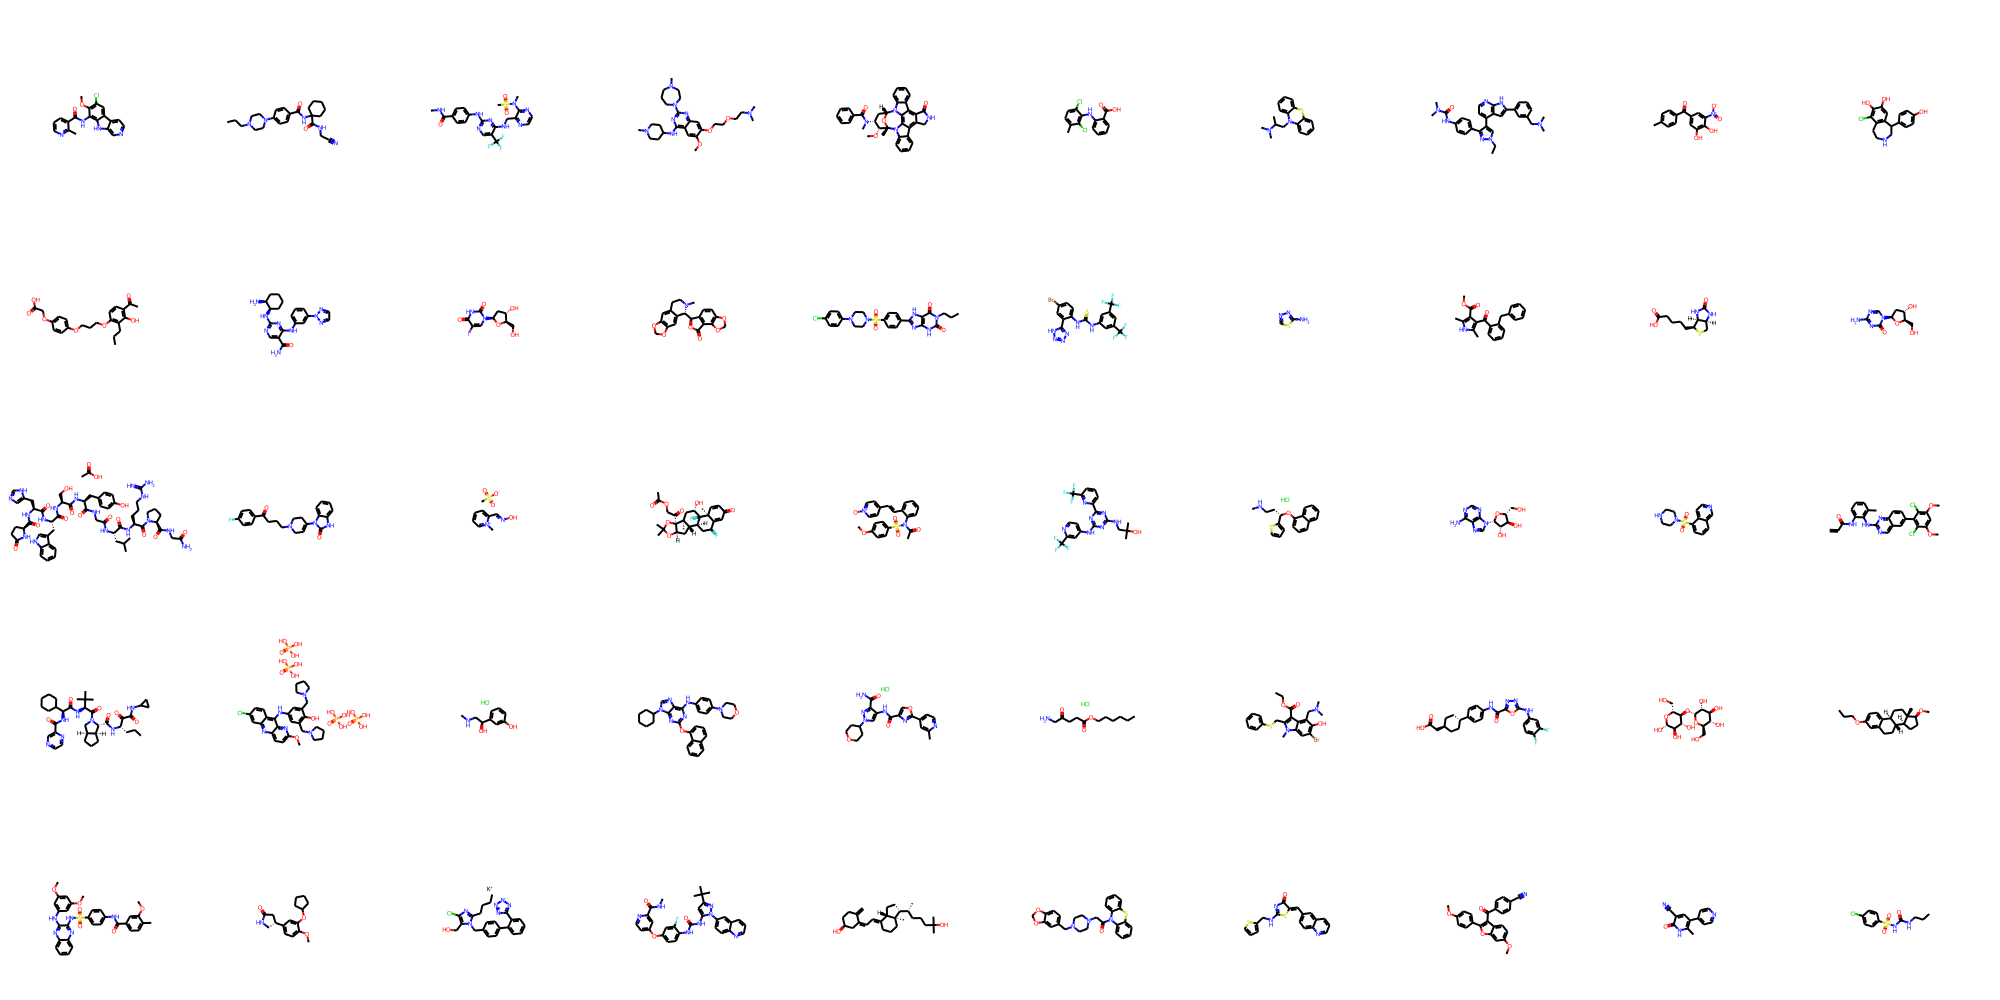

In [487]:
smiles_list = ['COc1c(Cl)cc2c([nH]c3cnccc32)c1NC(=O)c1cccnc1C',
'CCCN1CCN(c2ccc(C(=O)NC3(C(=O)NCC#N)CCCCC3)cc2)CC1',
'CNC(=O)c1ccc(Nc2ncc(C(F)(F)F)c(NCc3nccnc3N(C)S(C)(=O)=O)n2)cc1',
'COc1cc2c(NC3CCN(C)CC3)nc(N3CCCN(C)CC3)nc2cc1OCCOCCN(C)C',
'CO[C@@H]1[C@H](N(C)C(=O)c2ccccc2)C[C@H]2O[C@]1(C)n1c3ccccc3c3c4c(c5c6ccccc6n2c5c31)C(=O)NC4',
'Cc1ccc(Cl)c(Nc2ccccc2C(=O)O)c1Cl',
'CC(CN1c2ccccc2Sc2ccccc21)N(C)C',
'CCn1cc(-c2ccnc3[nH]c(-c4cccc(CN(C)C)c4)cc23)c(-c2ccc(NC(=O)N(C)C)cc2)n1',
'Cc1ccc(C(=O)c2cc(O)c(O)c([N+](=O)[O-])c2)cc1',
'Oc1ccc(C2CNCCc3c2cc(O)c(O)c3Cl)cc1',
'CCCc1c(OCCCOc2ccc(OCC(=O)O)cc2)ccc(C(C)=O)c1O',
'NC(=O)c1cnc(N[C@@H]2CCCC[C@@H]2N)nc1Nc1cccc(-n2nccn2)c1',
'O=c1[nH]c(=O)n([C@H]2C[C@H](O)[C@@H](CO)O2)cc1I',
'CN1CCc2cc3c(cc2[C@H]1[C@@H]1OC(=O)c2c1ccc1c2OCO1)OCO3',
'CCCn1c(=O)[nH]c2nc(-c3ccc(S(=O)(=O)N4CCN(c5ccc(Cl)cc5)CC4)cc3)[nH]c2c1=O',
'FC(F)(F)c1cc(NC(=S)Nc2ccc(Br)cc2-c2nnn[nH]2)cc(C(F)(F)F)c1',
'Nc1nncs1',
'COC(=O)c1c(C)[nH]c(C)c1C(=O)c1ccccc1Cc1ccccc1',
'O=C(O)CCCC[C@@H]1SC[C@@H]2NC(=O)N[C@H]12',
'Nc1ncn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)n1',
'CC(=O)O.CC(C)C[C@H](NC(=O)CNC(=O)[C@H](Cc1ccc(O)cc1)NC(=O)[C@H](CO)NC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)[C@H](Cc1cnc[nH]1)NC(=O)[C@@H]1CCC(=O)N1)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N1CCC[C@H]1C(=O)NCC(N)=O',
'O=C(CCCN1CC=C(n2c(=O)[nH]c3ccccc32)CC1)c1ccc(F)cc1',
'CS(=O)(=O)[O-].C[n+]1ccccc1C=NO',
'CC(=O)OCC(=O)[C@@]12OC(C)(C)O[C@@H]1C[C@H]1[C@@H]3C[C@H](F)C4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@@]12C',
'COc1ccc(S(=O)(=O)N(C(C)=O)c2ccccc2/C=C/c2cc[n+]([O-])cc2)cc1',
'CC(C)(O)CNc1nc(Nc2ccnc(C(F)(F)F)c2)nc(-c2cccc(C(F)(F)F)n2)n1',
'CNCC[C@H](Oc1cccc2ccccc12)c1cccs1.Cl',
'Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@@H]1O',
'O=S(=O)(c1cccc2cnccc12)N1CCNCC1',
'C=CC(=O)Nc1cccc(C)c1Nc1ncc2cc(-c3c(Cl)c(OC)cc(OC)c3Cl)ccc2n1',
'CCC[C@H](NC(=O)[C@@H]1[C@H]2CCC[C@H]2CN1C(=O)[C@@H](NC(=O)[C@@H](NC(=O)c1cnccn1)C1CCCCC1)C(C)(C)C)C(=O)C(=O)NC1CC1',
'COc1ccc2nc3cc(Cl)ccc3c(Nc3cc(CN4CCCC4)c(O)c(CN4CCCC4)c3)c2n1.O=P(O)(O)O.O=P(O)(O)O.O=P(O)(O)O.O=P(O)(O)O',
'CNC[C@H](O)c1cccc(O)c1.Cl',
'c1ccc2c(Oc3nc(Nc4ccc(N5CCOCC5)cc4)c4ncn(C5CCCCC5)c4n3)cccc2c1',
'Cc1cc(-c2nc(C(=O)Nc3cn(C4CCOCC4)nc3C(N)=O)co2)ccn1.Cl',
'CCCCCCOC(=O)CCC(=O)CN.Cl',
'CCOC(=O)c1c(CSc2ccccc2)n(C)c2cc(Br)c(O)c(CN(C)C)c12',
'O=C(O)C[C@H]1CC[C@H](c2ccc(NC(=O)c3nnc(Nc4ccc(F)c(F)c4)o3)cc2)CC1',
'OC[C@H]1O[C@H](O[C@@H]2[C@@H](CO)O[C@@H](O)[C@H](O)[C@H]2O)[C@H](O)[C@@H](O)[C@@H]1O',
'CCCOc1ccc2c(c1)CC[C@@H]1[C@@H]2CC[C@]2(C)[C@@H](OC)CC[C@@H]12',
'COc1cc(Nc2nc3ccccc3nc2NS(=O)(=O)c2ccc(NC(=O)c3ccc(C)c(OC)c3)cc2)cc(OC)c1',
'COc1ccc([C@@H]2CNC(=O)C2)cc1OC1CCCC1',
'CCCCc1nc(Cl)c(CO)n1Cc1ccc(-c2ccccc2-c2nn[n-]n2)cc1.[K+]',
'CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3cc(C(C)(C)C)nn3-c3ccc4ncccc4c3)c(F)c2)ccn1',
'C=C1CC[C@H](O)C/C1=C/C=C1\CCC[C@@]2(C)[C@H]1CC[C@@H]2[C@H](C)CCCC(C)(C)O',
'O=C(CN1CCN(Cc2ccc3c(c2)OCO3)CC1)N1c2ccccc2Sc2ccccc21',
'O=C1N=C(NCc2cccs2)S/C1=C\c1ccc2ncccc2c1',
'COc1ccc(-c2oc3cc(OC)ccc3c2C(=O)c2ccc(C#N)cc2)cc1',
'Cc1[nH]c(=O)c(C#N)cc1-c1ccncc1',
'CCCNC(=O)NS(=O)(=O)c1ccc(Cl)cc1',

]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



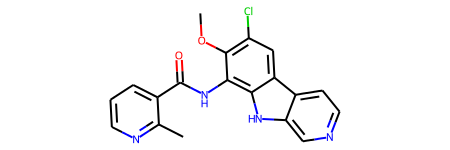

In [488]:
M1 = mol_list [0]
M1

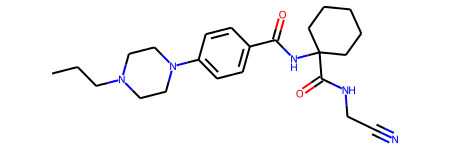

In [489]:
M2 = mol_list [1]
M2

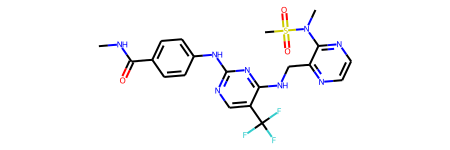

In [490]:
M3 = mol_list [2]
M3

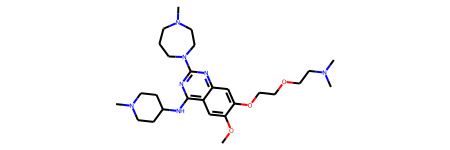

In [491]:
M4 = mol_list [3]
M4

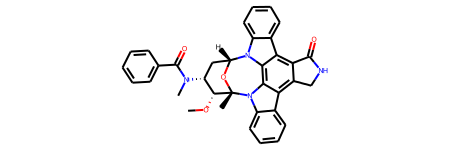

In [492]:
M5 = mol_list [4]
M5

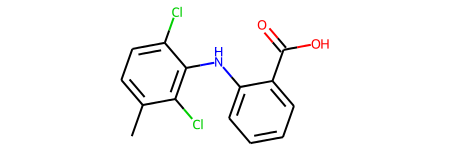

In [493]:
M6 = mol_list [5]
M6

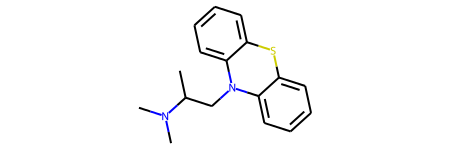

In [494]:
M7 = mol_list [6]
M7

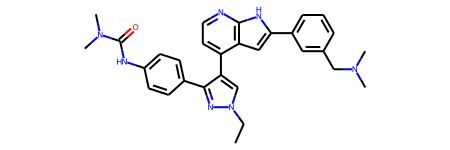

In [495]:
M8 = mol_list [7]
M8

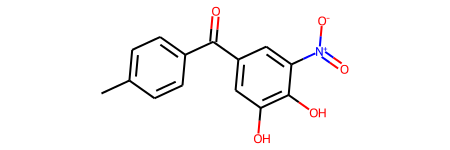

In [496]:
M9 = mol_list [8]
M9

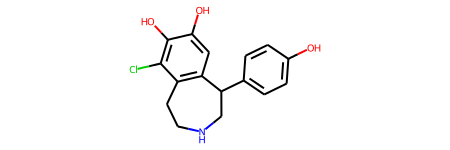

In [497]:
M10= mol_list [9]
M10

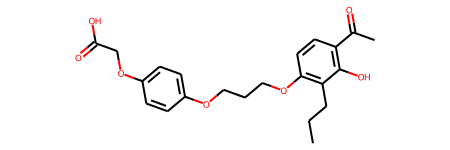

In [498]:
M11= mol_list [10]
M11

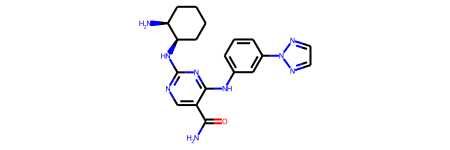

In [499]:
M12= mol_list [11]
M12

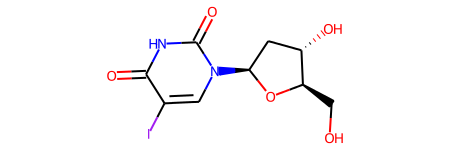

In [500]:
M13= mol_list [12]
M13

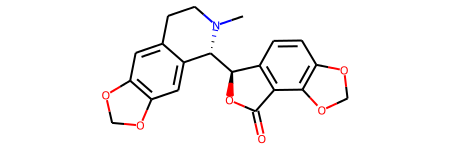

In [501]:
M14= mol_list [13]
M14

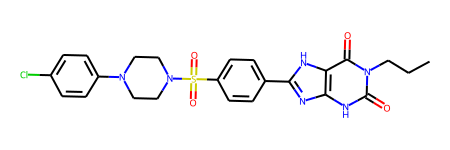

In [502]:
M15= mol_list [14]
M15

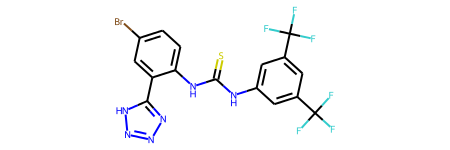

In [503]:
M16= mol_list [15]
M16

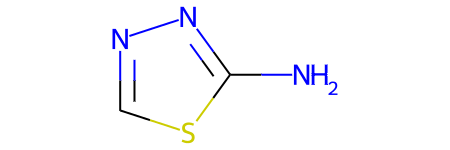

In [504]:
M17= mol_list [16]
M17

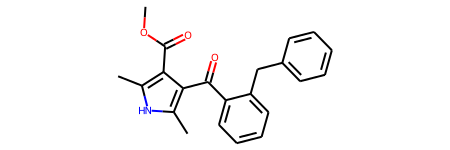

In [505]:
M18= mol_list [17]
M18

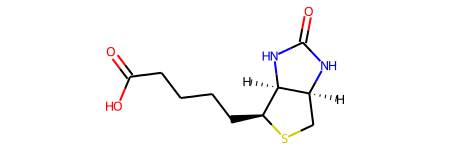

In [506]:
M19= mol_list [18]
M19

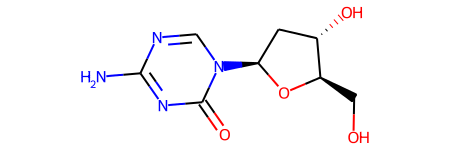

In [507]:
M20= mol_list [19]
M20

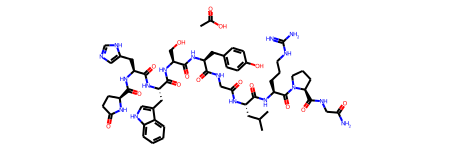

In [508]:
M21= mol_list [20]
M21

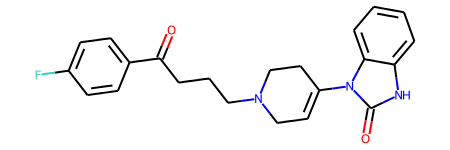

In [510]:
M22= mol_list [21]
M22

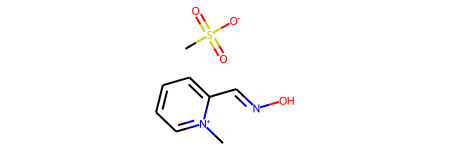

In [511]:
M23= mol_list [22]
M23

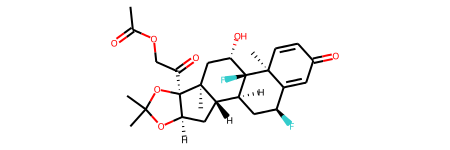

In [512]:
M24= mol_list [23]
M24

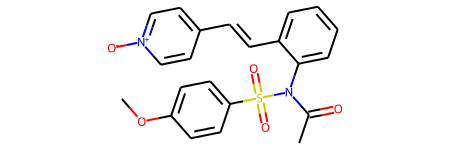

In [513]:
M25= mol_list [24]
M25

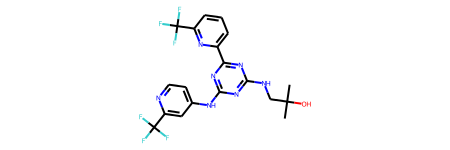

In [514]:
M26= mol_list [25]
M26

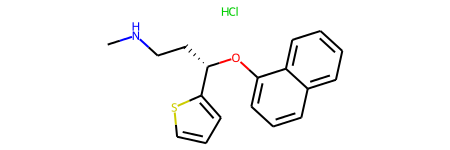

In [515]:
M27= mol_list [26]
M27

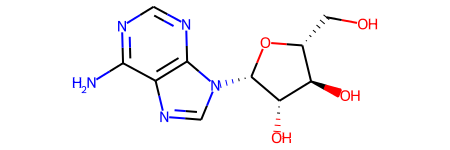

In [516]:
M28= mol_list [27]
M28

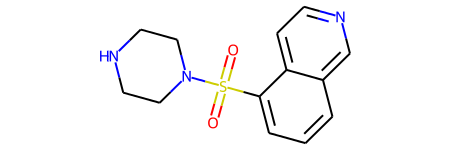

In [517]:
M29= mol_list [28]
M29

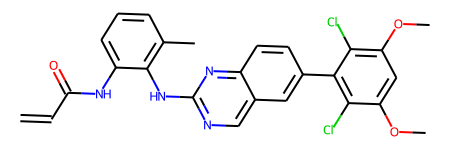

In [518]:
M30= mol_list [29]
M30

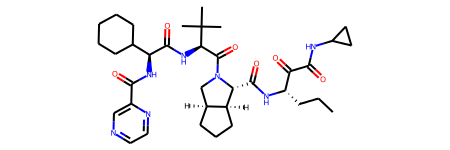

In [519]:
M31= mol_list [30]
M31

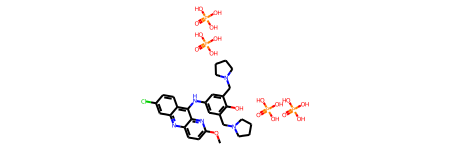

In [520]:
M32= mol_list [31]
M32

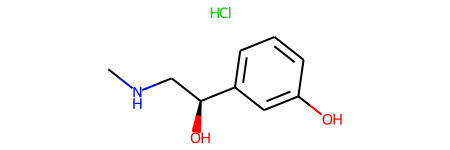

In [521]:
M33= mol_list [32]
M33

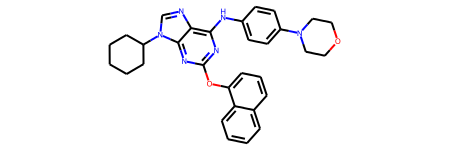

In [522]:
M34= mol_list [33]
M34

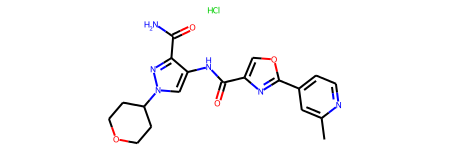

In [523]:
M35= mol_list [34]
M35

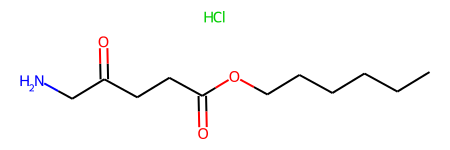

In [524]:
M36= mol_list [35]
M36

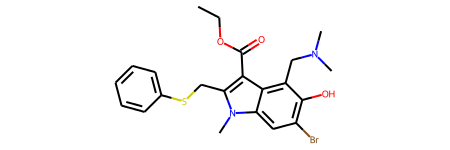

In [525]:
M37= mol_list [36]
M37

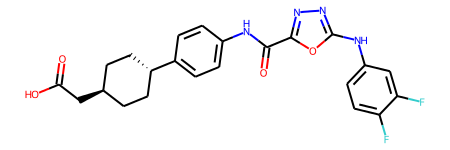

In [526]:
M38= mol_list [37]
M38


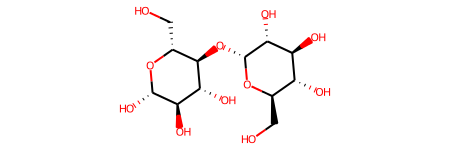

In [527]:
M39= mol_list [38]
M39

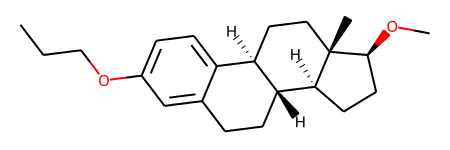

In [528]:
M40= mol_list [39]
M40

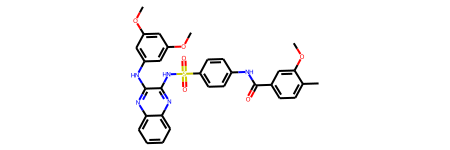

In [529]:
M41= mol_list [40]
M41

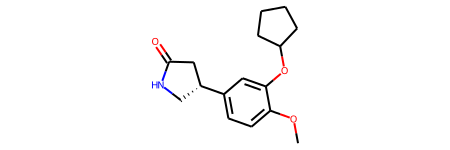

In [530]:
M42= mol_list [41]
M42

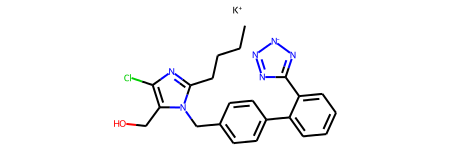

In [531]:
M43= mol_list [42]
M43

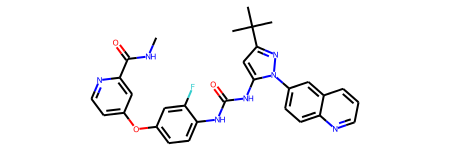

In [532]:
M44= mol_list [43]
M44

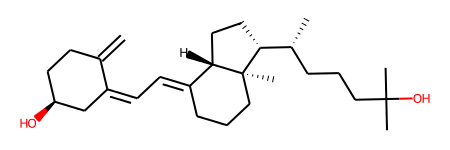

In [533]:
M45= mol_list [44]
M45

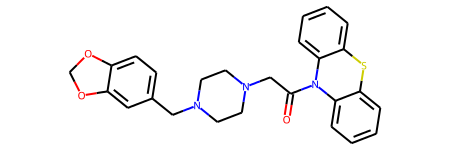

In [534]:
M46= mol_list [45]
M46

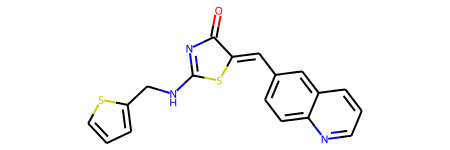

In [535]:
M47= mol_list [46]
M47

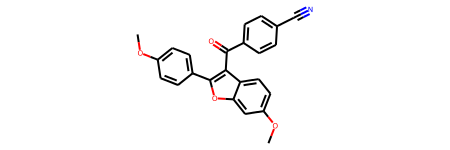

In [536]:
M48= mol_list [47]
M48

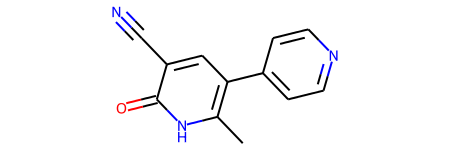

In [537]:
M49= mol_list [48]
M49

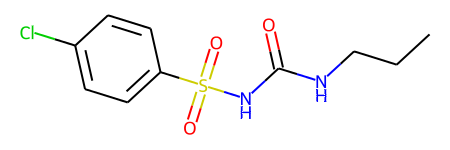

In [538]:
M50= mol_list [49]
M50

In [539]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[10,
 19,
 21,
 33,
 64,
 78,
 90,
 92,
 119,
 128,
 132,
 184,
 223,
 333,
 350,
 356,
 366,
 378,
 379,
 381,
 388,
 423,
 428,
 448,
 486,
 506,
 511,
 512,
 561,
 562,
 575,
 579,
 580,
 591,
 630,
 650,
 659,
 695,
 698,
 721,
 726,
 763,
 792,
 807,
 841,
 842,
 847,
 849,
 875,
 893,
 967,
 1020,
 1021]

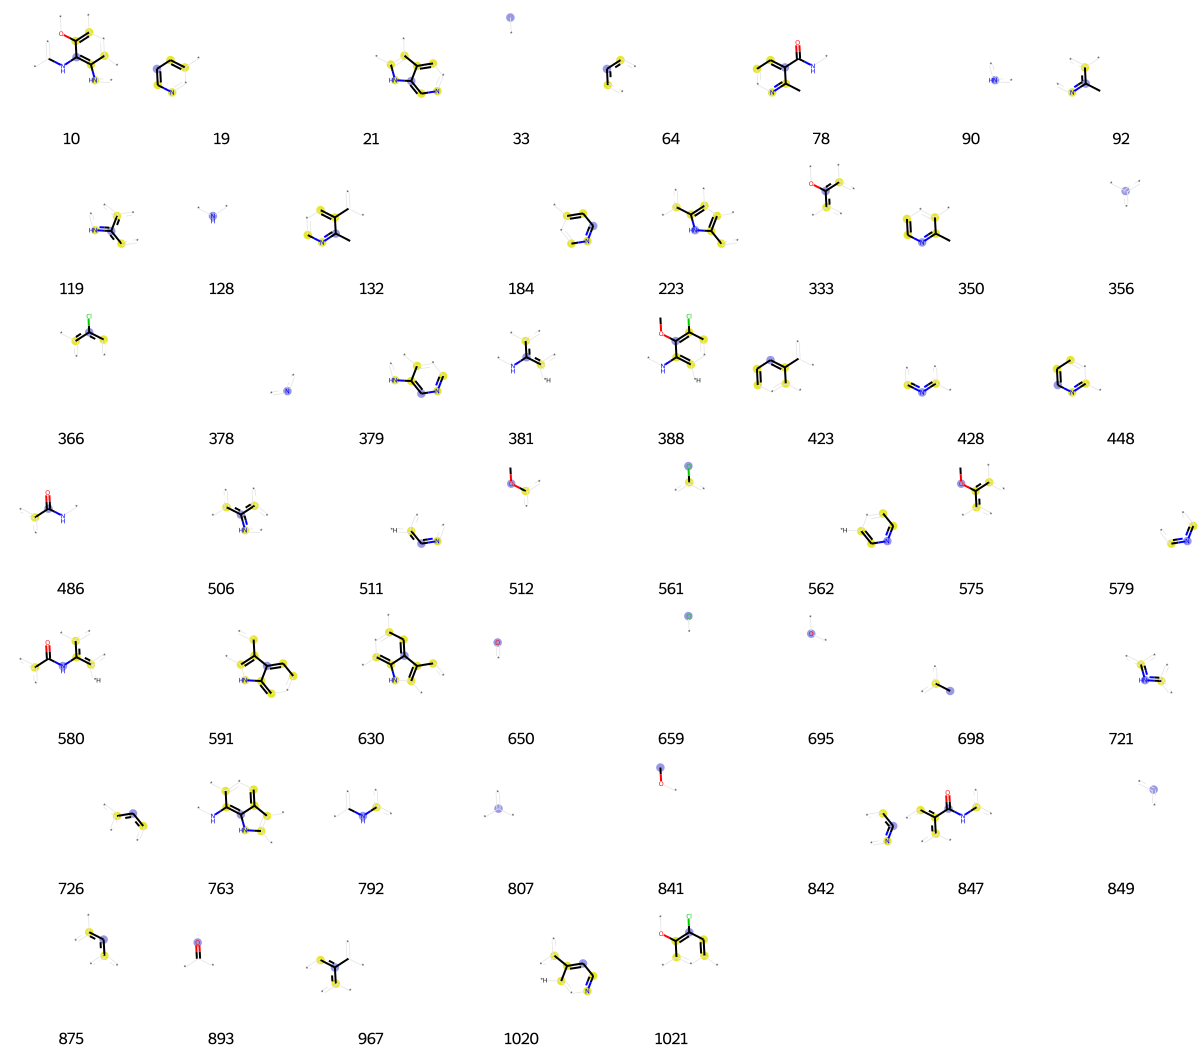

In [540]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [541]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[10,
 19,
 21,
 33,
 64,
 78,
 90,
 92,
 119,
 128,
 132,
 184,
 223,
 333,
 350,
 356,
 366,
 378,
 379,
 381,
 388,
 423,
 428,
 448,
 486,
 506,
 511,
 512,
 561,
 562,
 575,
 579,
 580,
 591,
 630,
 650,
 659,
 695,
 698,
 721,
 726,
 763,
 792,
 807,
 841,
 842,
 847,
 849,
 875,
 893,
 967,
 1020,
 1021]

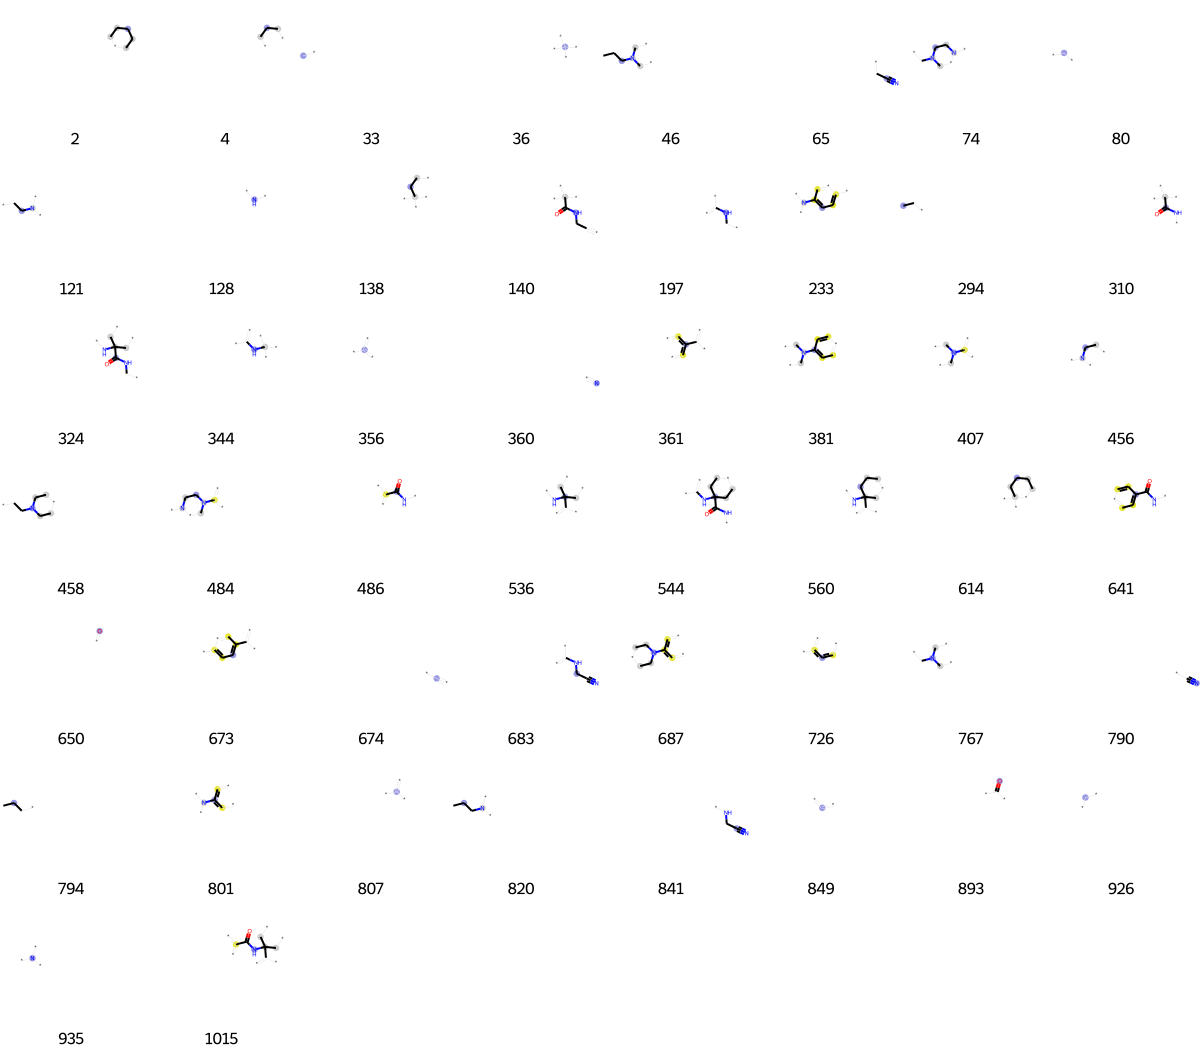

In [542]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [543]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[33,
 47,
 56,
 80,
 81,
 114,
 128,
 139,
 191,
 255,
 259,
 262,
 342,
 345,
 350,
 356,
 361,
 378,
 392,
 402,
 406,
 419,
 428,
 429,
 452,
 458,
 460,
 486,
 491,
 500,
 511,
 544,
 557,
 558,
 562,
 587,
 613,
 624,
 641,
 650,
 673,
 678,
 692,
 702,
 708,
 726,
 786,
 807,
 809,
 831,
 842,
 843,
 849,
 856,
 873,
 881,
 893,
 904,
 930,
 933]

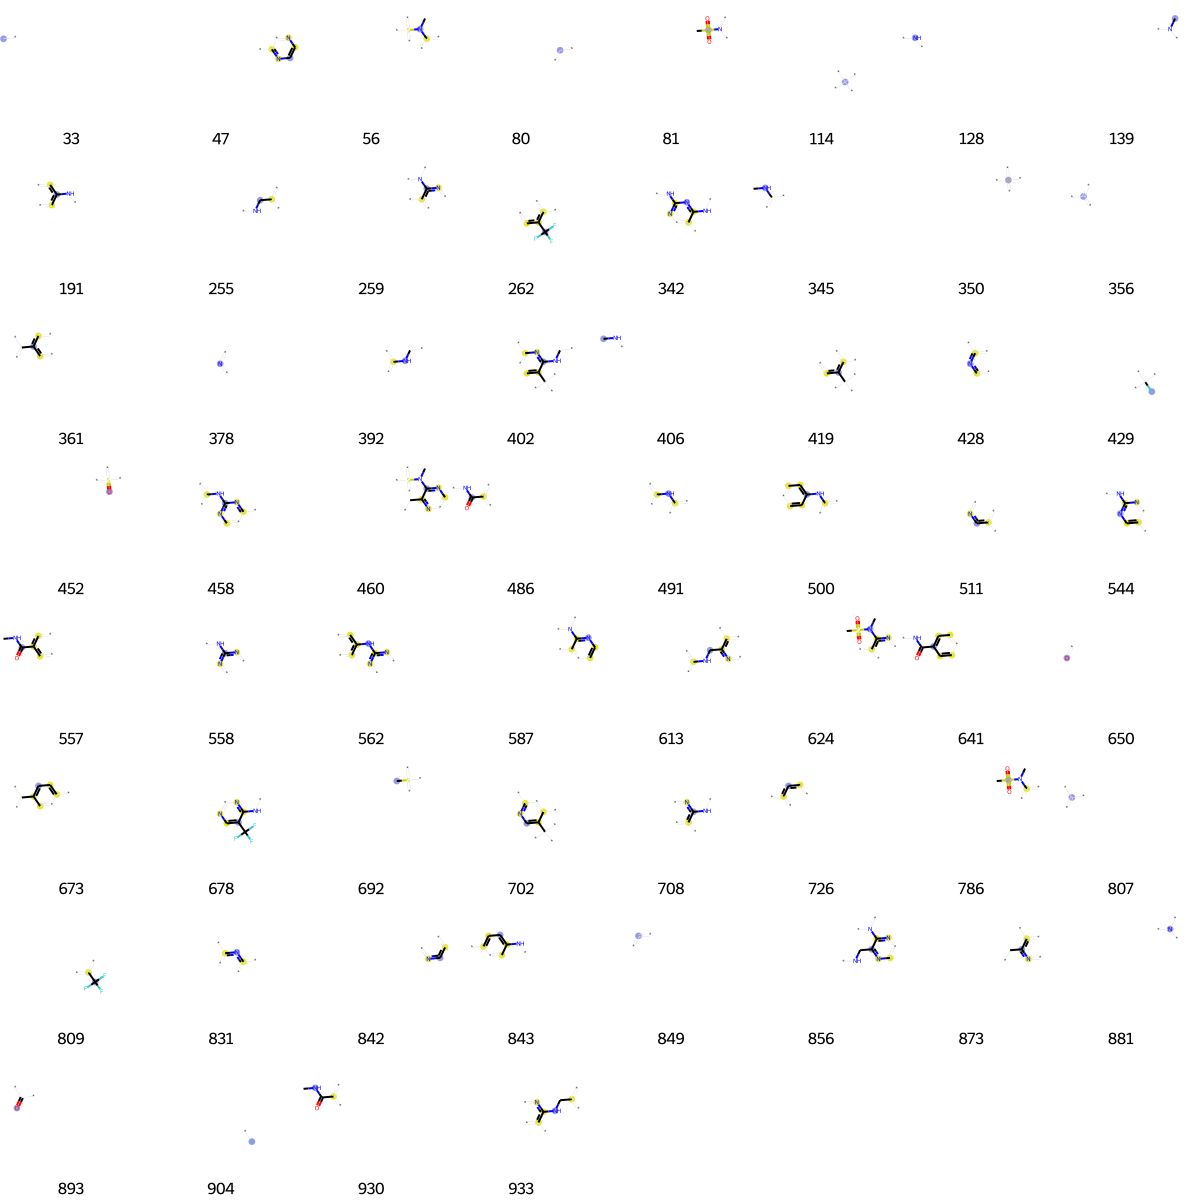

In [544]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [545]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[4,
 8,
 13,
 14,
 33,
 59,
 73,
 80,
 82,
 119,
 121,
 128,
 133,
 139,
 140,
 144,
 207,
 212,
 221,
 232,
 249,
 274,
 301,
 315,
 333,
 335,
 356,
 378,
 407,
 428,
 456,
 484,
 494,
 512,
 565,
 610,
 624,
 625,
 644,
 652,
 676,
 680,
 691,
 693,
 695,
 708,
 747,
 780,
 831,
 834,
 841,
 849,
 875,
 881,
 891,
 926,
 927,
 935,
 946,
 968,
 993,
 1018,
 1019]

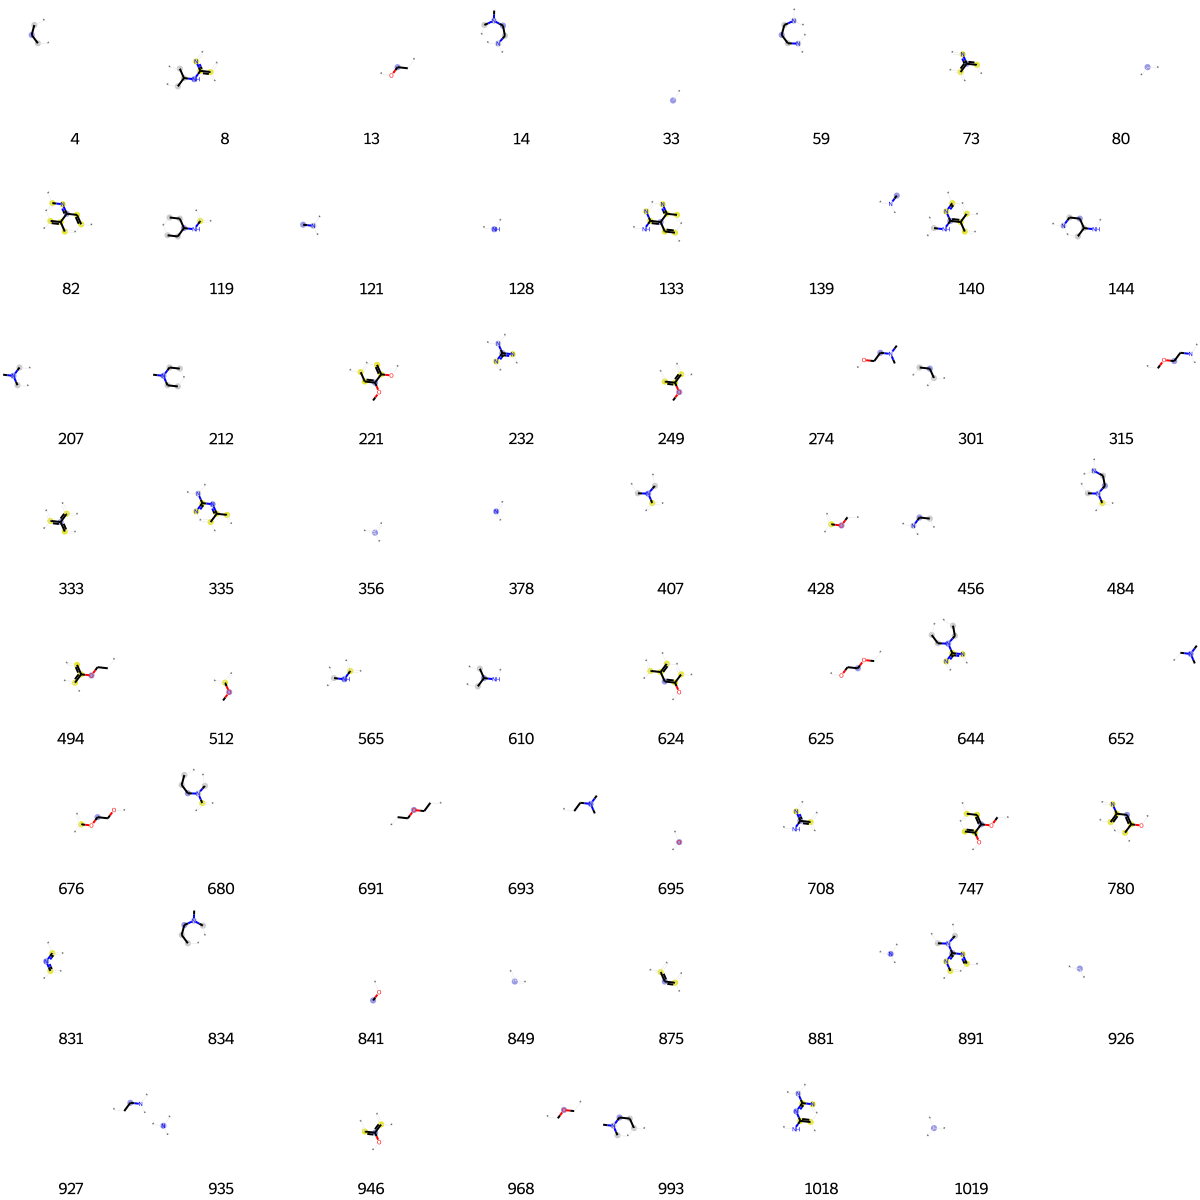

In [546]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [547]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[4,
 33,
 36,
 45,
 46,
 64,
 90,
 139,
 158,
 175,
 197,
 244,
 250,
 261,
 264,
 267,
 268,
 289,
 314,
 322,
 333,
 355,
 356,
 361,
 362,
 389,
 416,
 443,
 463,
 468,
 521,
 545,
 549,
 560,
 566,
 587,
 633,
 644,
 650,
 656,
 677,
 678,
 689,
 695,
 702,
 720,
 723,
 726,
 796,
 807,
 825,
 841,
 842,
 849,
 881,
 893,
 895,
 926,
 935,
 937,
 950,
 960,
 961,
 967,
 983,
 996,
 1019]

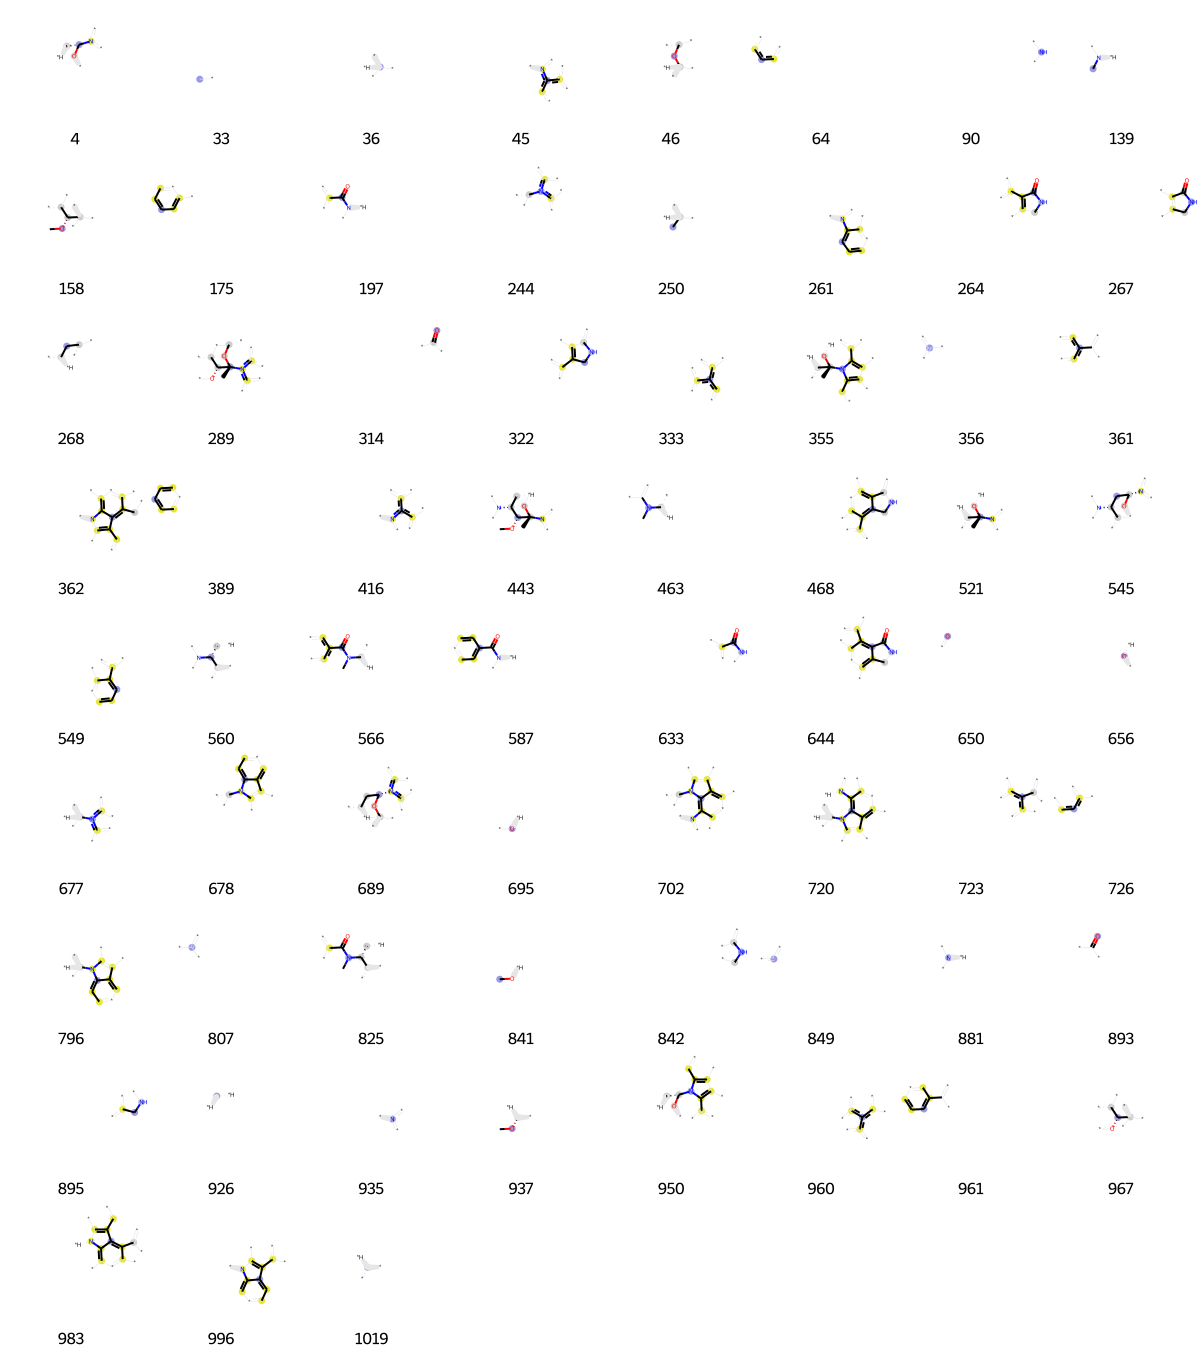

In [548]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [549]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[23,
 33,
 64,
 94,
 128,
 164,
 175,
 200,
 217,
 356,
 366,
 367,
 381,
 383,
 389,
 423,
 456,
 491,
 561,
 650,
 659,
 666,
 667,
 672,
 698,
 701,
 726,
 807,
 849,
 882,
 883,
 893,
 967,
 1011]

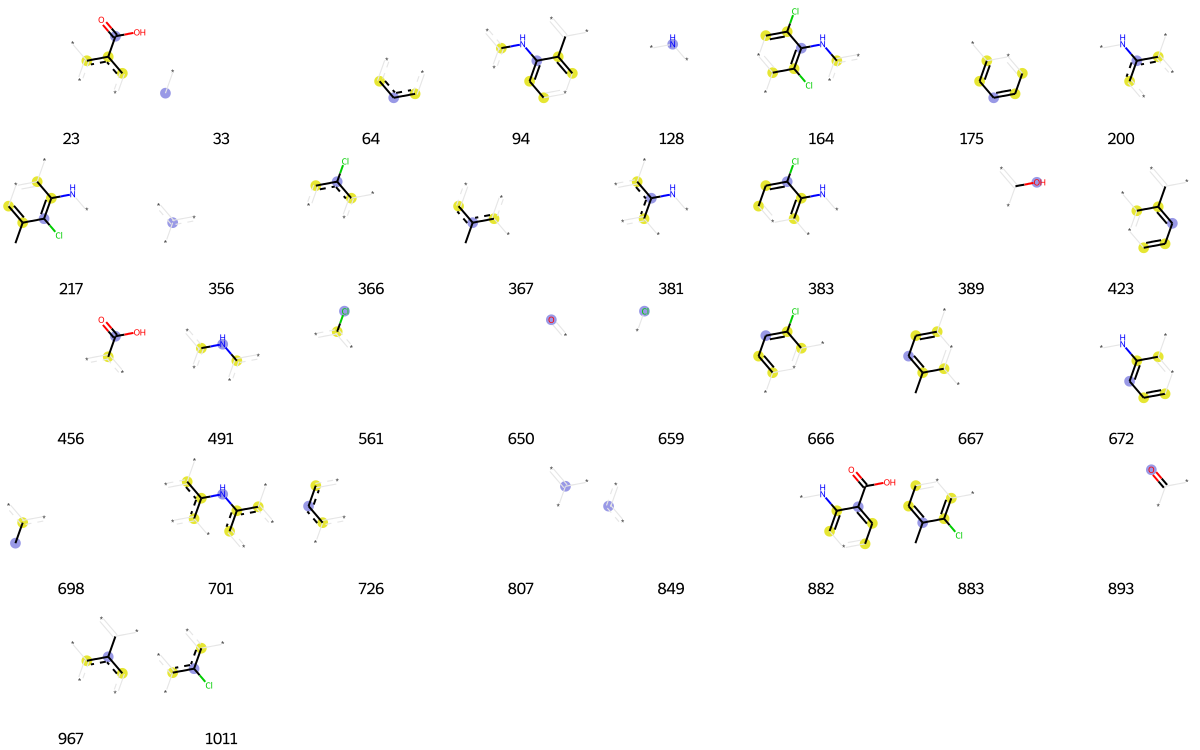

In [550]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [551]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[1,
 33,
 64,
 80,
 139,
 143,
 175,
 249,
 271,
 283,
 294,
 356,
 397,
 491,
 561,
 577,
 588,
 623,
 675,
 726,
 849,
 881,
 898,
 917,
 935,
 939,
 949,
 952,
 1020]

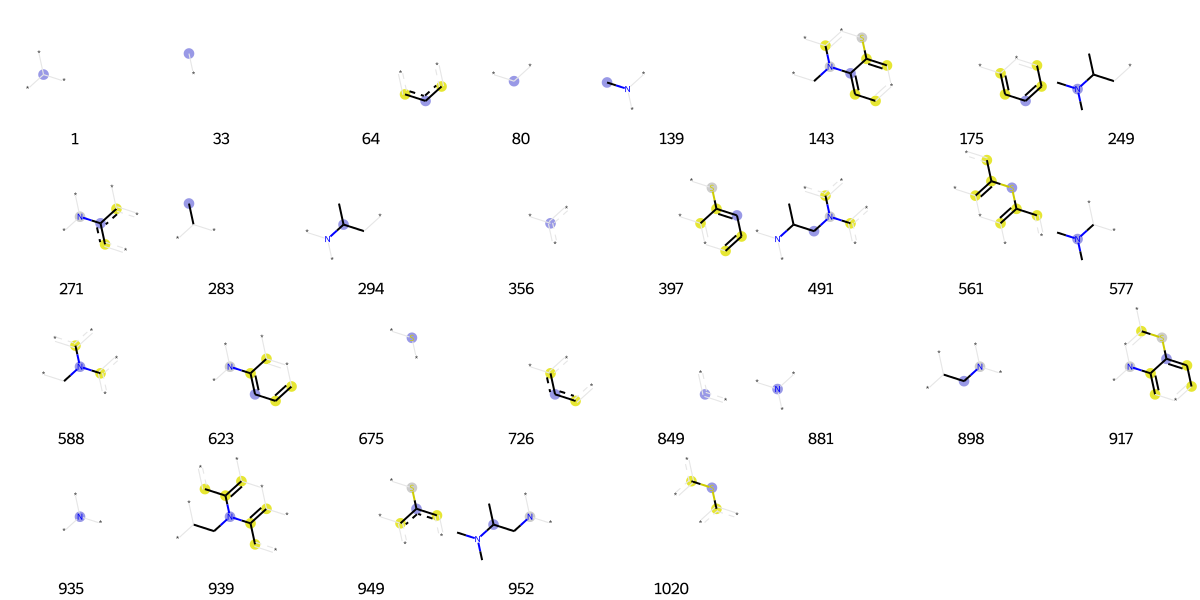

In [552]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [553]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[14,
 15,
 33,
 34,
 42,
 53,
 64,
 80,
 90,
 128,
 136,
 139,
 191,
 193,
 198,
 217,
 286,
 294,
 300,
 320,
 323,
 333,
 338,
 352,
 356,
 378,
 382,
 403,
 428,
 464,
 471,
 476,
 502,
 507,
 555,
 562,
 629,
 650,
 652,
 666,
 667,
 711,
 721,
 726,
 730,
 736,
 740,
 744,
 747,
 787,
 792,
 807,
 842,
 843,
 849,
 870,
 873,
 875,
 881,
 887,
 893,
 896,
 912,
 927,
 932,
 935]

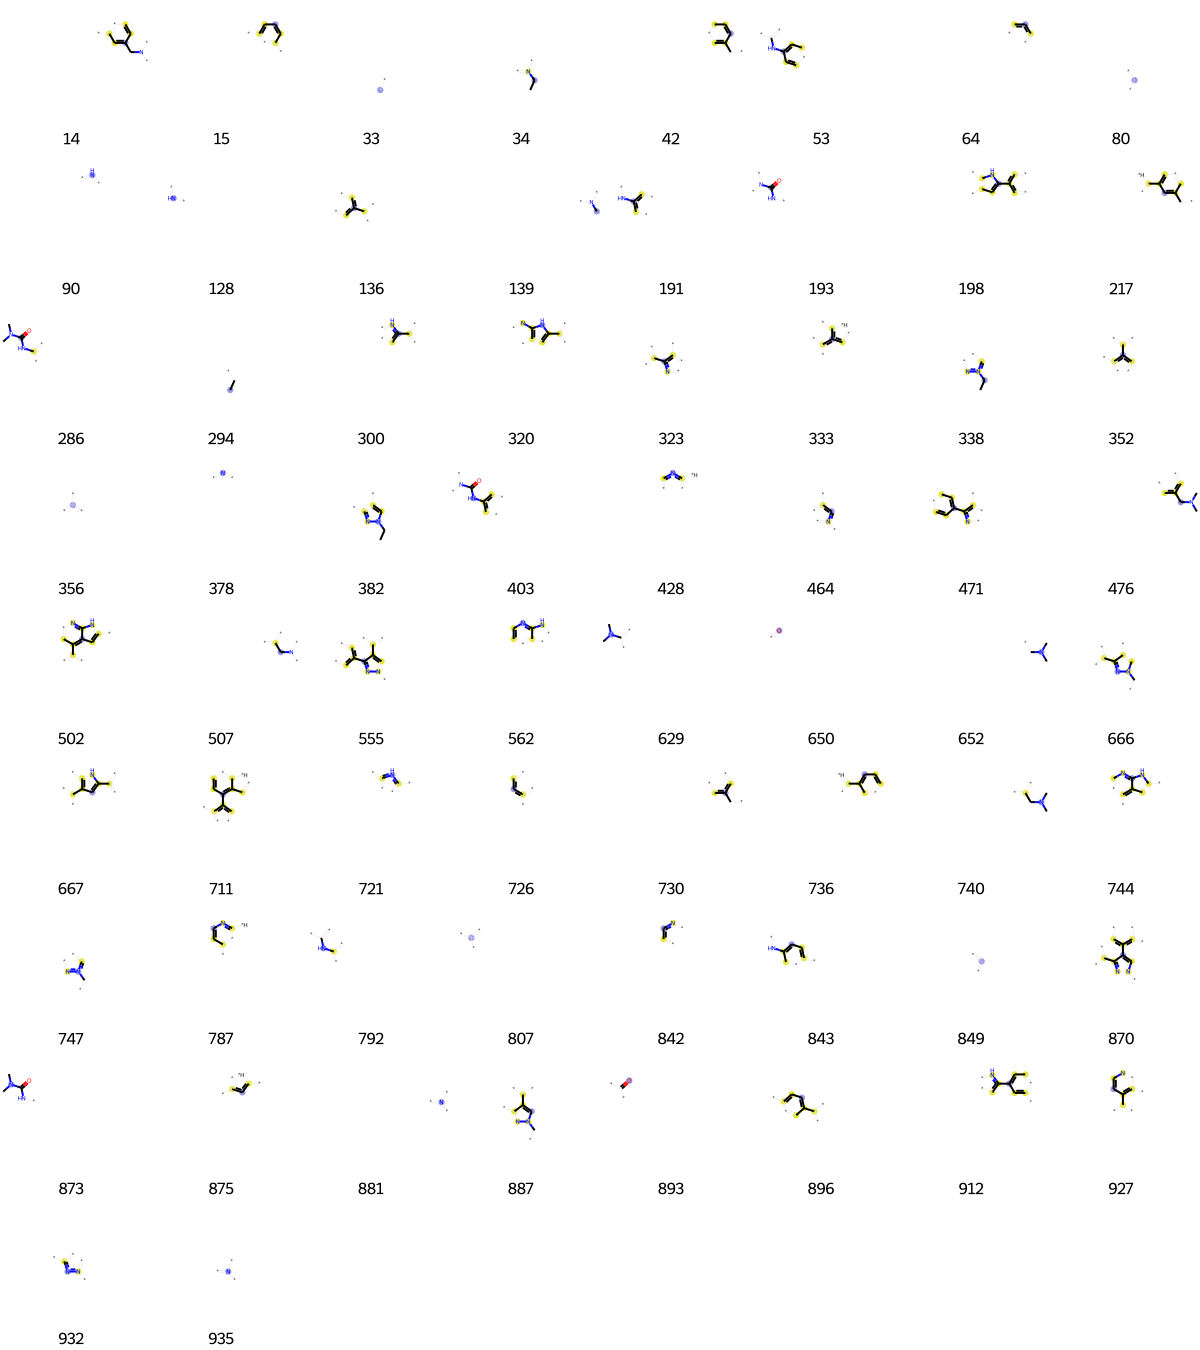

In [554]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])

In [555]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[9,
 33,
 105,
 125,
 171,
 202,
 235,
 311,
 354,
 356,
 361,
 536,
 555,
 578,
 583,
 650,
 673,
 698,
 715,
 716,
 726,
 751,
 753,
 799,
 807,
 816,
 838,
 839,
 849,
 875,
 893,
 896,
 939]

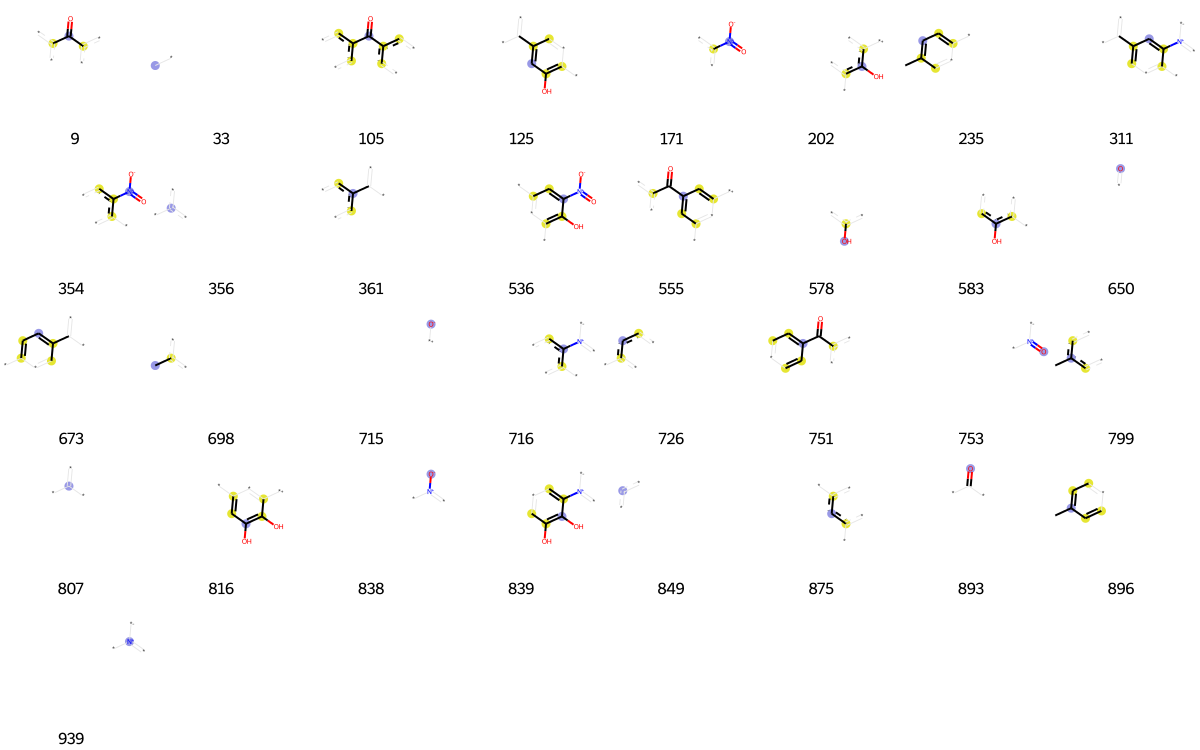

In [556]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [557]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[3,
 6,
 19,
 90,
 137,
 202,
 208,
 255,
 284,
 289,
 298,
 305,
 309,
 356,
 361,
 470,
 561,
 578,
 583,
 649,
 654,
 659,
 662,
 714,
 726,
 745,
 747,
 754,
 779,
 807,
 812,
 816,
 849,
 875,
 926,
 1011,
 1019]

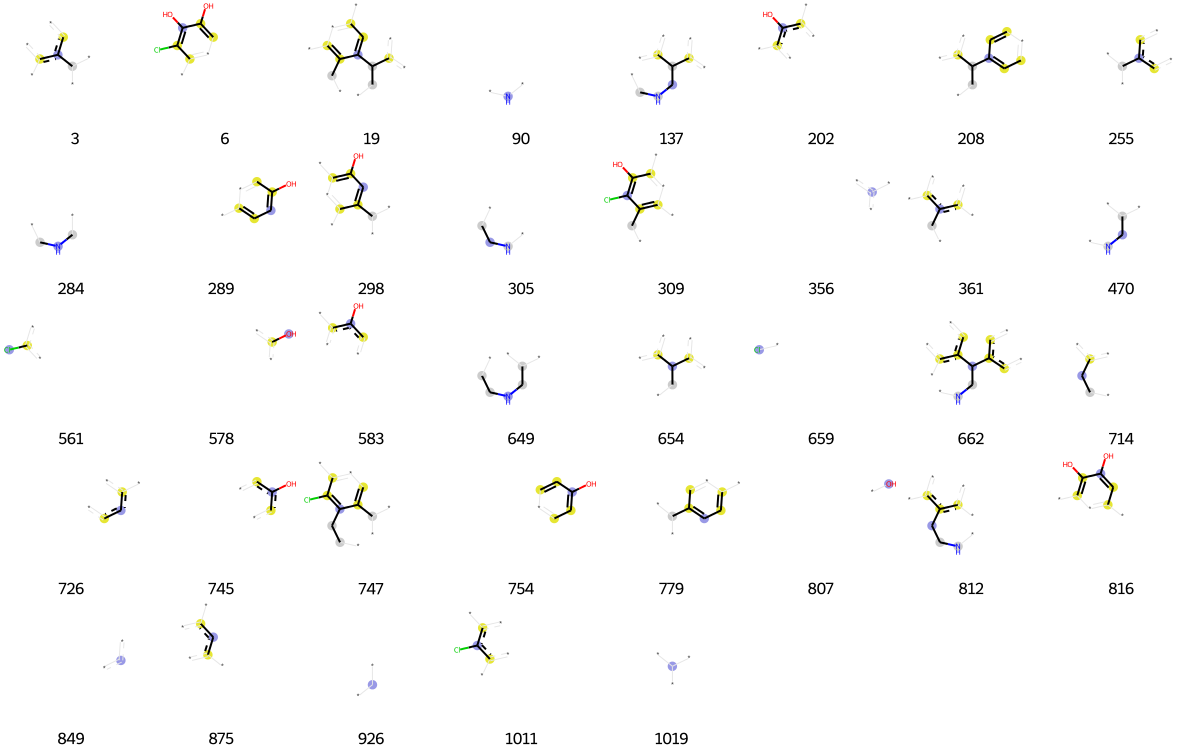

In [558]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [559]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[10,
 13,
 33,
 39,
 67,
 80,
 94,
 102,
 202,
 219,
 294,
 322,
 356,
 389,
 416,
 428,
 494,
 578,
 603,
 612,
 650,
 669,
 684,
 695,
 702,
 713,
 718,
 726,
 729,
 794,
 796,
 806,
 807,
 849,
 863,
 887,
 893,
 946,
 954,
 967,
 980,
 1010,
 1017]

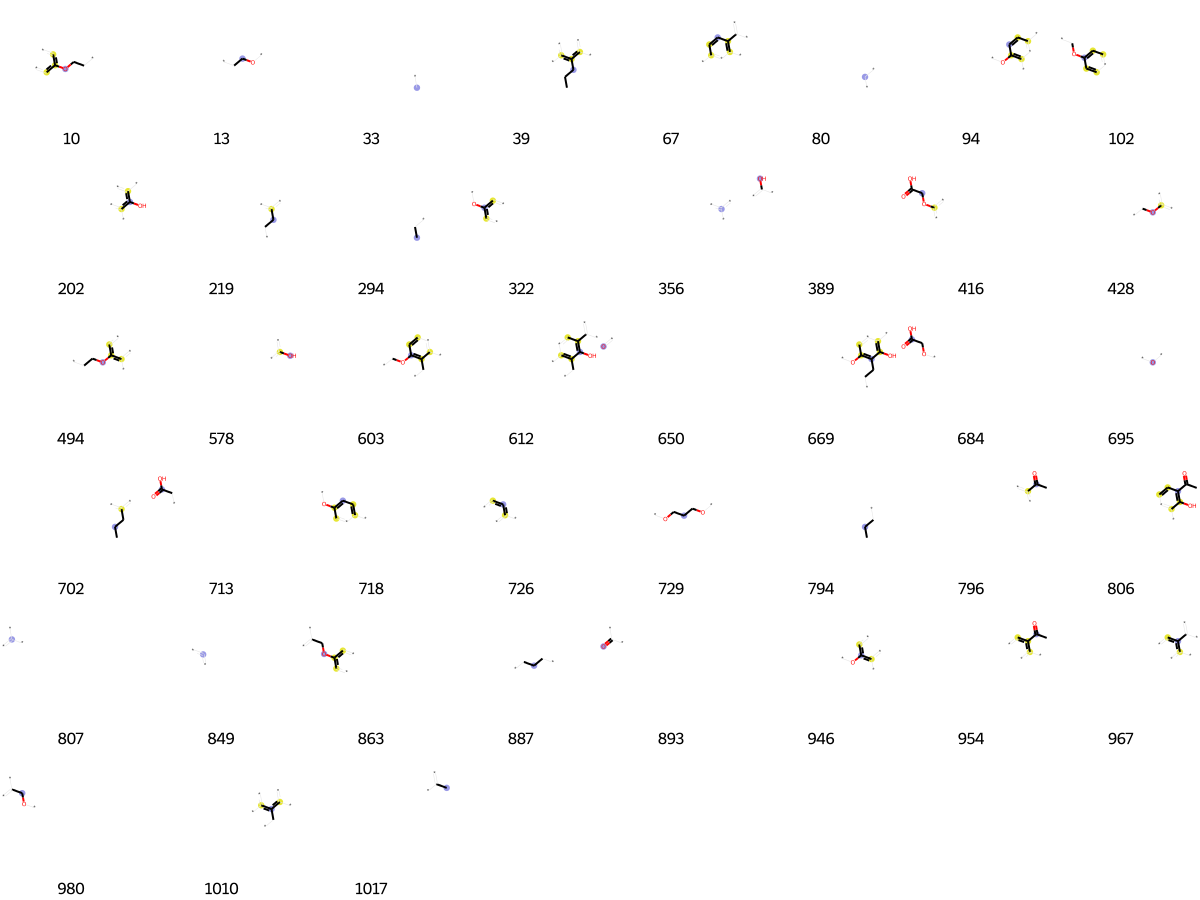

In [560]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [561]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[0,
 4,
 15,
 25,
 43,
 64,
 89,
 110,
 128,
 138,
 140,
 147,
 167,
 191,
 226,
 301,
 309,
 329,
 342,
 356,
 378,
 379,
 428,
 438,
 459,
 491,
 511,
 544,
 558,
 565,
 595,
 629,
 647,
 650,
 703,
 708,
 726,
 786,
 801,
 807,
 808,
 831,
 842,
 849,
 875,
 879,
 888,
 890,
 893,
 908,
 926,
 935,
 940,
 967,
 1012,
 1015,
 1019]

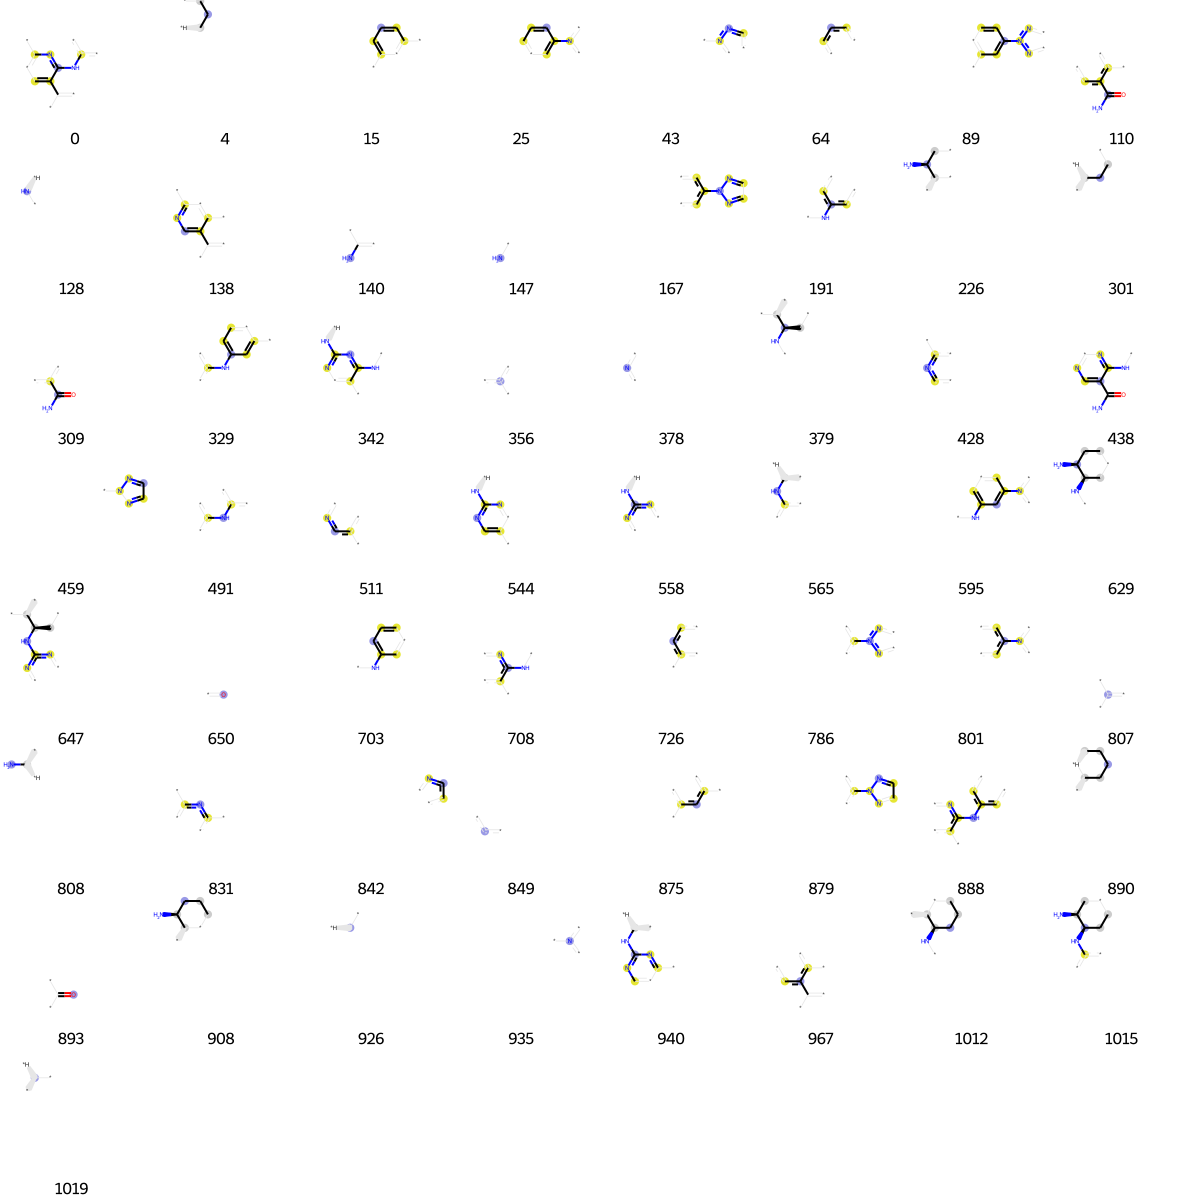

In [562]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [563]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[4,
 80,
 90,
 222,
 233,
 240,
 268,
 277,
 314,
 356,
 377,
 439,
 445,
 464,
 492,
 577,
 582,
 601,
 605,
 610,
 650,
 656,
 661,
 678,
 721,
 740,
 750,
 758,
 777,
 795,
 807,
 849,
 896,
 897,
 926,
 935,
 947,
 1019]

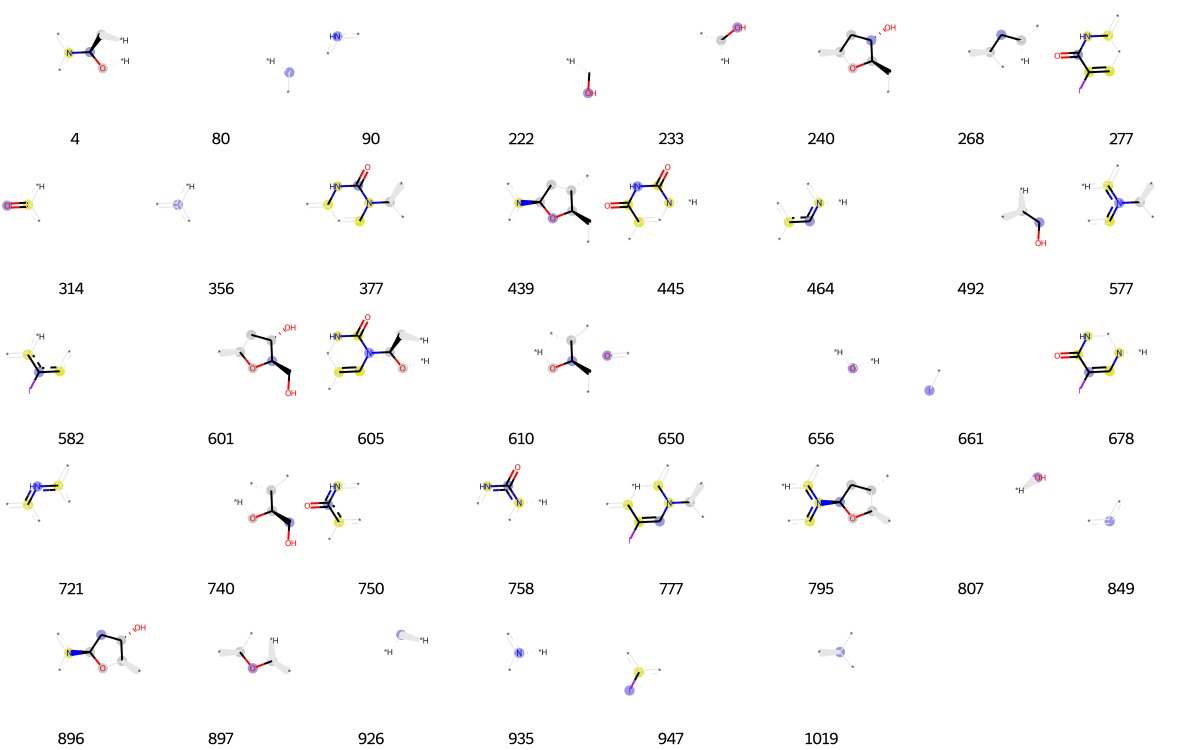

In [564]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [565]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[3,
 11,
 15,
 18,
 33,
 39,
 64,
 108,
 121,
 212,
 233,
 270,
 273,
 307,
 314,
 325,
 356,
 441,
 456,
 486,
 514,
 612,
 636,
 649,
 650,
 656,
 711,
 714,
 723,
 726,
 728,
 738,
 750,
 776,
 817,
 839,
 849,
 864,
 875,
 881,
 926,
 935,
 956,
 969,
 1006,
 1019]

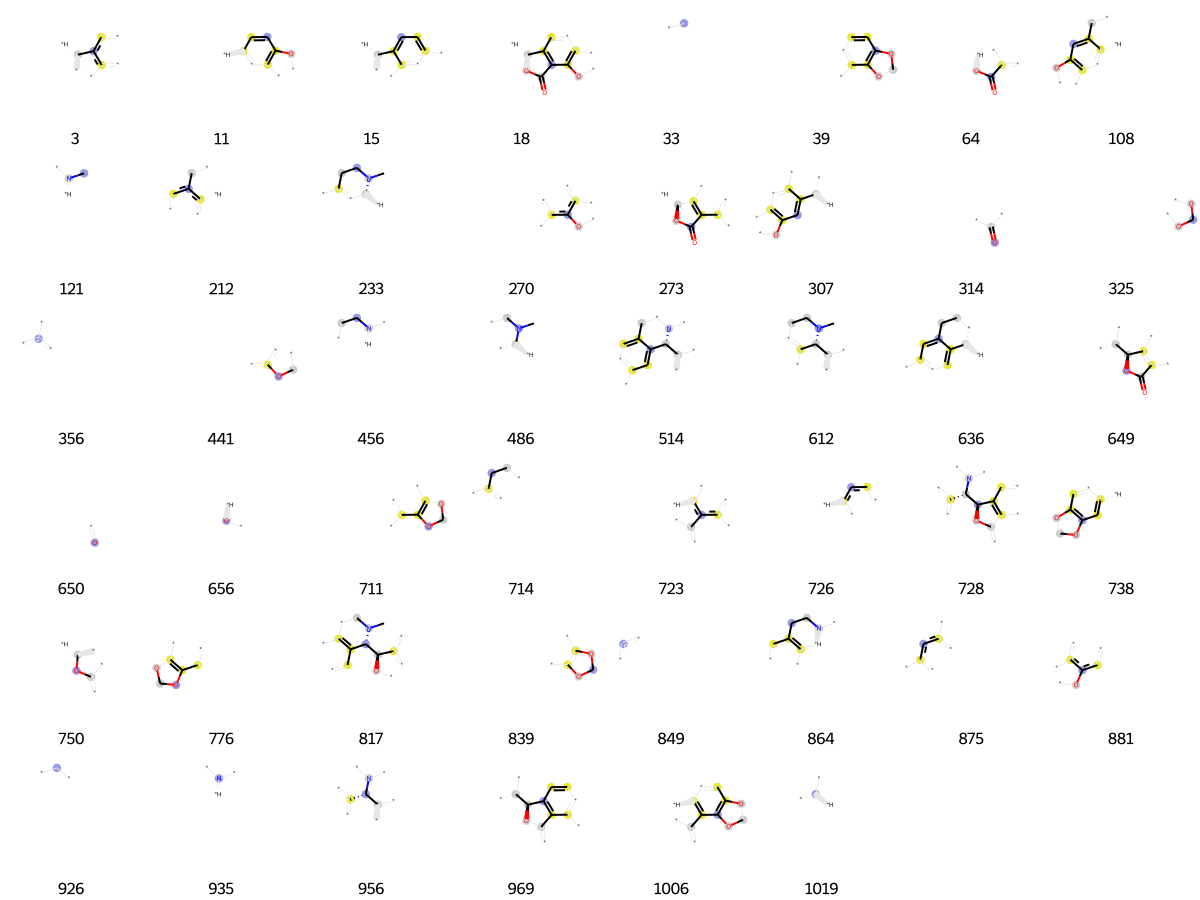

In [566]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [567]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[33,
 42,
 46,
 51,
 80,
 90,
 121,
 128,
 136,
 153,
 159,
 216,
 233,
 268,
 294,
 314,
 319,
 350,
 356,
 366,
 374,
 378,
 381,
 407,
 430,
 452,
 455,
 456,
 484,
 504,
 506,
 525,
 561,
 585,
 650,
 659,
 674,
 687,
 715,
 721,
 726,
 727,
 757,
 758,
 794,
 800,
 801,
 802,
 816,
 820,
 831,
 849,
 885,
 896,
 926,
 935]

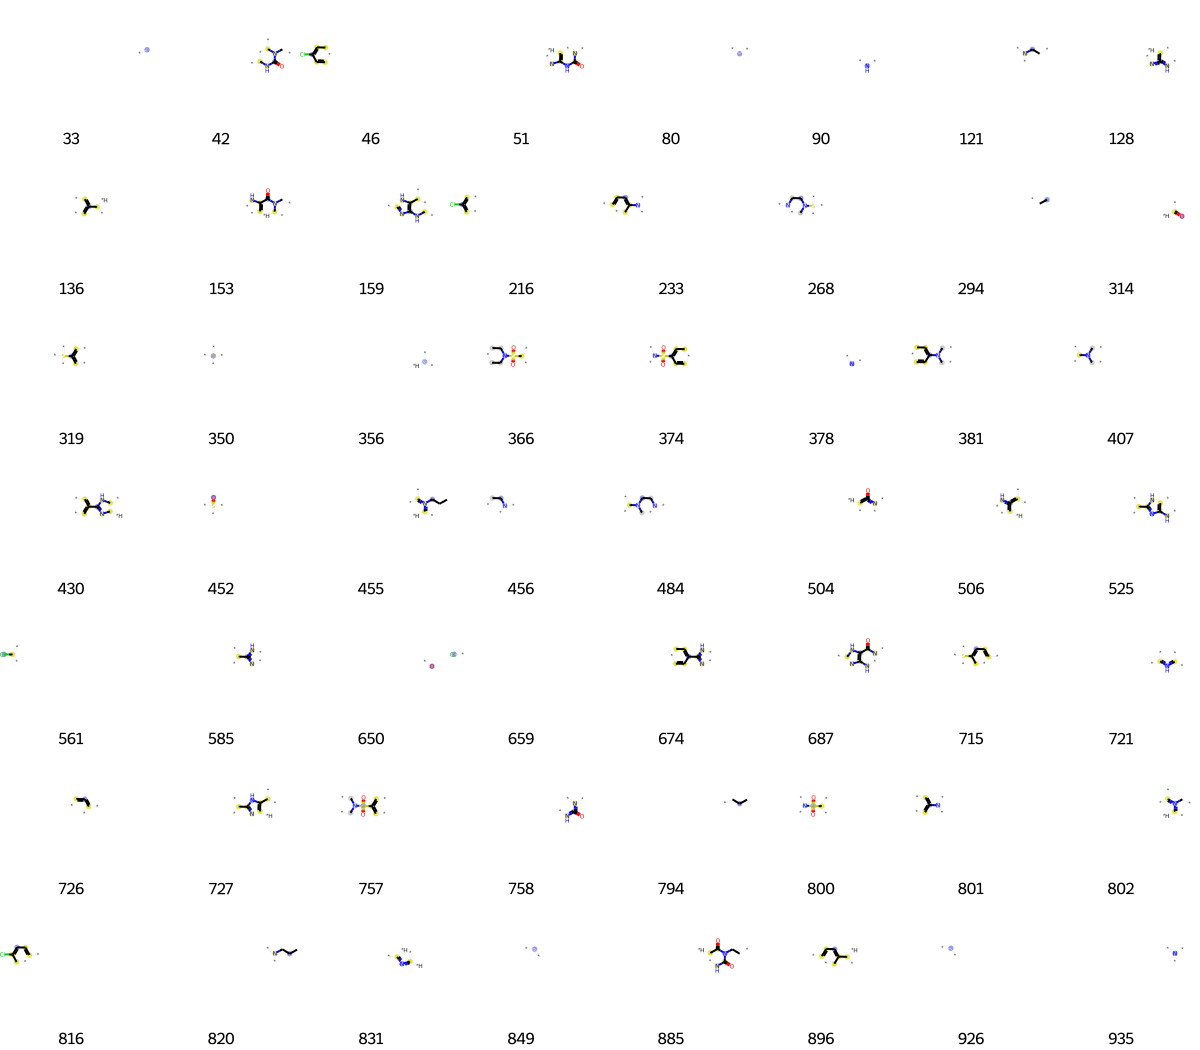

In [568]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [569]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[73,
 74,
 84,
 90,
 97,
 110,
 114,
 128,
 133,
 134,
 140,
 186,
 191,
 200,
 236,
 270,
 274,
 289,
 293,
 352,
 356,
 378,
 393,
 412,
 429,
 585,
 607,
 726,
 728,
 766,
 792,
 807,
 809,
 832,
 841,
 849,
 873,
 875,
 903,
 904,
 909,
 922,
 929,
 936,
 986,
 990]

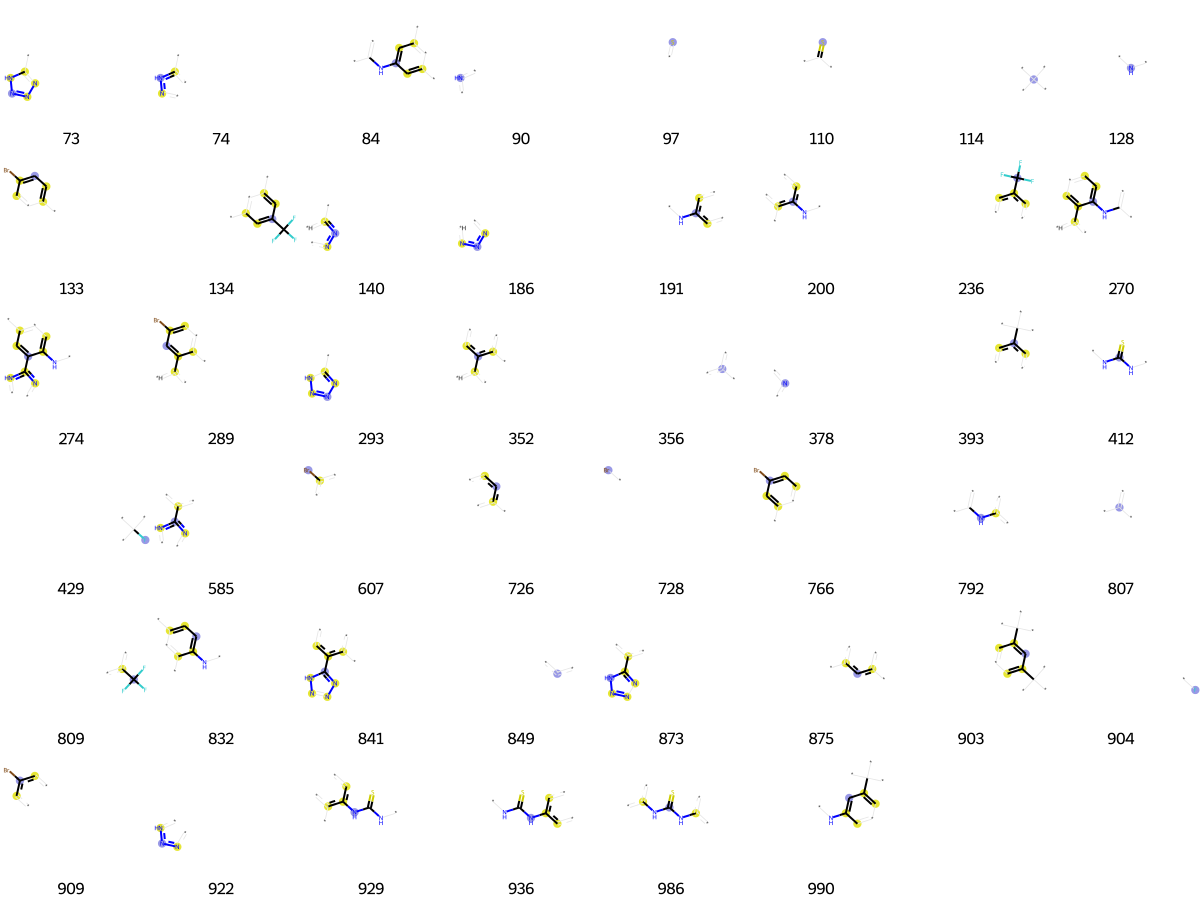

In [570]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [571]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[135,
 140,
 147,
 176,
 240,
 281,
 356,
 378,
 391,
 433,
 446,
 543,
 611,
 675,
 787,
 849]

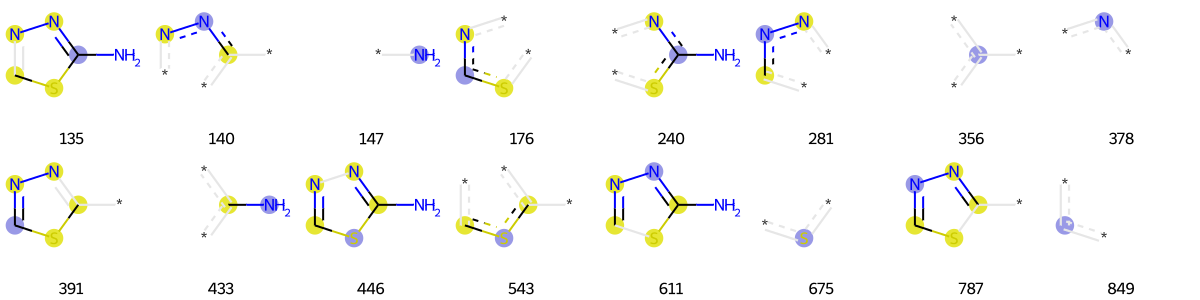

In [572]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [573]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[9,
 33,
 39,
 42,
 64,
 80,
 90,
 128,
 145,
 175,
 257,
 325,
 356,
 358,
 387,
 389,
 406,
 423,
 426,
 551,
 573,
 586,
 650,
 692,
 695,
 698,
 721,
 726,
 730,
 789,
 807,
 841,
 849,
 893,
 906,
 949,
 967,
 975,
 1004]

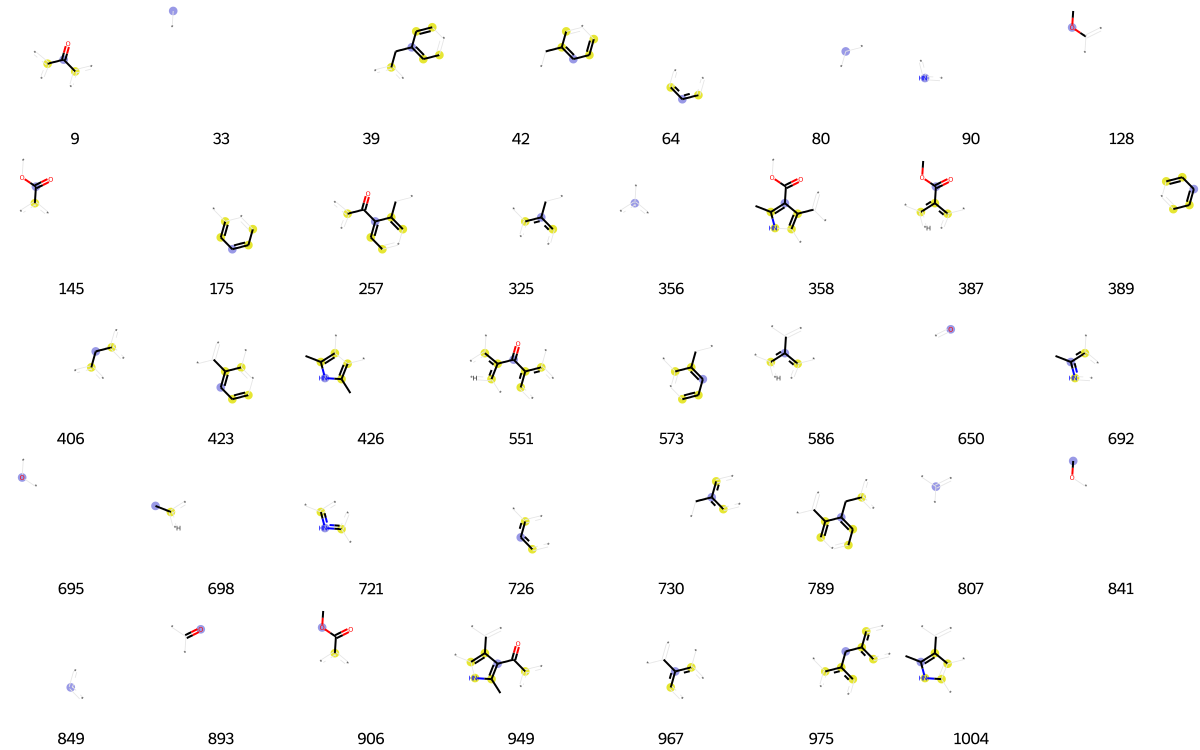

In [574]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [575]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[58,
 80,
 86,
 90,
 243,
 253,
 259,
 263,
 299,
 301,
 314,
 334,
 356,
 389,
 398,
 431,
 463,
 540,
 650,
 655,
 675,
 713,
 742,
 772,
 804,
 807,
 832,
 887,
 893,
 926,
 950,
 983,
 998,
 1019]

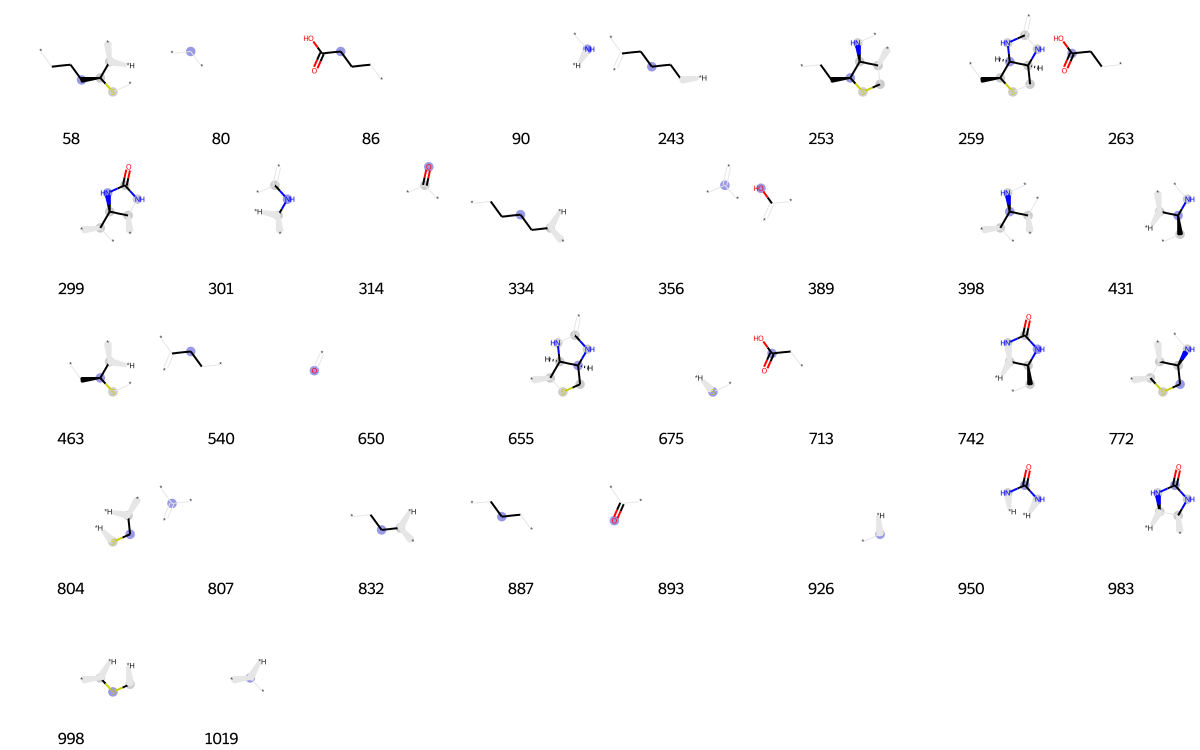

In [576]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [577]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[4,
 80,
 102,
 147,
 194,
 222,
 233,
 240,
 268,
 314,
 356,
 378,
 409,
 428,
 433,
 439,
 492,
 577,
 601,
 606,
 610,
 635,
 650,
 656,
 740,
 795,
 807,
 831,
 849,
 863,
 896,
 897,
 926,
 932,
 935,
 1008,
 1019]

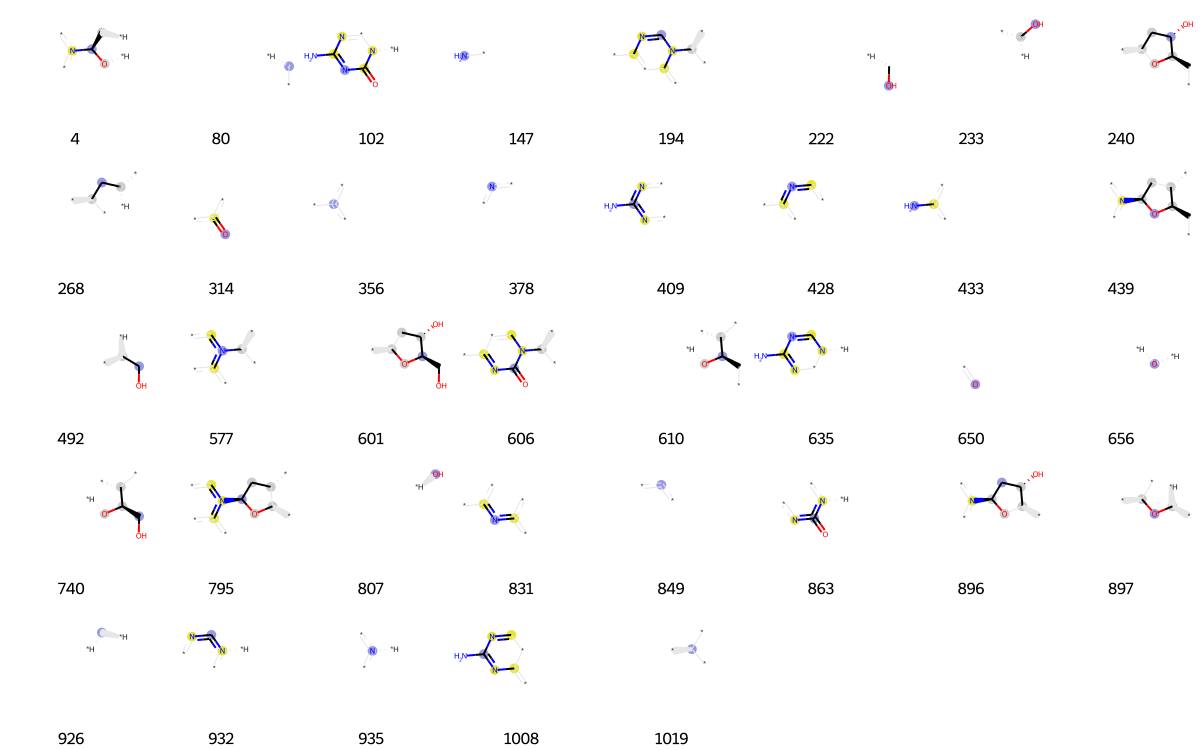

In [578]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [579]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[1,
 4,
 33,
 41,
 64,
 79,
 80,
 81,
 86,
 90,
 94,
 108,
 117,
 119,
 128,
 132,
 140,
 147,
 151,
 173,
 175,
 188,
 193,
 197,
 222,
 231,
 242,
 253,
 283,
 289,
 301,
 310,
 314,
 325,
 328,
 333,
 354,
 356,
 362,
 364,
 369,
 378,
 389,
 409,
 416,
 427,
 446,
 456,
 457,
 458,
 482,
 488,
 508,
 511,
 531,
 549,
 551,
 573,
 578,
 579,
 583,
 592,
 623,
 624,
 626,
 648,
 650,
 661,
 664,
 667,
 680,
 689,
 691,
 708,
 713,
 714,
 726,
 730,
 731,
 736,
 739,
 745,
 754,
 759,
 806,
 807,
 823,
 837,
 841,
 849,
 852,
 855,
 857,
 867,
 874,
 875,
 887,
 892,
 893,
 894,
 913,
 918,
 926,
 927,
 935,
 946,
 963,
 973,
 982,
 983,
 985,
 992,
 1017,
 1019]

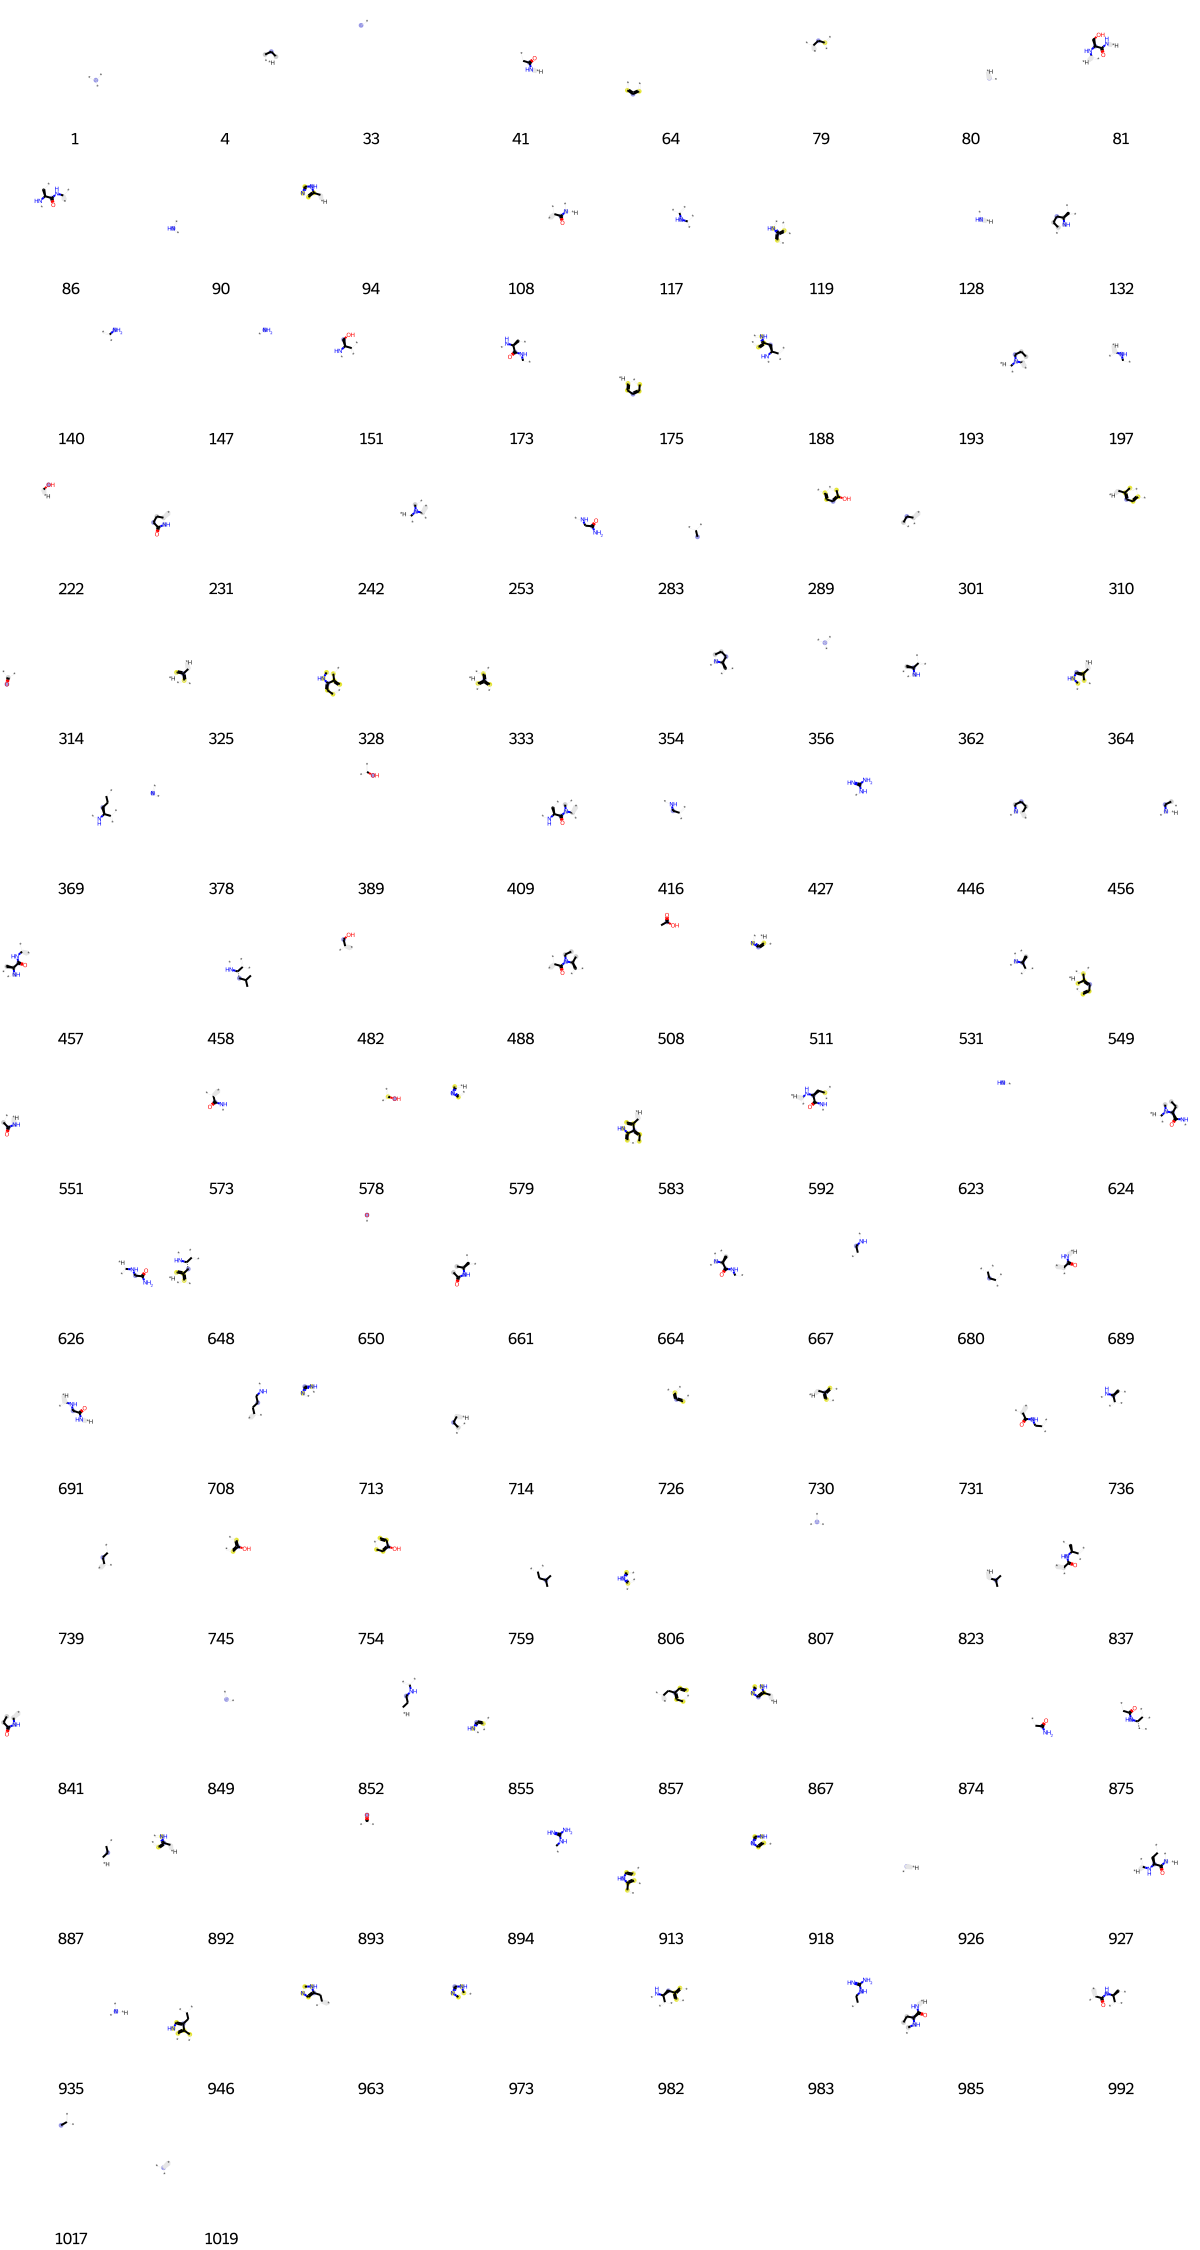

In [580]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [581]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[34,
 45,
 64,
 80,
 90,
 119,
 121,
 175,
 221,
 254,
 261,
 309,
 314,
 333,
 356,
 361,
 386,
 427,
 456,
 463,
 466,
 502,
 540,
 563,
 568,
 581,
 594,
 637,
 646,
 650,
 653,
 669,
 673,
 699,
 714,
 721,
 726,
 757,
 758,
 759,
 767,
 807,
 849,
 887,
 893,
 904,
 926,
 935,
 969,
 987,
 1021]

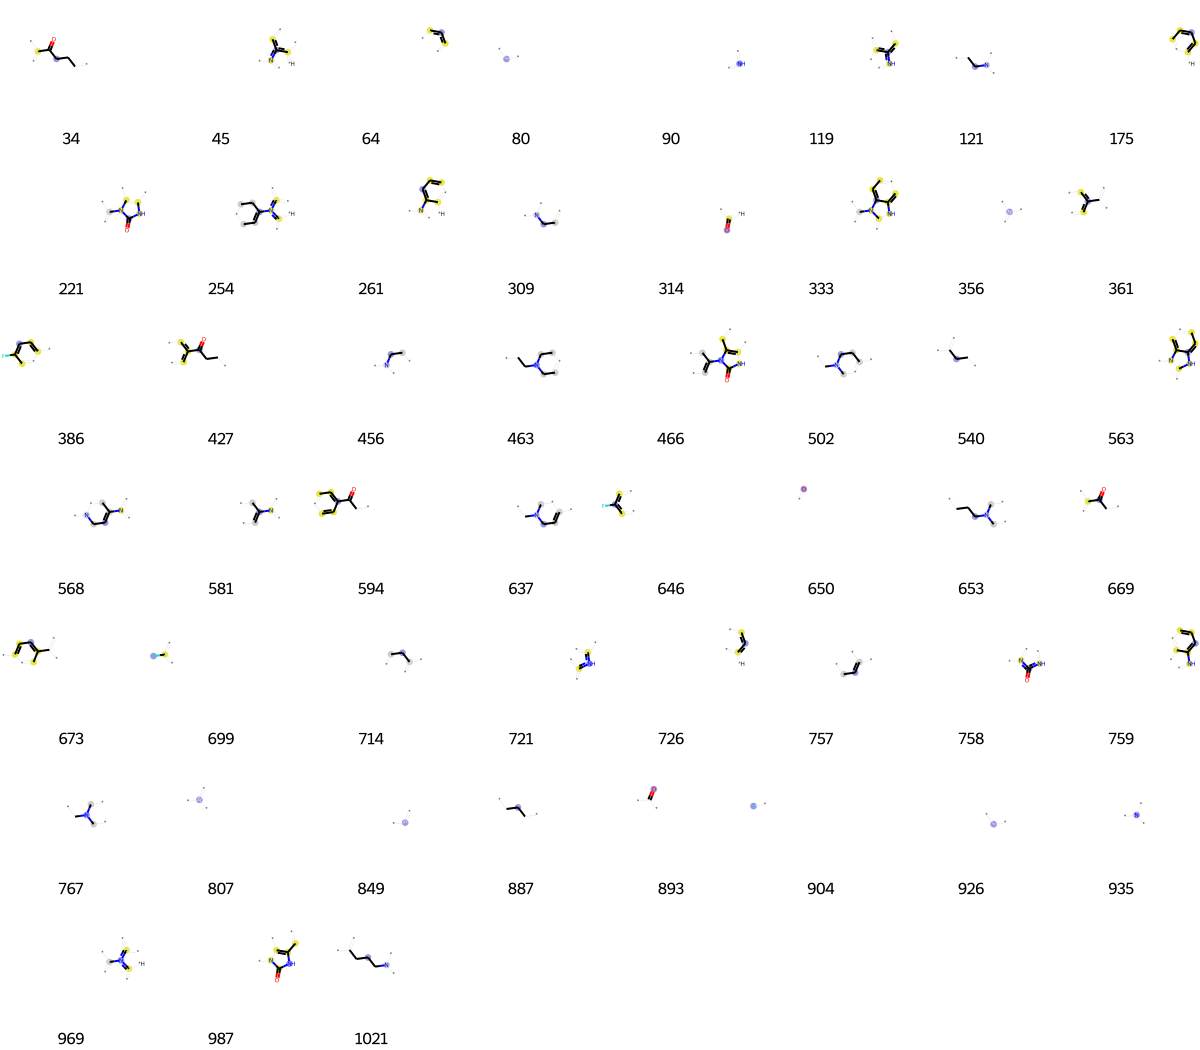

In [582]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [583]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[33,
 40,
 64,
 175,
 236,
 285,
 343,
 350,
 356,
 418,
 452,
 463,
 466,
 481,
 550,
 650,
 652,
 660,
 673,
 687,
 692,
 694,
 715,
 725,
 726,
 727,
 807,
 849,
 864,
 891,
 1003]

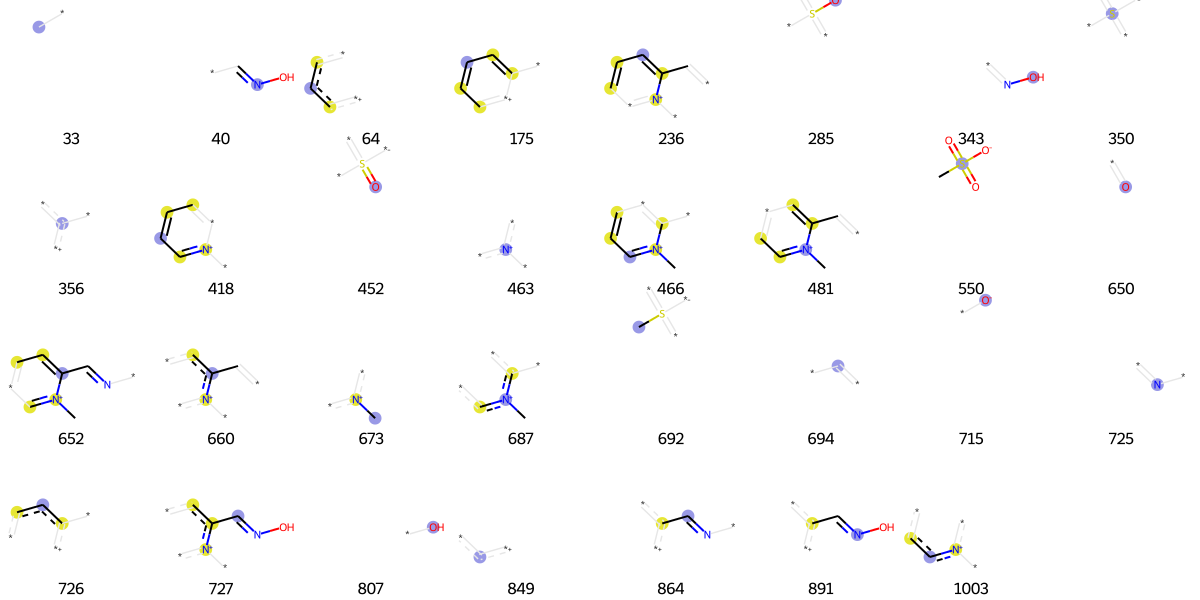

In [584]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [585]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[11,
 17,
 22,
 32,
 33,
 36,
 46,
 80,
 84,
 96,
 147,
 162,
 170,
 233,
 250,
 251,
 268,
 314,
 356,
 403,
 412,
 424,
 493,
 519,
 547,
 593,
 628,
 639,
 650,
 655,
 656,
 676,
 679,
 695,
 703,
 706,
 748,
 750,
 753,
 760,
 767,
 781,
 786,
 787,
 804,
 807,
 835,
 836,
 846,
 849,
 893,
 904,
 905,
 910,
 926,
 951,
 960,
 967,
 973,
 980,
 997,
 1017,
 1019]

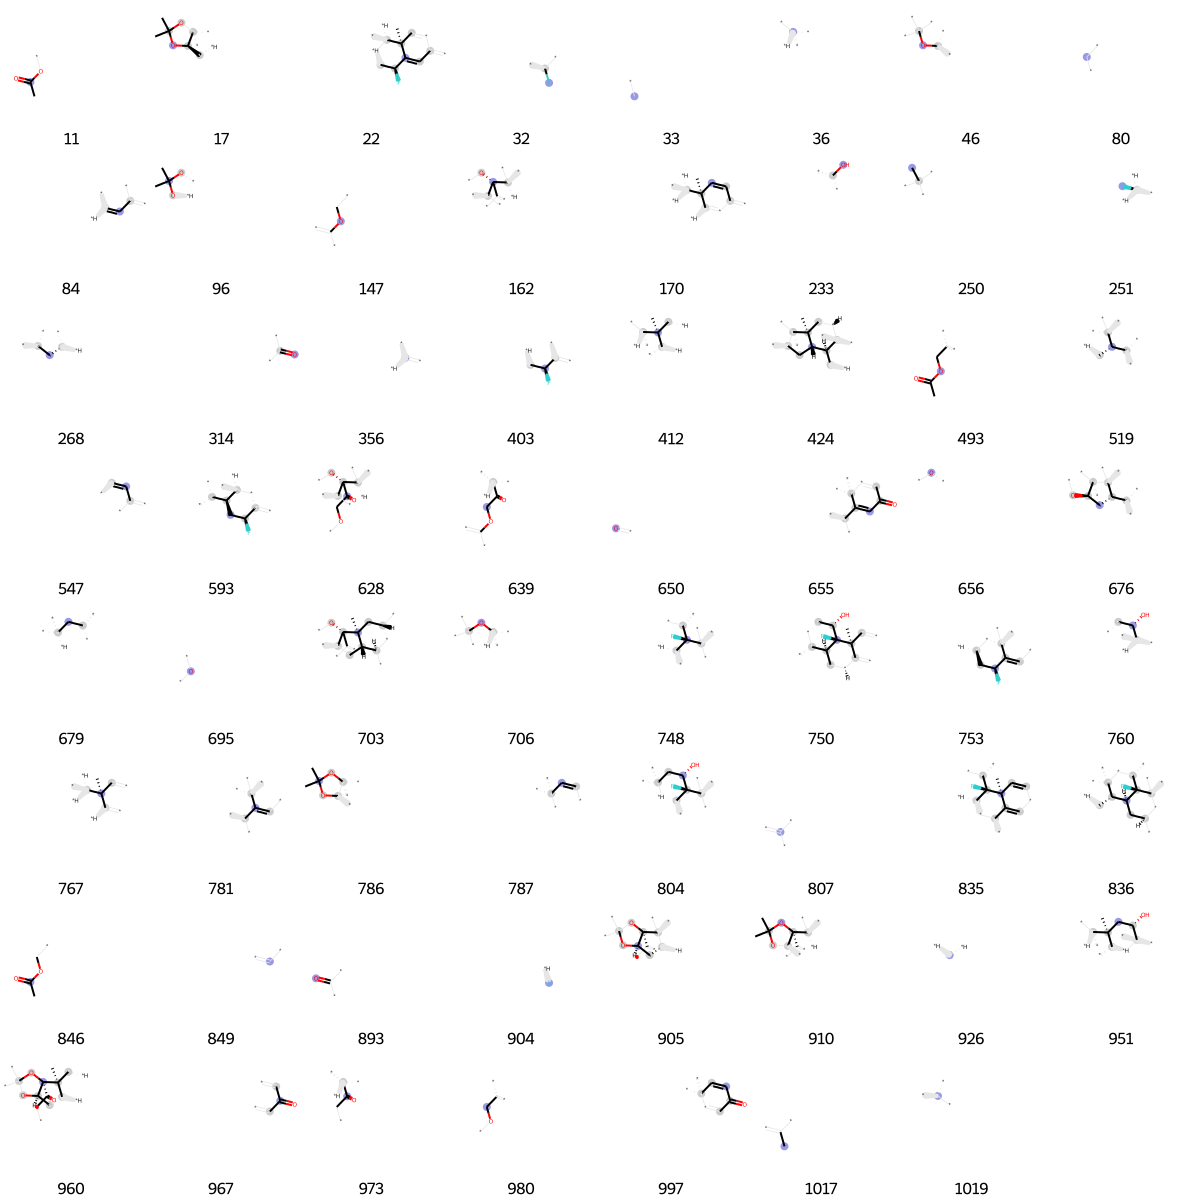

In [586]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [587]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[33,
 64,
 65,
 145,
 175,
 244,
 290,
 319,
 322,
 338,
 350,
 352,
 356,
 441,
 452,
 463,
 507,
 512,
 549,
 564,
 569,
 573,
 584,
 650,
 694,
 695,
 715,
 718,
 726,
 762,
 776,
 781,
 791,
 807,
 815,
 831,
 835,
 841,
 849,
 878,
 881,
 893,
 922,
 961,
 994,
 1003,
 1009,
 1017]

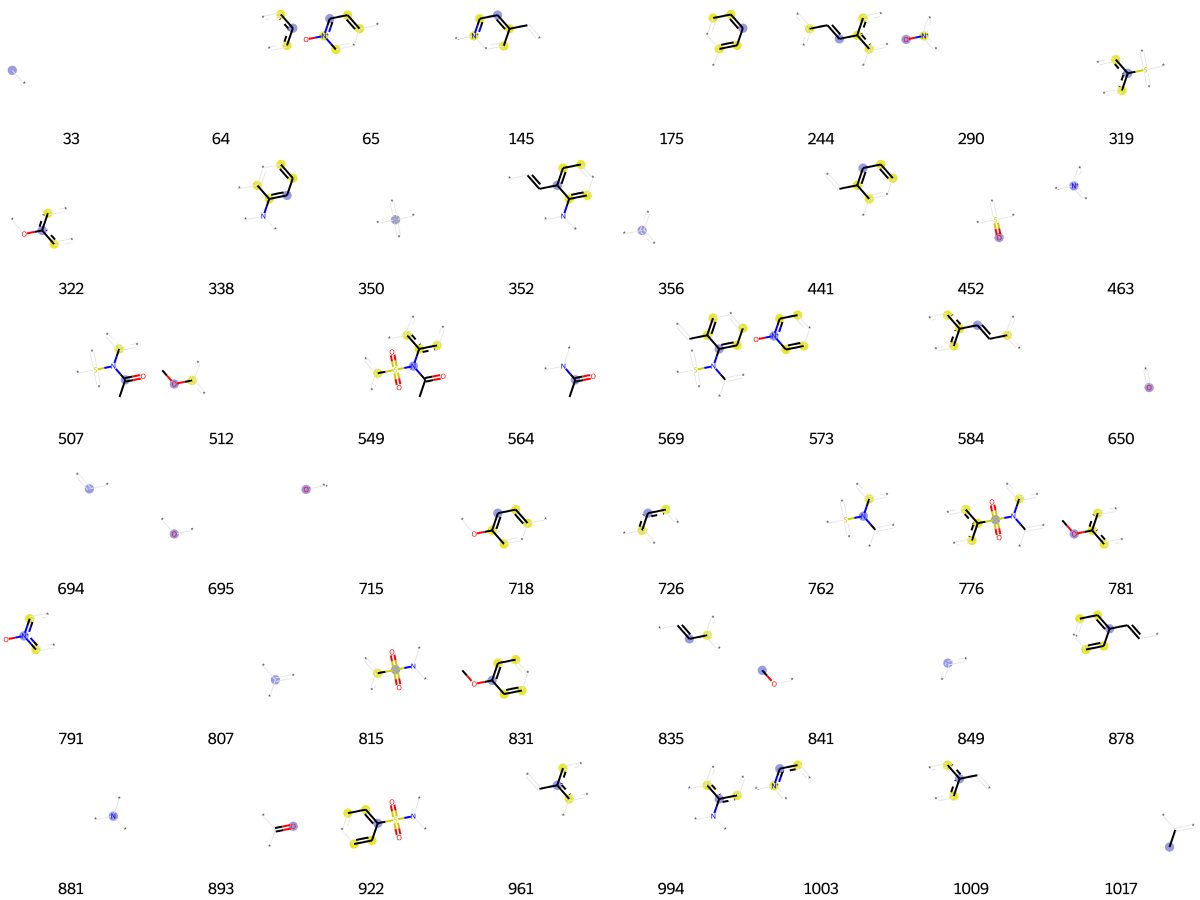

In [588]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [589]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[13,
 15,
 19,
 33,
 64,
 80,
 107,
 114,
 122,
 128,
 130,
 160,
 191,
 310,
 318,
 319,
 329,
 356,
 361,
 378,
 392,
 410,
 428,
 429,
 491,
 558,
 562,
 575,
 726,
 787,
 807,
 809,
 827,
 831,
 842,
 849,
 855,
 875,
 884,
 886,
 888,
 895,
 904,
 929,
 937,
 980,
 1009,
 1023]

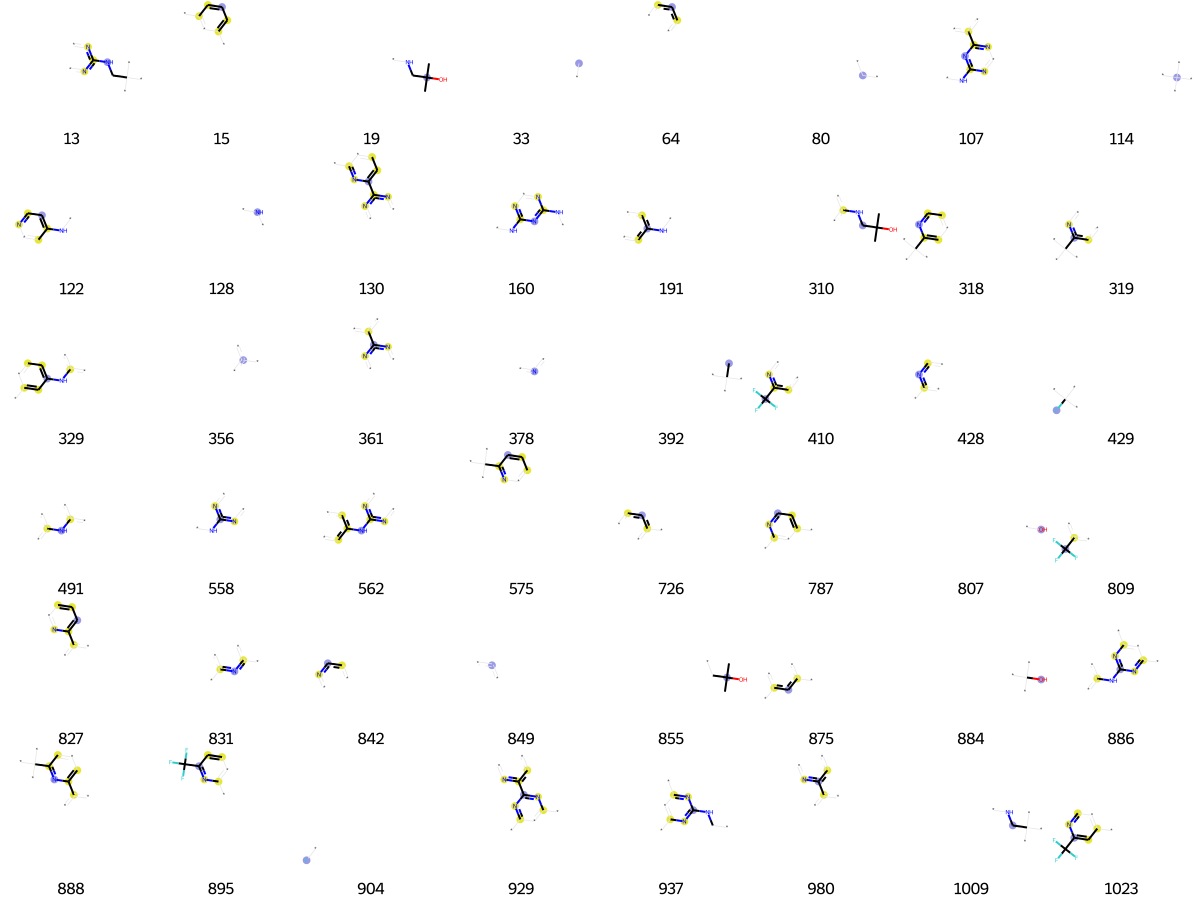

In [590]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [591]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[1,
 9,
 14,
 15,
 33,
 63,
 64,
 80,
 88,
 128,
 175,
 222,
 241,
 287,
 333,
 348,
 356,
 383,
 386,
 406,
 459,
 514,
 543,
 549,
 664,
 667,
 671,
 675,
 695,
 716,
 718,
 726,
 737,
 739,
 831,
 849,
 946,
 971,
 1014]

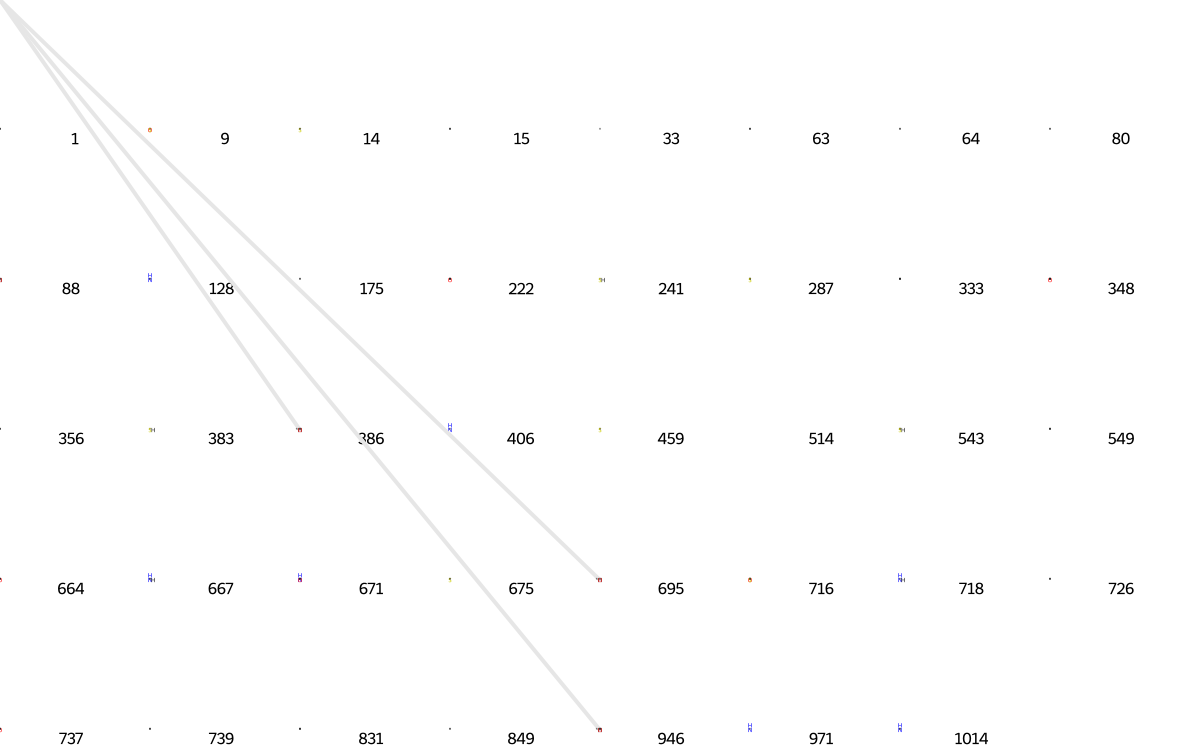

In [592]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [593]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[9,
 71,
 75,
 80,
 147,
 152,
 194,
 209,
 210,
 222,
 229,
 233,
 356,
 378,
 428,
 433,
 435,
 454,
 463,
 489,
 492,
 519,
 548,
 577,
 610,
 656,
 672,
 700,
 740,
 786,
 807,
 820,
 849,
 897,
 932,
 935,
 962,
 1019]

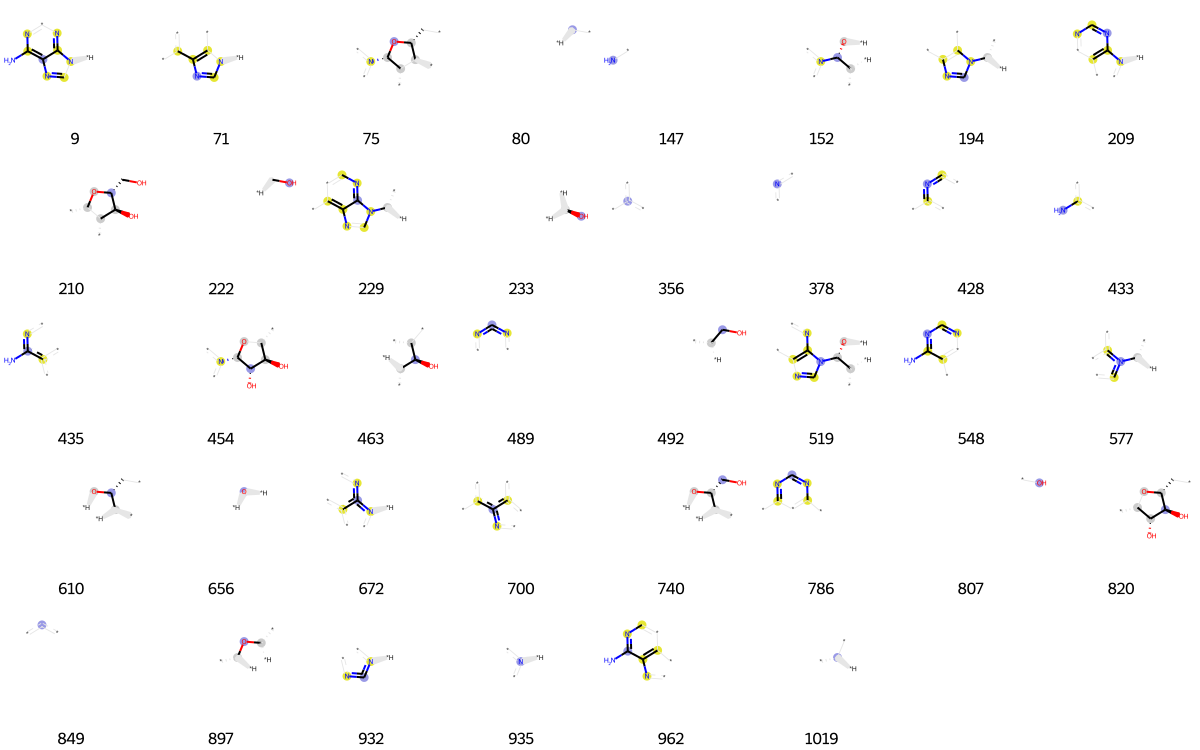

In [594]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [595]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[15,
 63,
 64,
 90,
 184,
 284,
 305,
 314,
 333,
 348,
 350,
 356,
 366,
 378,
 392,
 445,
 452,
 456,
 492,
 511,
 562,
 579,
 585,
 647,
 650,
 726,
 733,
 800,
 831,
 842,
 849,
 894,
 926,
 935,
 992,
 996,
 1020]

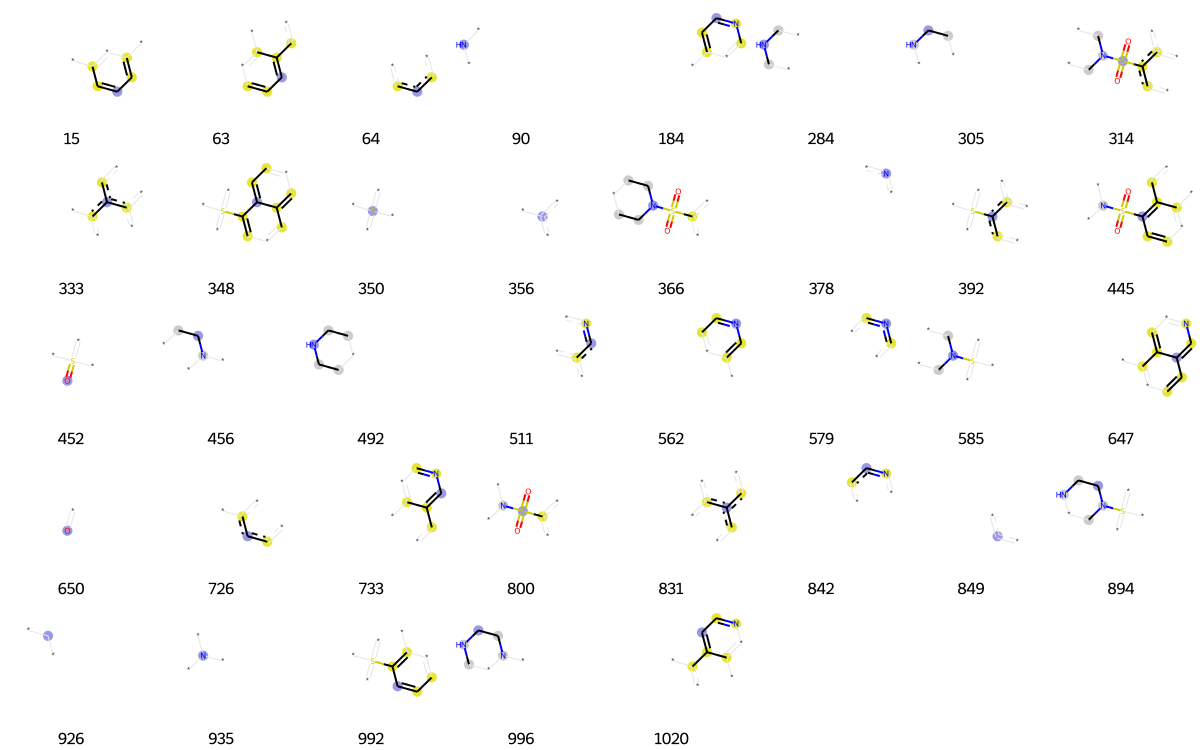

In [596]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [597]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[15,
 33,
 64,
 73,
 128,
 136,
 154,
 157,
 161,
 200,
 204,
 249,
 283,
 342,
 356,
 367,
 378,
 381,
 419,
 428,
 458,
 461,
 491,
 508,
 511,
 512,
 540,
 544,
 558,
 561,
 579,
 621,
 650,
 659,
 672,
 694,
 695,
 698,
 715,
 719,
 723,
 726,
 770,
 792,
 807,
 831,
 841,
 849,
 875,
 893,
 896,
 927,
 946,
 959,
 961,
 975,
 997,
 1003,
 1011]

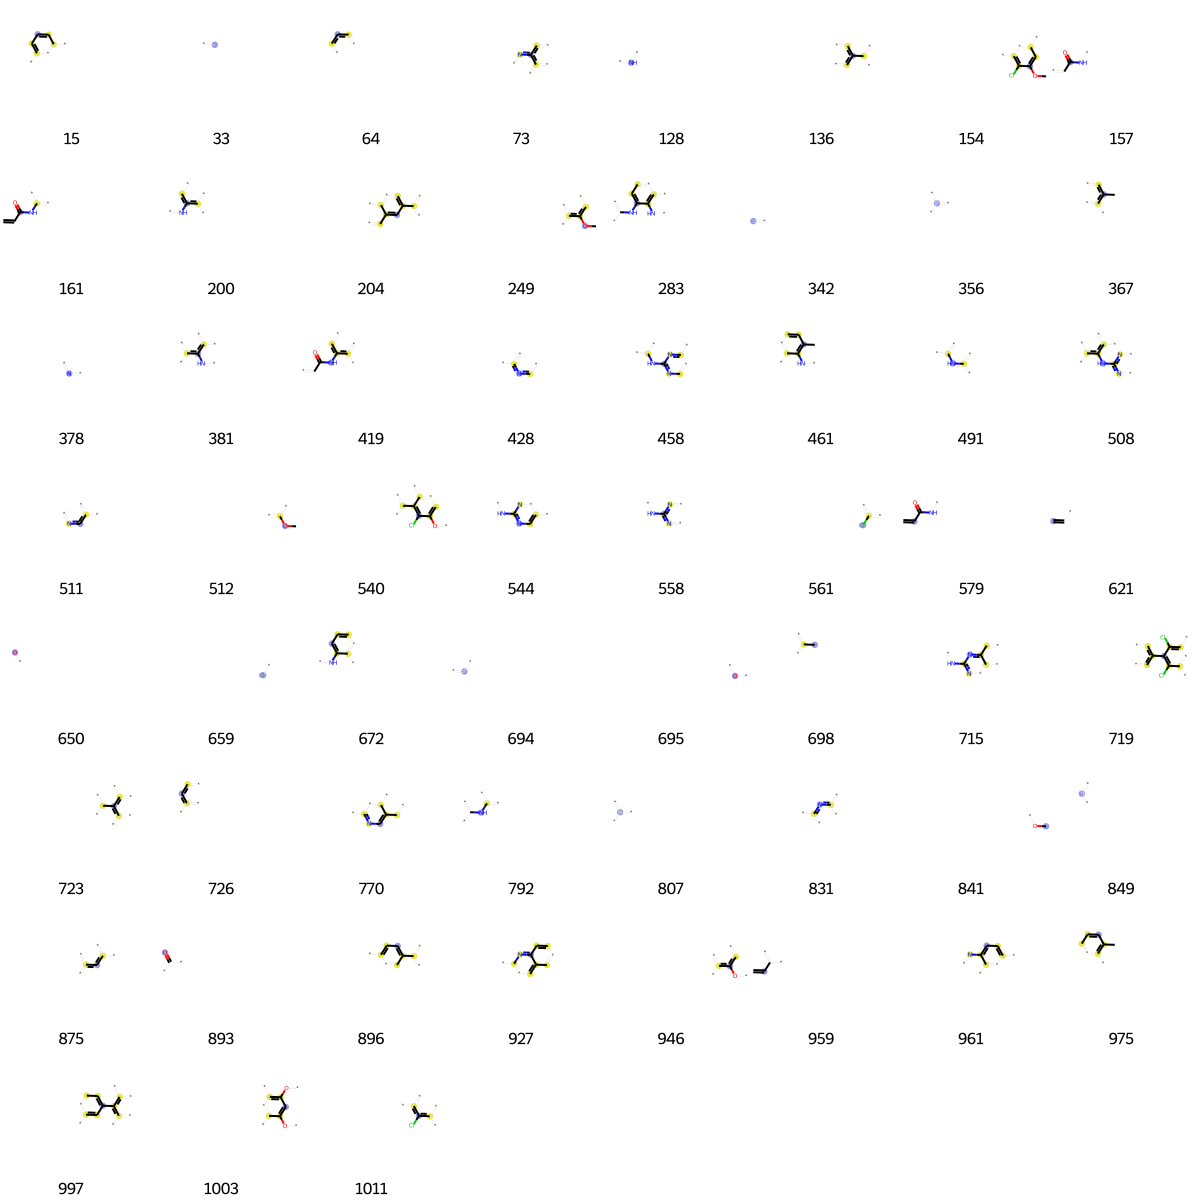

In [598]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [599]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[1,
 2,
 4,
 9,
 18,
 33,
 39,
 40,
 47,
 50,
 51,
 80,
 101,
 108,
 114,
 117,
 122,
 128,
 139,
 145,
 186,
 210,
 229,
 242,
 276,
 294,
 301,
 318,
 356,
 378,
 387,
 388,
 392,
 428,
 483,
 486,
 511,
 552,
 562,
 573,
 579,
 585,
 610,
 614,
 615,
 622,
 631,
 650,
 684,
 689,
 736,
 739,
 749,
 768,
 776,
 794,
 800,
 807,
 814,
 824,
 837,
 842,
 847,
 849,
 855,
 865,
 890,
 893,
 906,
 926,
 935,
 937,
 950,
 954,
 1013,
 1019]

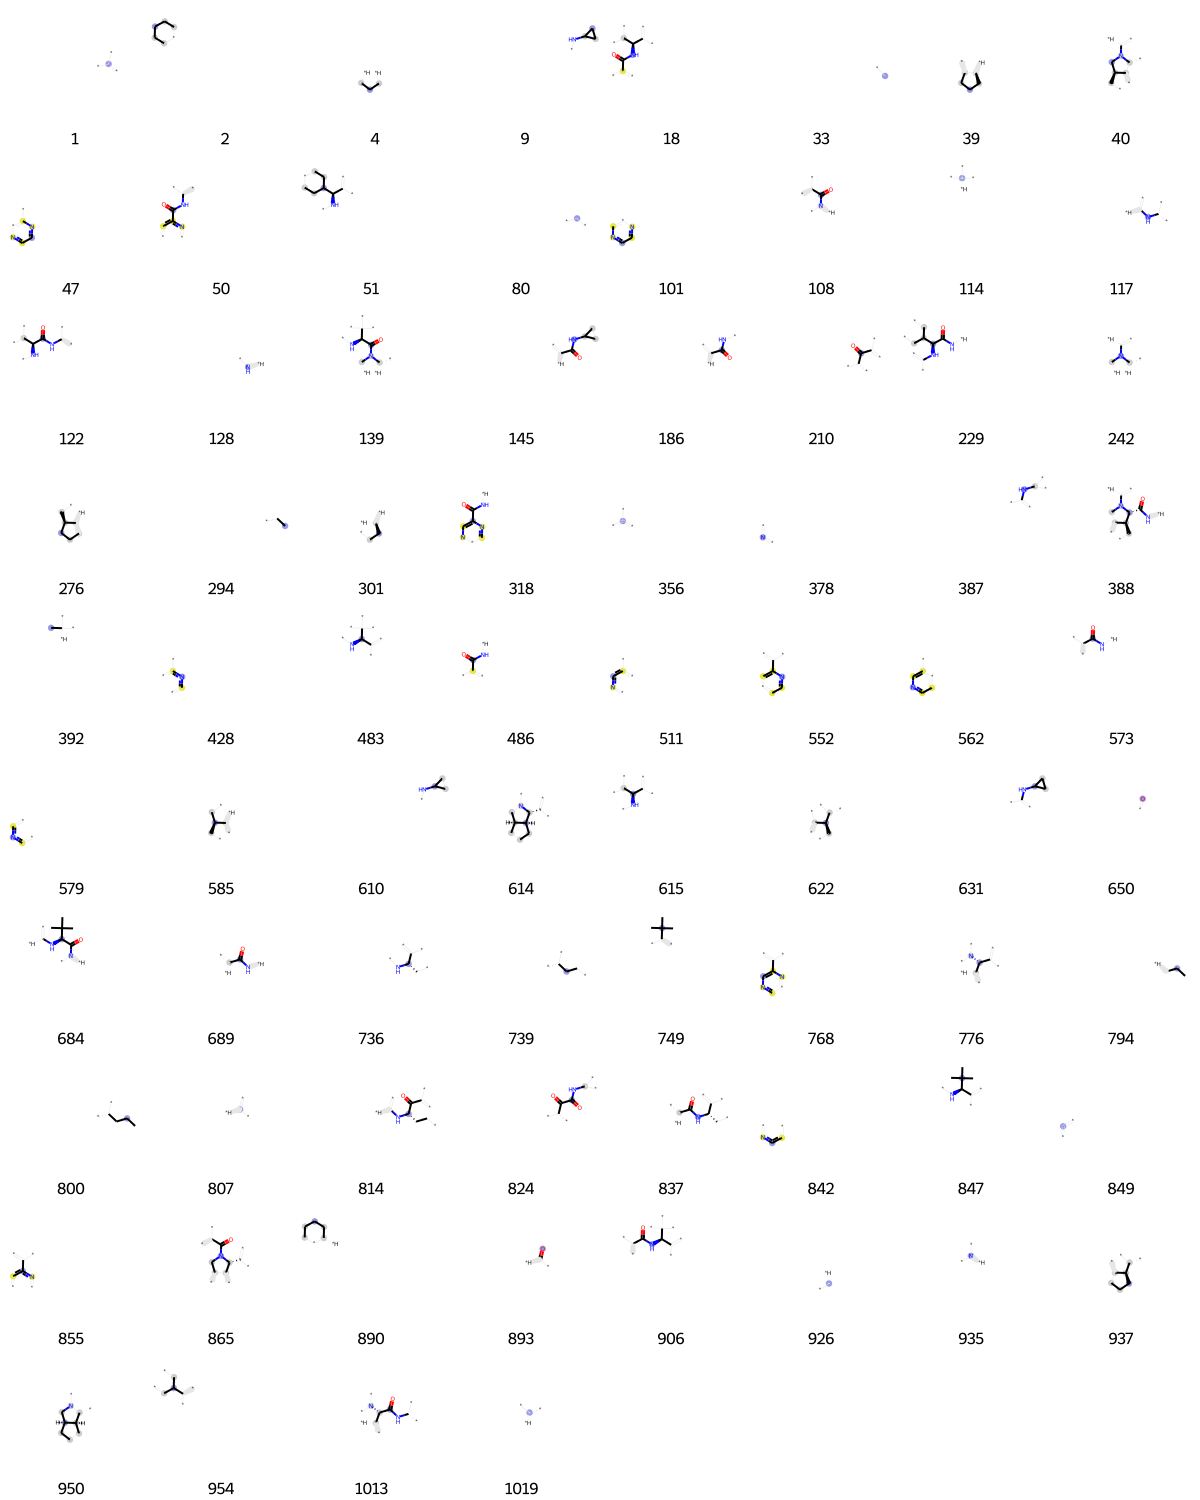

In [600]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [601]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[4,
 24,
 33,
 73,
 80,
 82,
 126,
 128,
 165,
 191,
 192,
 202,
 216,
 276,
 325,
 333,
 356,
 378,
 381,
 398,
 438,
 456,
 458,
 464,
 482,
 486,
 491,
 494,
 512,
 535,
 546,
 561,
 578,
 650,
 659,
 661,
 695,
 700,
 709,
 711,
 726,
 741,
 749,
 767,
 768,
 784,
 788,
 807,
 814,
 816,
 831,
 841,
 849,
 856,
 875,
 926,
 935,
 961,
 974,
 994,
 997]

In [602]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[1,
 15,
 33,
 64,
 65,
 80,
 128,
 227,
 338,
 341,
 343,
 356,
 381,
 406,
 410,
 411,
 514,
 557,
 578,
 606,
 632,
 726,
 745,
 807,
 844,
 849,
 875,
 971]

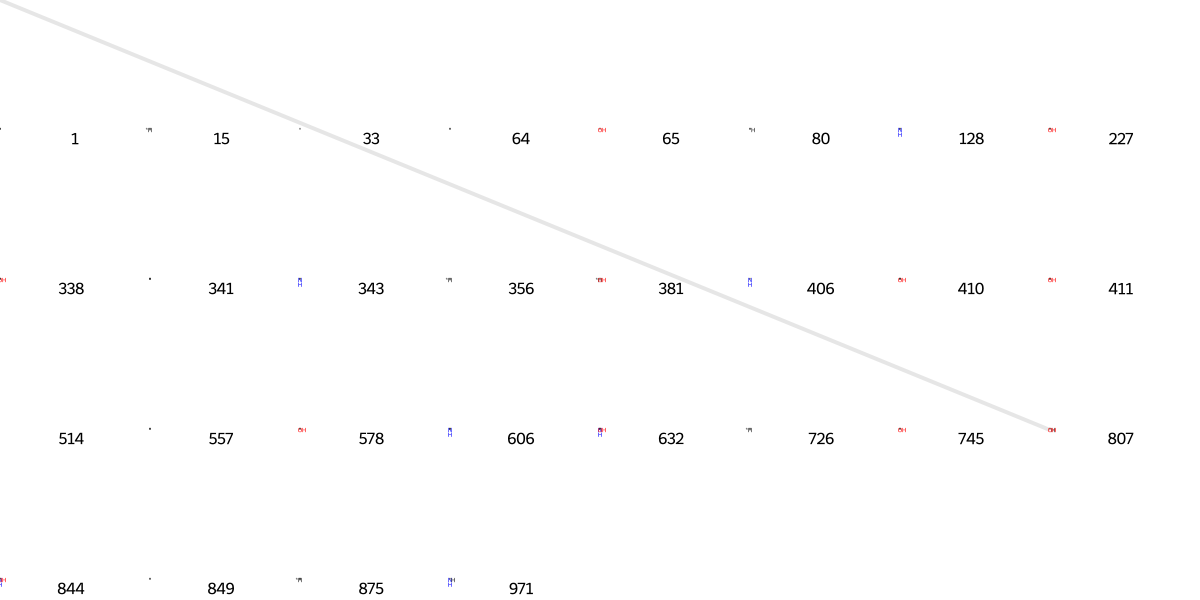

In [603]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [605]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[2,
 4,
 15,
 63,
 64,
 71,
 80,
 88,
 128,
 168,
 175,
 191,
 194,
 233,
 279,
 282,
 301,
 326,
 333,
 356,
 378,
 381,
 386,
 391,
 407,
 412,
 417,
 428,
 456,
 474,
 491,
 500,
 502,
 523,
 549,
 577,
 593,
 656,
 672,
 687,
 695,
 700,
 708,
 726,
 801,
 831,
 843,
 849,
 886,
 888,
 890,
 926,
 932,
 935,
 946,
 950,
 969,
 979,
 997,
 1014,
 1019]

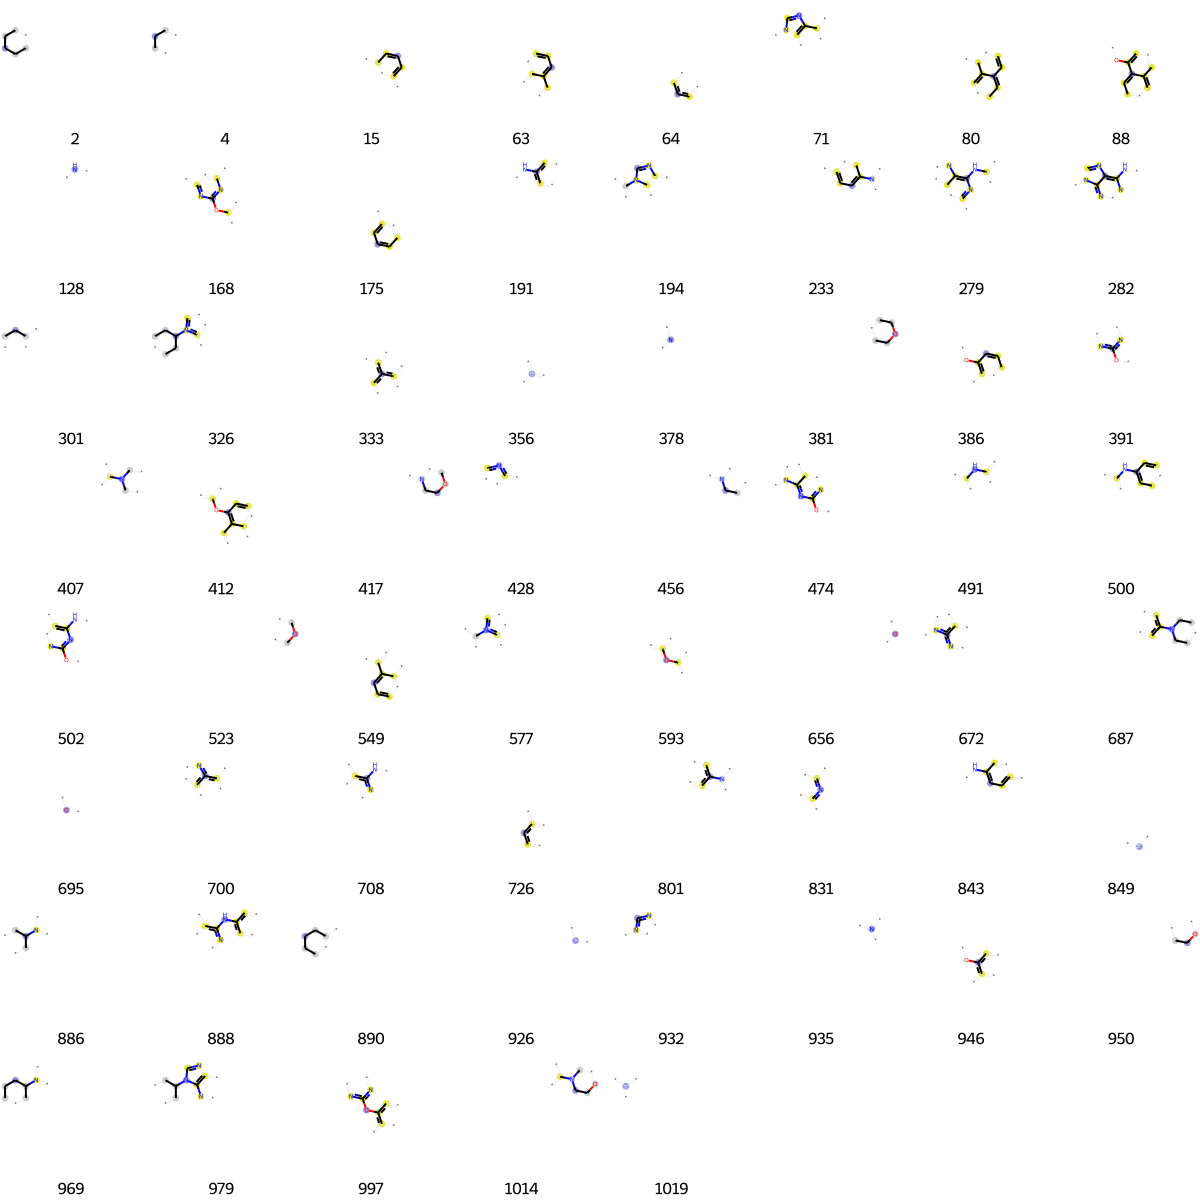

In [606]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [607]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[5,
 23,
 33,
 53,
 112,
 128,
 136,
 140,
 147,
 200,
 209,
 237,
 301,
 309,
 345,
 350,
 356,
 378,
 381,
 384,
 428,
 464,
 486,
 490,
 514,
 523,
 552,
 569,
 580,
 588,
 602,
 650,
 656,
 659,
 698,
 707,
 716,
 726,
 737,
 758,
 787,
 792,
 795,
 800,
 807,
 811,
 831,
 842,
 849,
 855,
 859,
 875,
 886,
 889,
 893,
 926,
 932,
 935,
 947,
 950,
 965,
 1019]

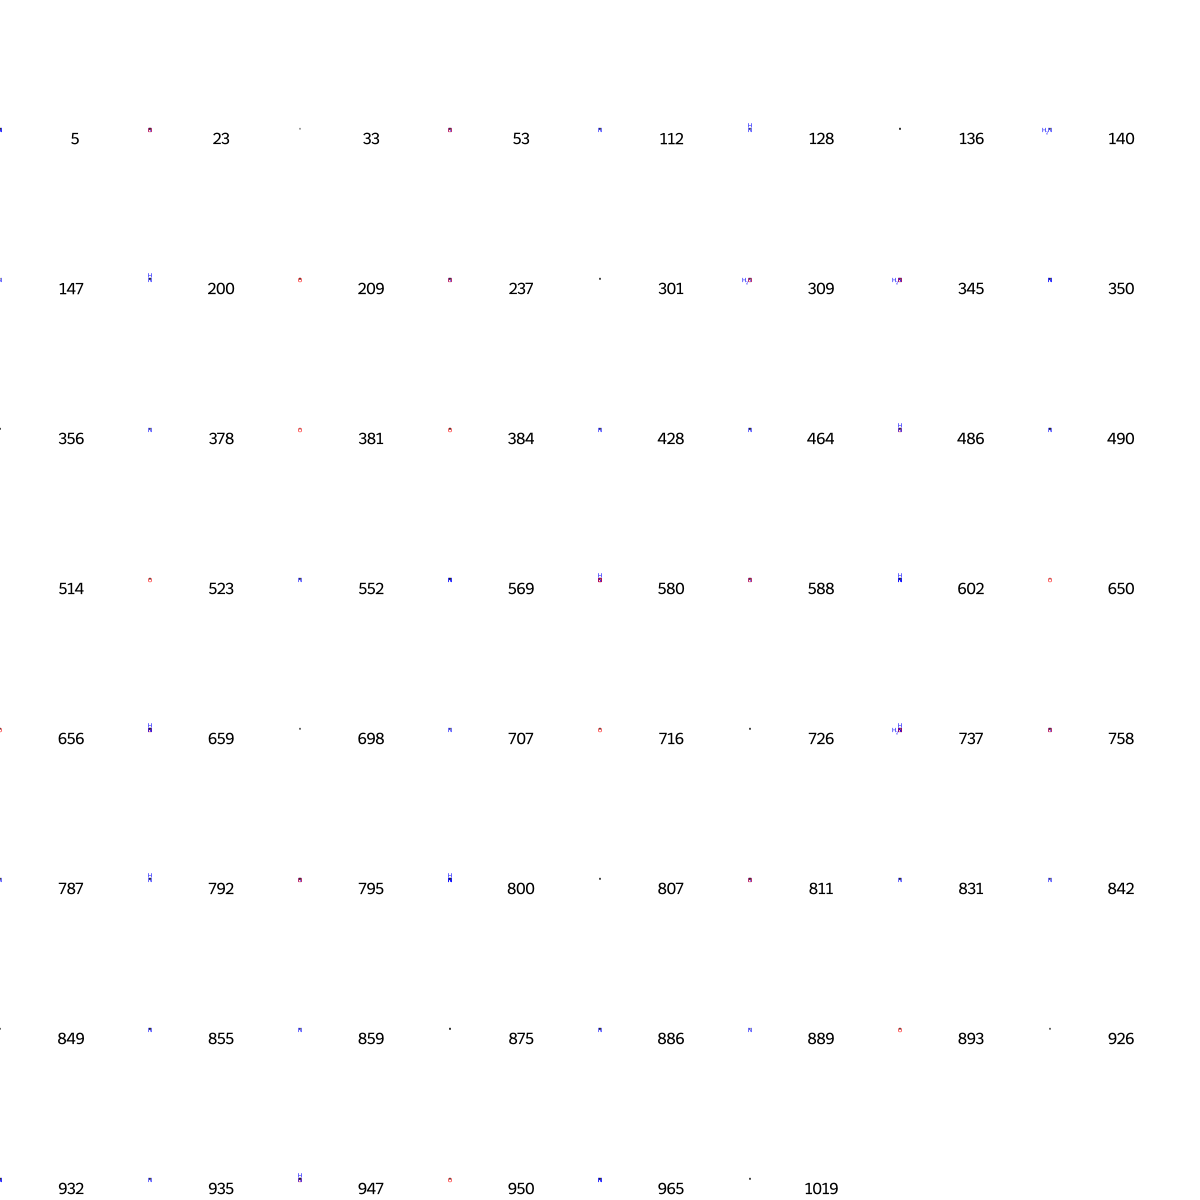

In [608]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [612]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[10,
 13,
 27,
 33,
 80,
 119,
 147,
 225,
 294,
 362,
 399,
 408,
 420,
 514,
 540,
 591,
 650,
 677,
 695,
 710,
 720,
 794,
 807,
 843,
 850,
 887,
 893,
 981]

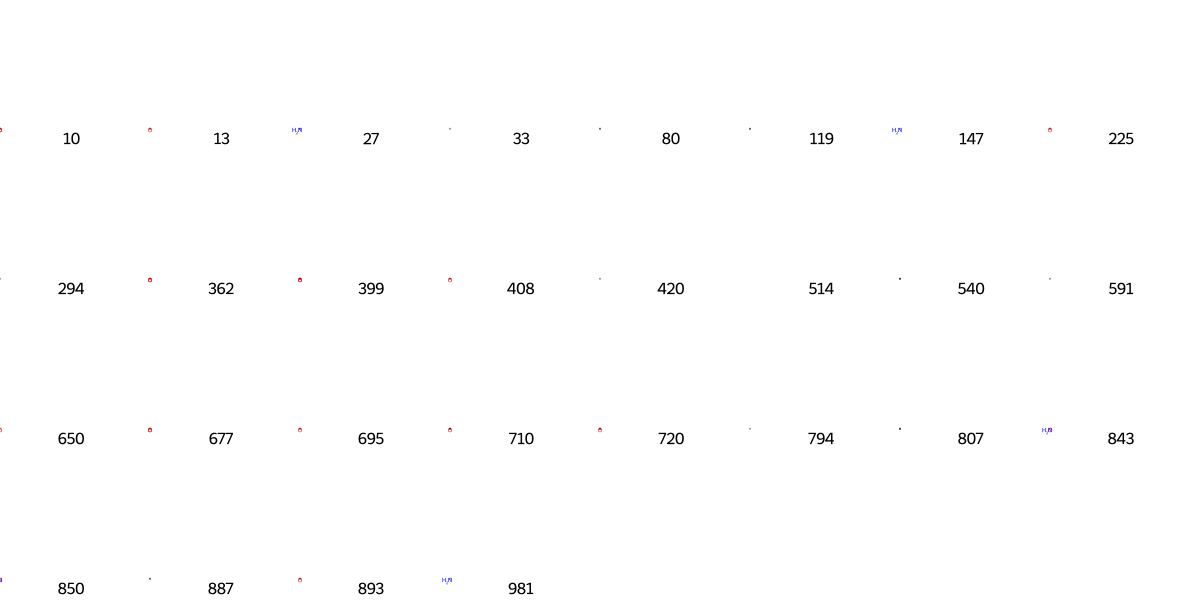

In [613]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [614]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[27,
 33,
 45,
 54,
 64,
 80,
 85,
 116,
 121,
 139,
 145,
 147,
 157,
 175,
 202,
 203,
 214,
 217,
 294,
 322,
 323,
 341,
 356,
 389,
 399,
 461,
 507,
 564,
 578,
 586,
 595,
 607,
 650,
 652,
 662,
 692,
 695,
 698,
 726,
 728,
 740,
 759,
 762,
 807,
 811,
 833,
 849,
 875,
 881,
 893,
 931,
 935,
 960,
 999,
 1010]

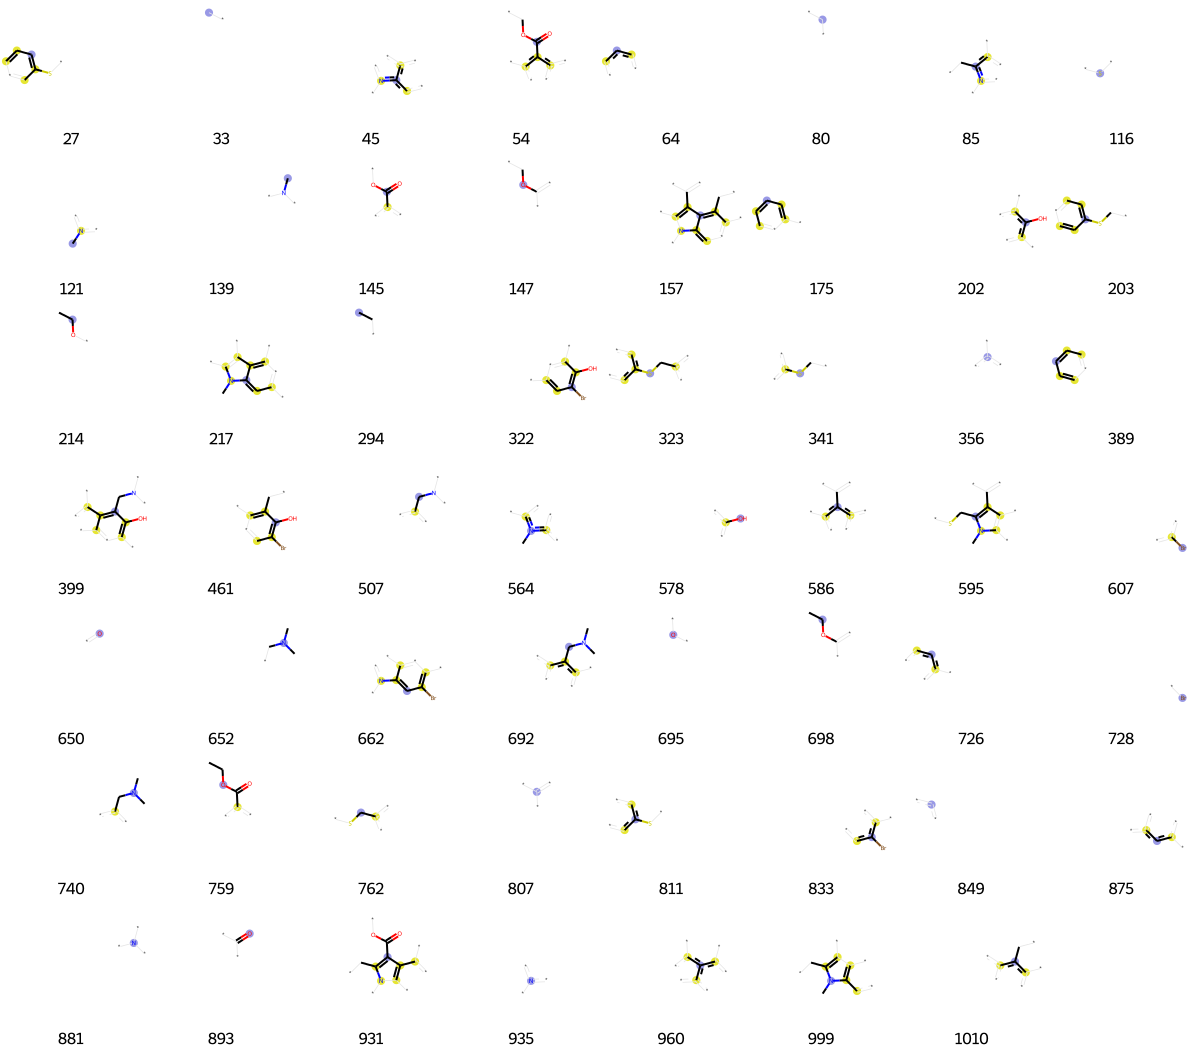

In [615]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [616]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[29,
 53,
 80,
 128,
 134,
 140,
 187,
 191,
 216,
 223,
 239,
 255,
 264,
 279,
 301,
 329,
 356,
 378,
 380,
 389,
 486,
 491,
 515,
 516,
 525,
 531,
 534,
 580,
 588,
 647,
 650,
 654,
 656,
 699,
 713,
 722,
 726,
 779,
 792,
 797,
 807,
 816,
 841,
 843,
 845,
 849,
 875,
 893,
 904,
 926,
 954,
 976,
 1004,
 1019]

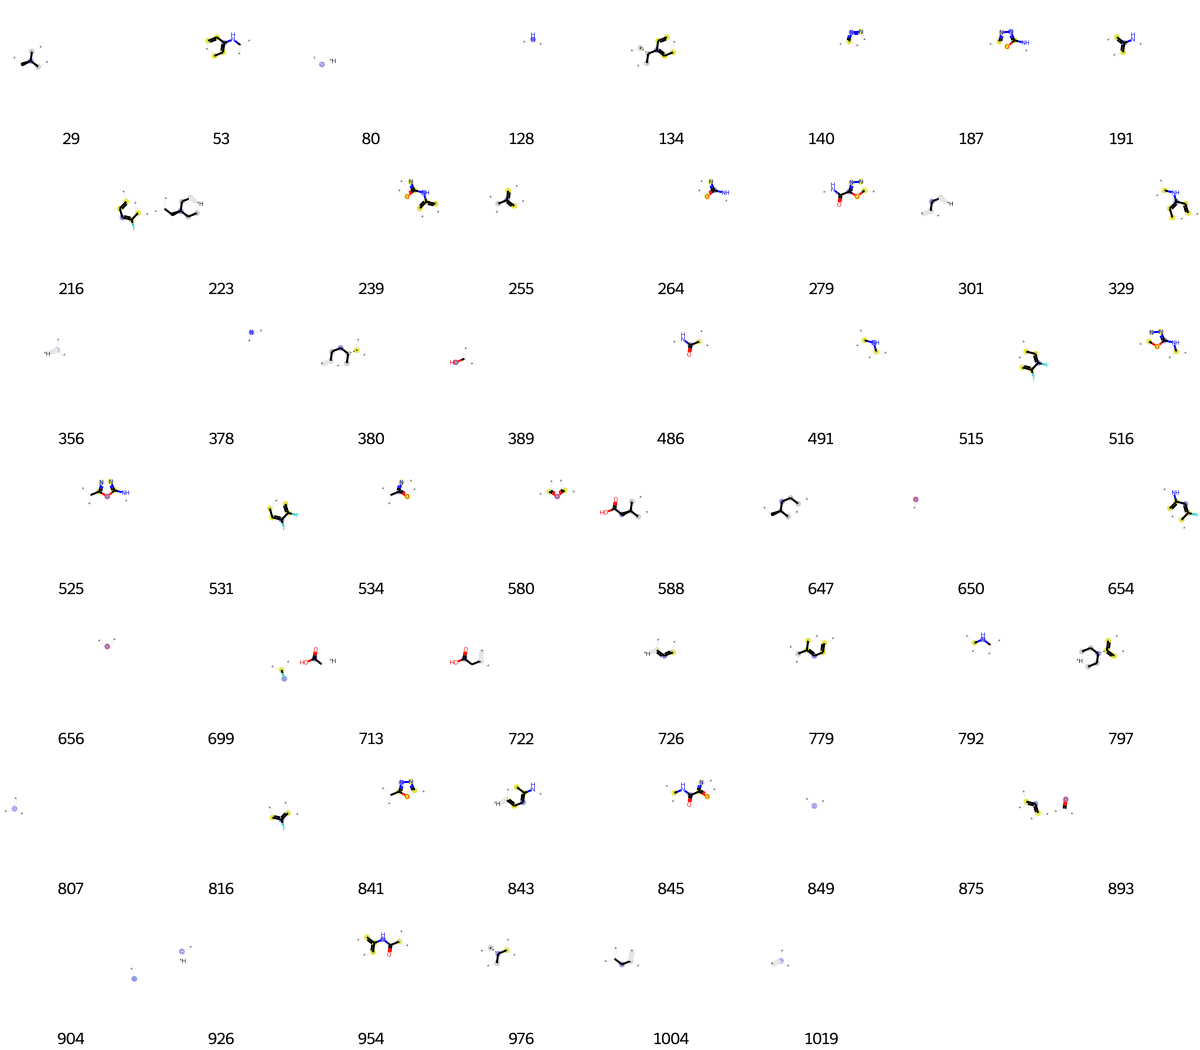

In [617]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [618]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[33,
 47,
 56,
 80,
 81,
 114,
 128,
 139,
 191,
 255,
 259,
 262,
 342,
 345,
 350,
 356,
 361,
 378,
 392,
 402,
 406,
 419,
 428,
 429,
 452,
 458,
 460,
 486,
 491,
 500,
 511,
 544,
 557,
 558,
 562,
 587,
 613,
 624,
 641,
 650,
 673,
 678,
 692,
 702,
 708,
 726,
 786,
 807,
 809,
 831,
 842,
 843,
 849,
 856,
 873,
 881,
 893,
 904,
 930,
 933]

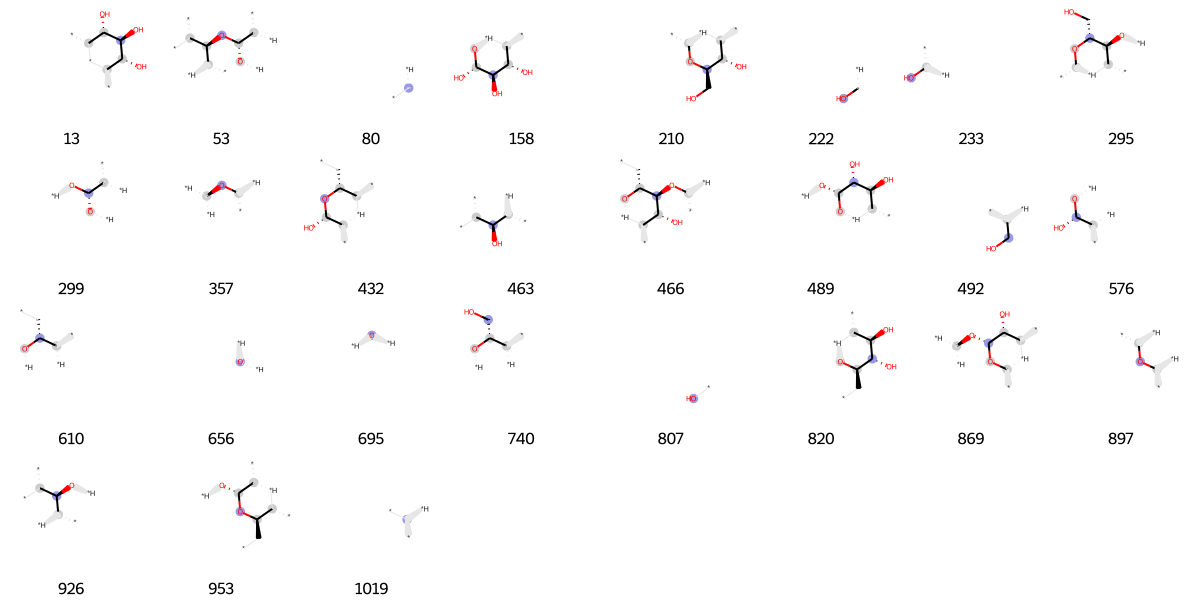

In [619]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [620]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[3,
 10,
 13,
 15,
 33,
 36,
 49,
 76,
 80,
 105,
 118,
 138,
 196,
 212,
 249,
 250,
 289,
 294,
 301,
 322,
 356,
 408,
 428,
 452,
 453,
 455,
 477,
 519,
 562,
 593,
 622,
 636,
 695,
 705,
 713,
 714,
 718,
 726,
 766,
 794,
 823,
 841,
 849,
 870,
 875,
 926,
 927,
 937,
 1019]

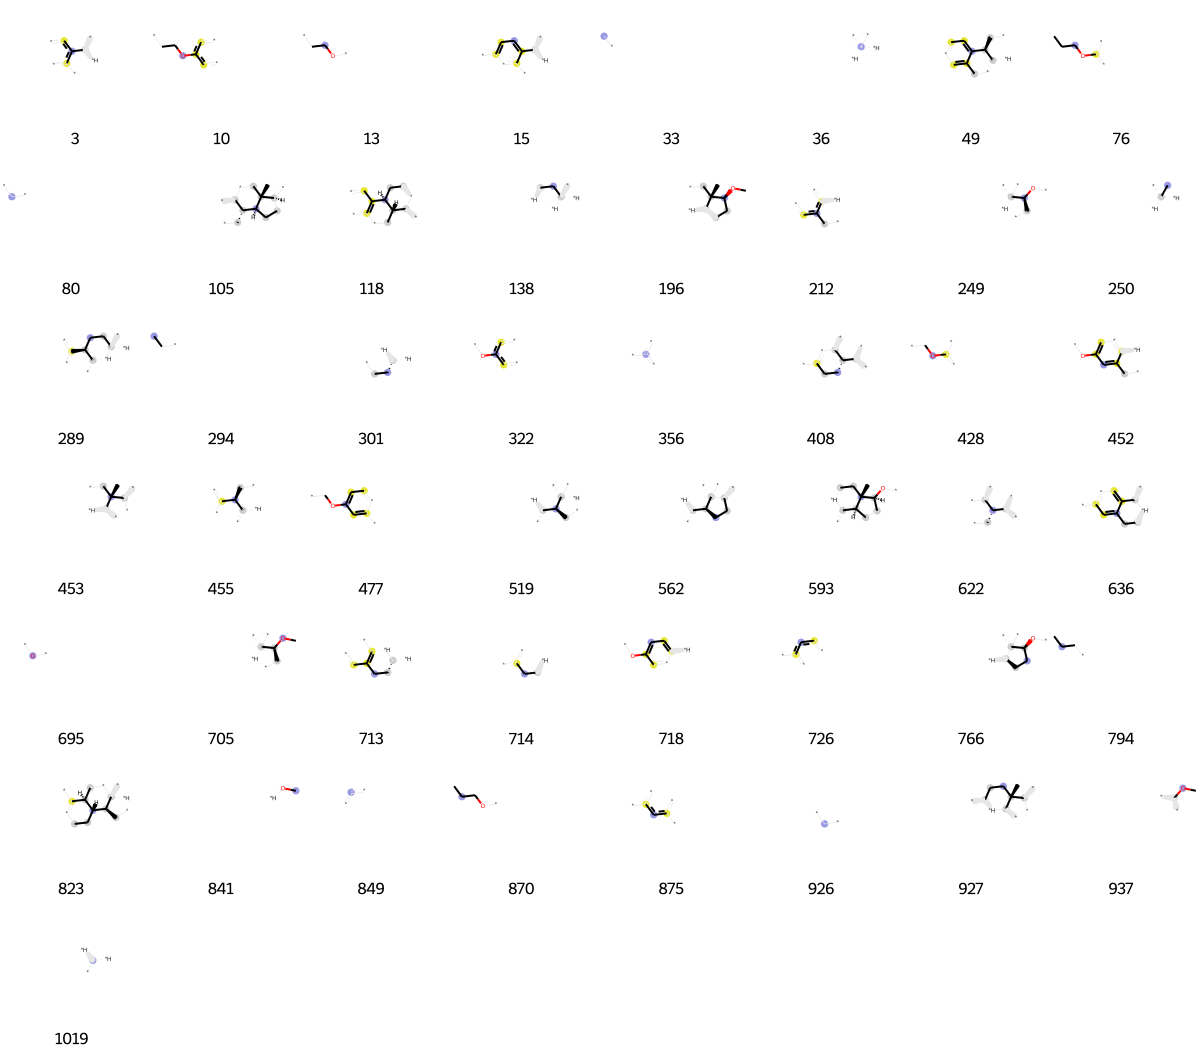

In [621]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [622]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[4,
 7,
 33,
 53,
 64,
 73,
 128,
 175,
 191,
 194,
 242,
 246,
 249,
 271,
 289,
 319,
 322,
 350,
 356,
 361,
 367,
 378,
 386,
 428,
 452,
 486,
 491,
 502,
 512,
 526,
 641,
 650,
 667,
 673,
 695,
 698,
 708,
 715,
 718,
 726,
 749,
 771,
 781,
 792,
 798,
 807,
 831,
 841,
 843,
 849,
 875,
 883,
 888,
 893,
 897,
 946,
 948,
 954]

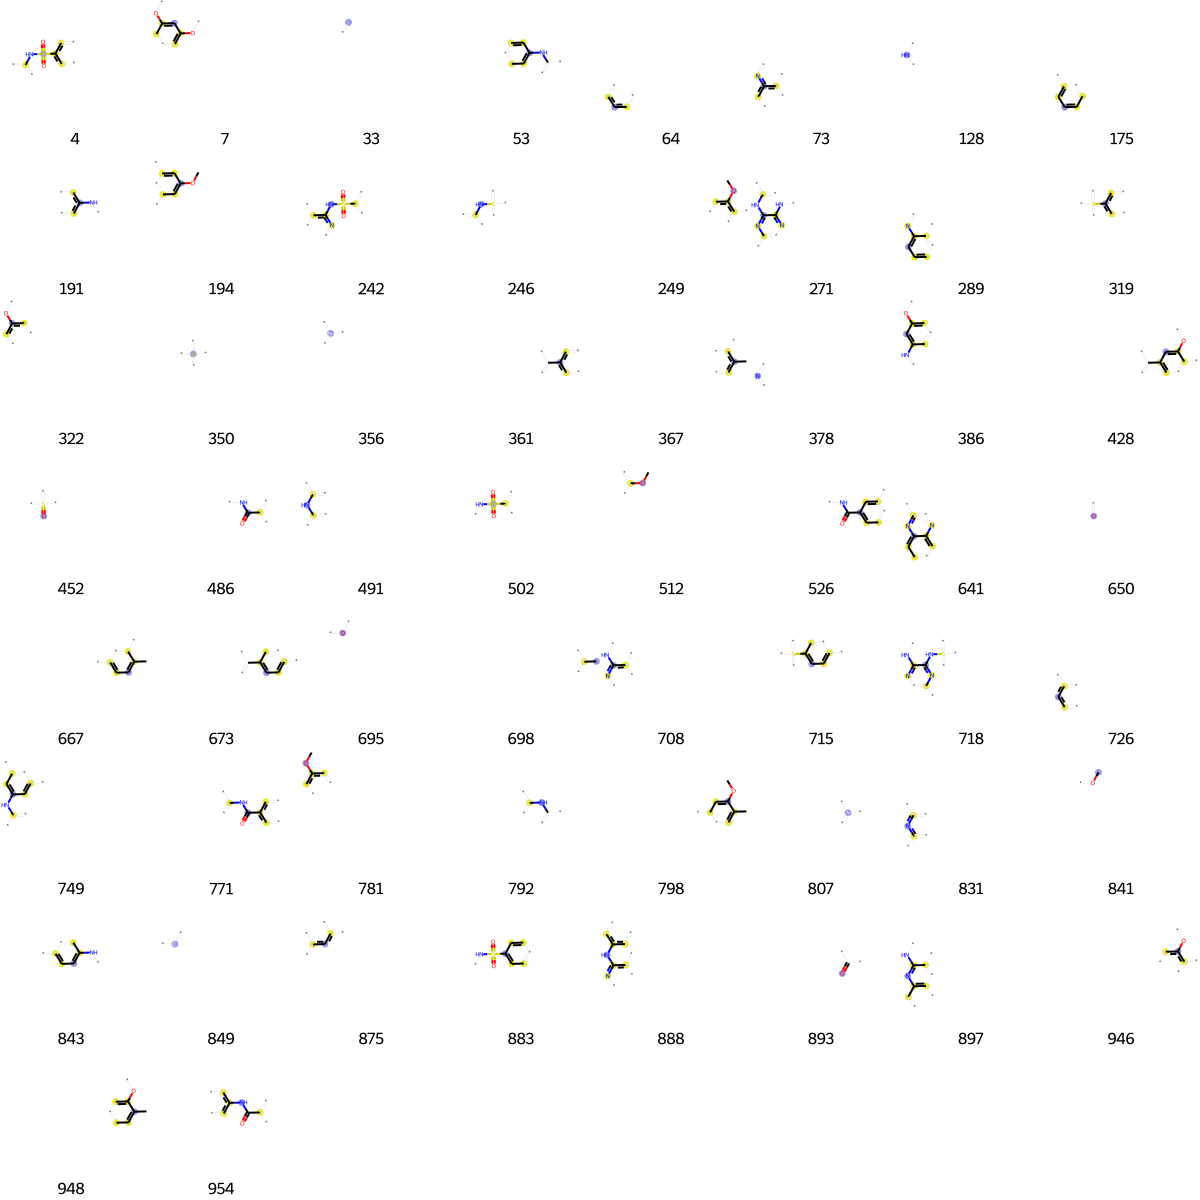

In [623]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [624]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[4,
 26,
 33,
 39,
 90,
 94,
 119,
 122,
 123,
 140,
 227,
 231,
 233,
 249,
 255,
 273,
 281,
 301,
 314,
 356,
 397,
 470,
 512,
 524,
 551,
 650,
 695,
 726,
 779,
 841,
 842,
 849,
 867,
 875,
 883,
 890,
 926,
 946,
 976,
 1019]

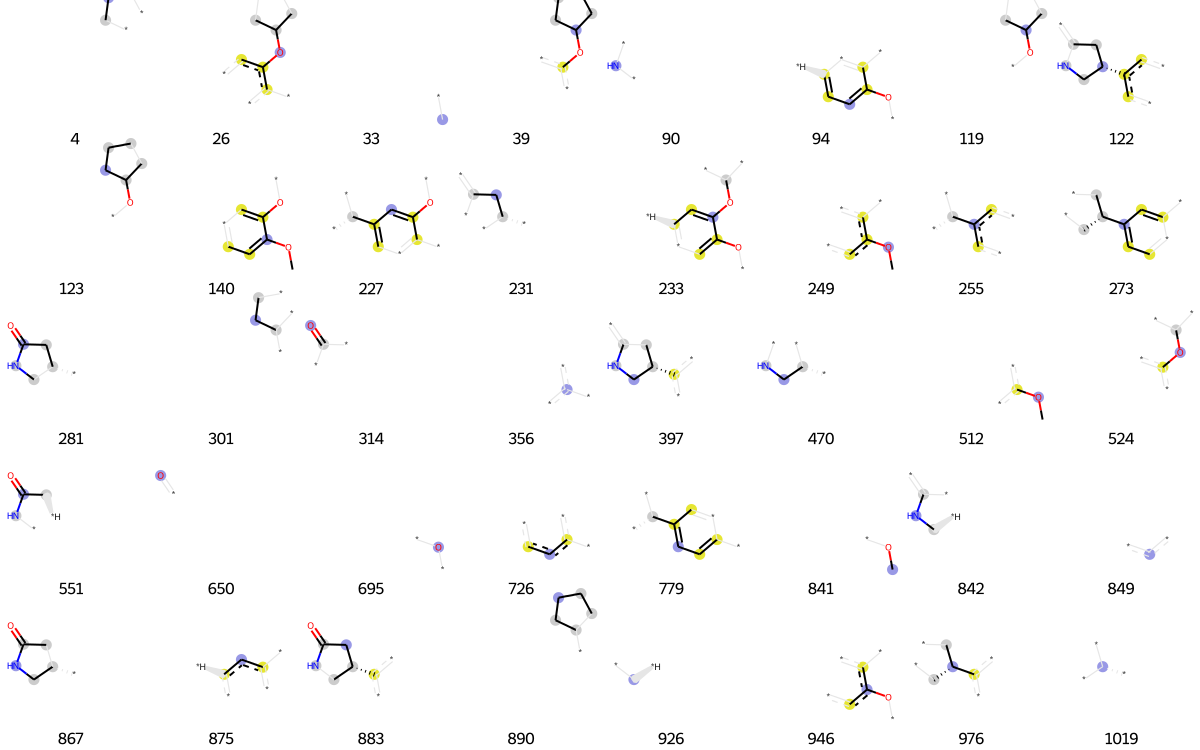

In [625]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [626]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[33,
 64,
 80,
 85,
 136,
 140,
 175,
 219,
 222,
 235,
 254,
 294,
 310,
 318,
 324,
 335,
 339,
 352,
 356,
 359,
 361,
 378,
 450,
 510,
 561,
 591,
 636,
 643,
 659,
 692,
 707,
 726,
 730,
 731,
 741,
 779,
 794,
 802,
 807,
 818,
 821,
 831,
 837,
 849,
 851,
 868,
 887,
 896,
 935,
 942,
 961,
 975,
 984]

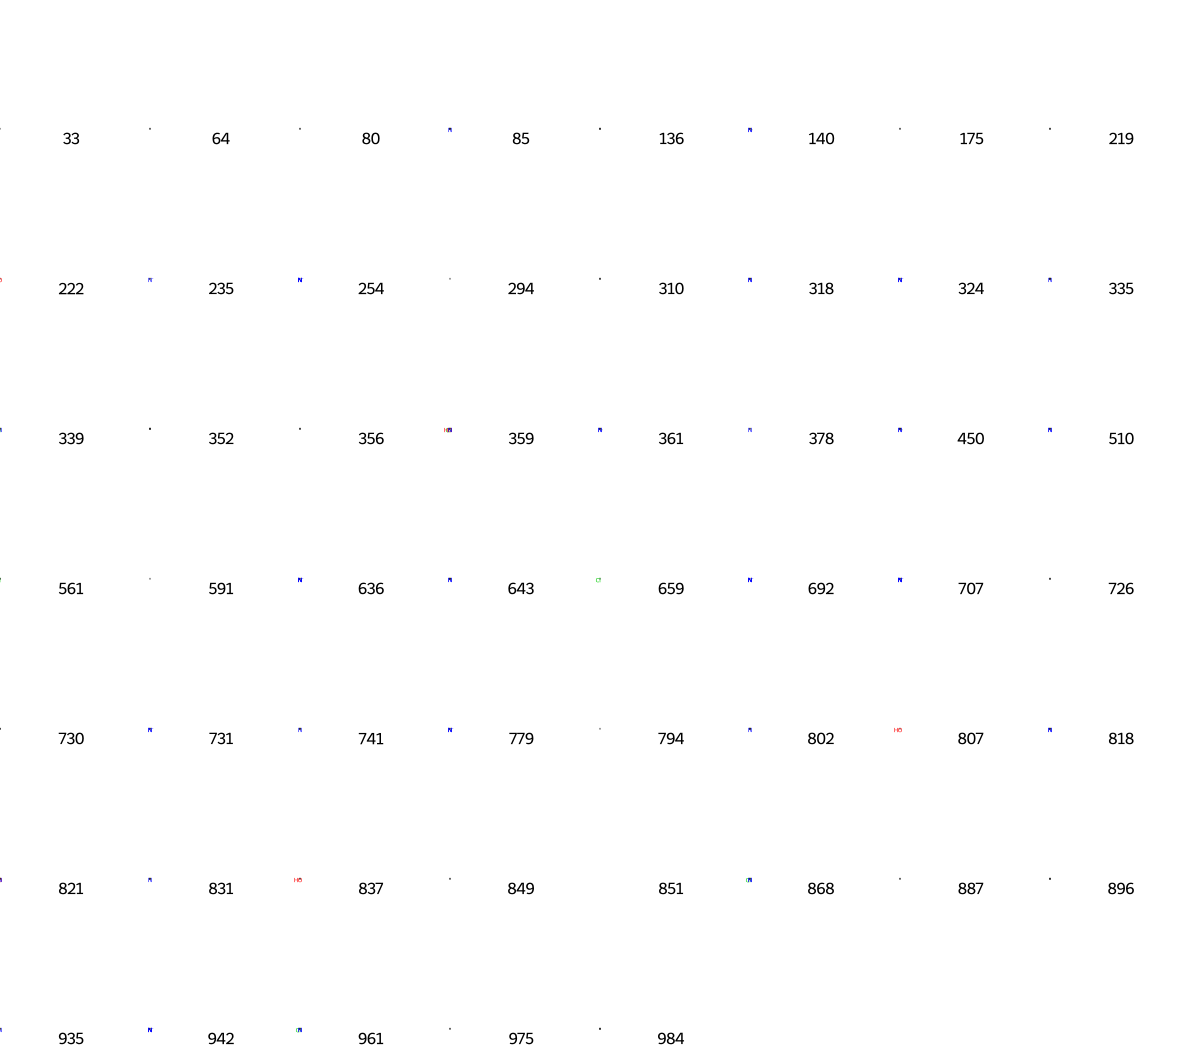

In [627]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [628]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[12,
 19,
 31,
 33,
 56,
 63,
 64,
 72,
 73,
 114,
 115,
 128,
 153,
 200,
 228,
 233,
 235,
 259,
 277,
 315,
 319,
 322,
 345,
 346,
 356,
 368,
 378,
 392,
 406,
 422,
 428,
 445,
 448,
 486,
 552,
 573,
 593,
 613,
 619,
 650,
 682,
 693,
 695,
 699,
 718,
 726,
 755,
 775,
 787,
 792,
 801,
 807,
 816,
 828,
 831,
 832,
 842,
 849,
 855,
 862,
 875,
 891,
 893,
 904,
 930,
 932,
 935,
 961,
 965,
 998]

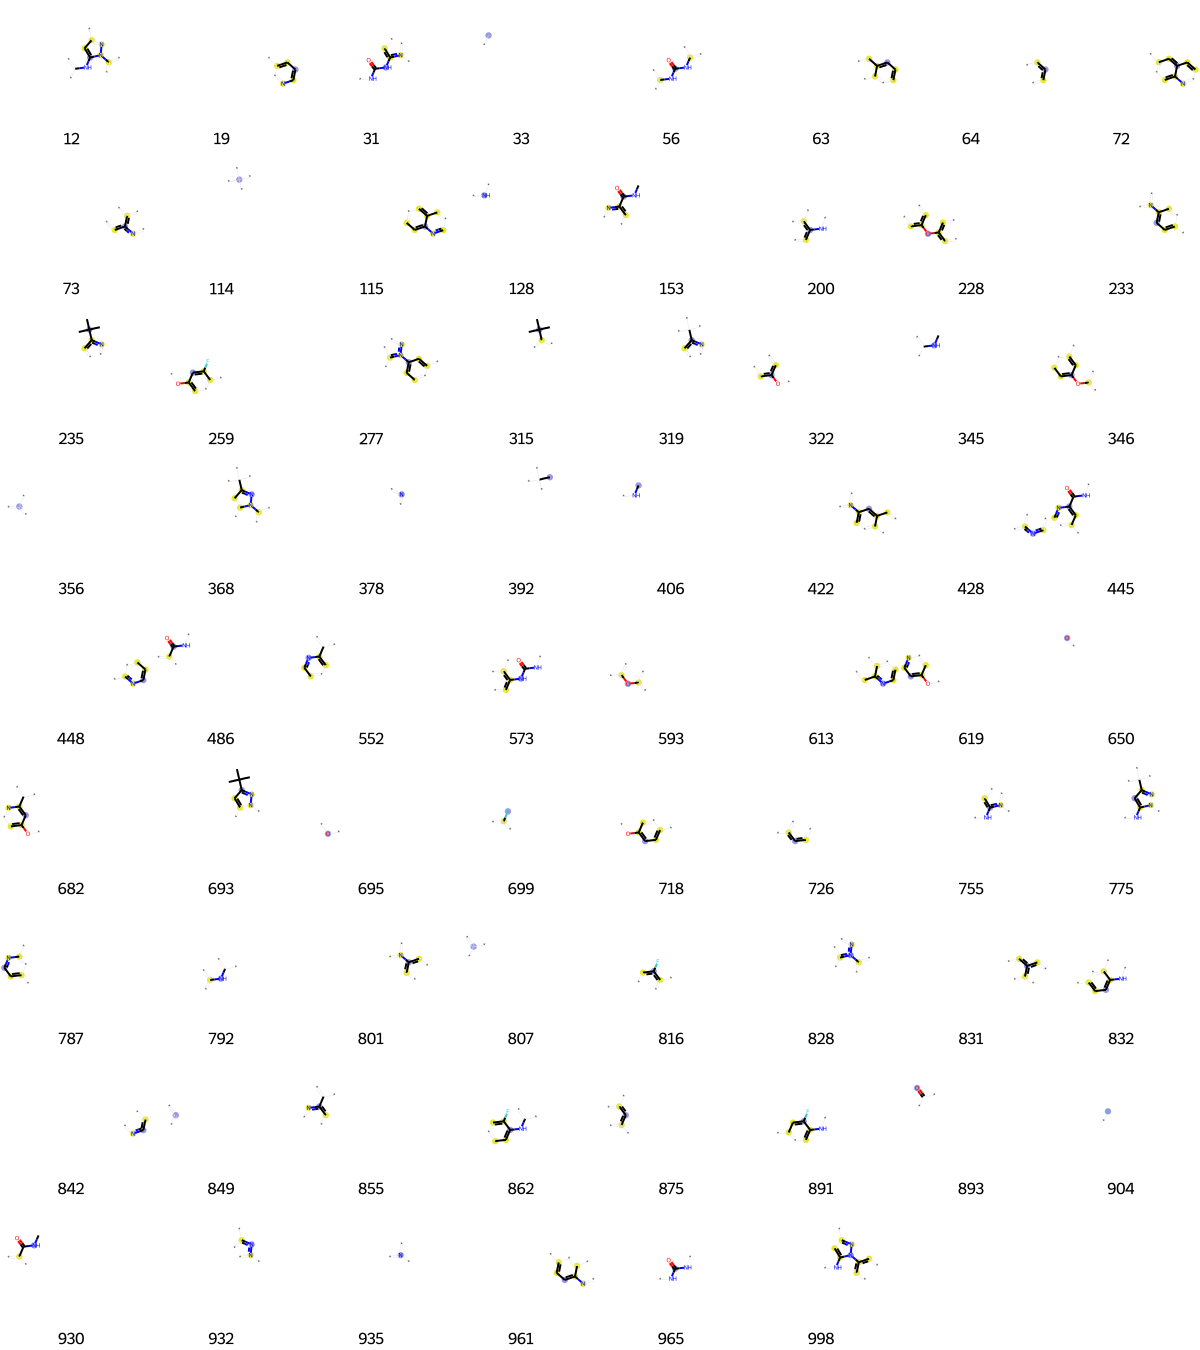

In [629]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [630]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[1,
 4,
 8,
 33,
 35,
 36,
 80,
 98,
 103,
 114,
 133,
 137,
 138,
 206,
 231,
 233,
 241,
 243,
 250,
 283,
 284,
 301,
 327,
 336,
 342,
 344,
 356,
 392,
 395,
 444,
 453,
 461,
 478,
 490,
 590,
 632,
 636,
 669,
 678,
 694,
 714,
 739,
 753,
 784,
 807,
 811,
 850,
 855,
 884,
 887,
 890,
 921,
 926,
 1011,
 1019]

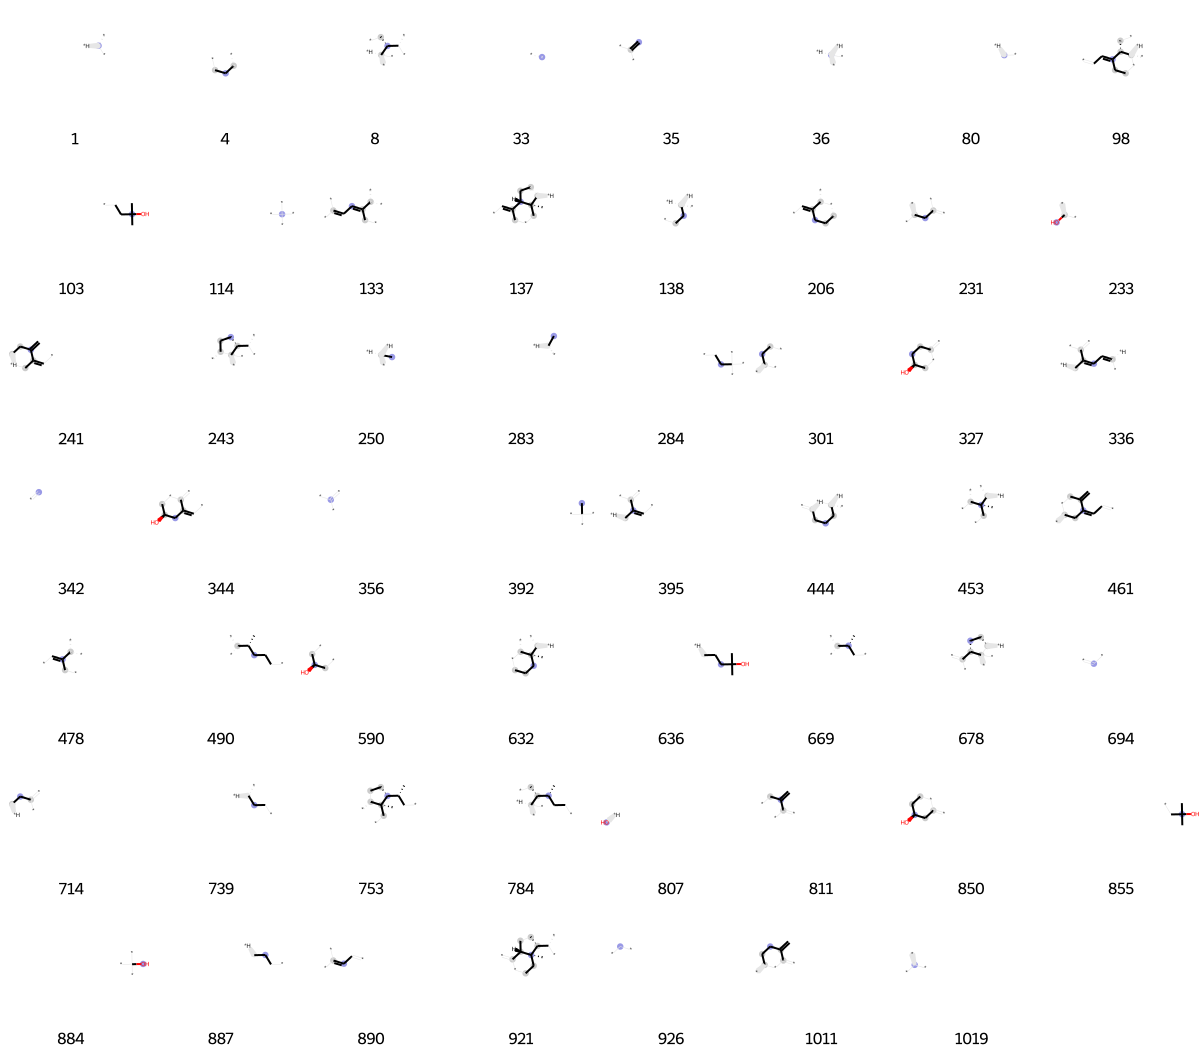

In [631]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [632]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[11,
 64,
 74,
 80,
 175,
 271,
 277,
 281,
 288,
 310,
 325,
 356,
 397,
 441,
 456,
 461,
 490,
 561,
 568,
 623,
 650,
 656,
 675,
 726,
 730,
 738,
 741,
 744,
 747,
 767,
 776,
 784,
 807,
 839,
 849,
 875,
 881,
 893,
 917,
 926,
 935,
 949,
 1009,
 1016,
 1020]

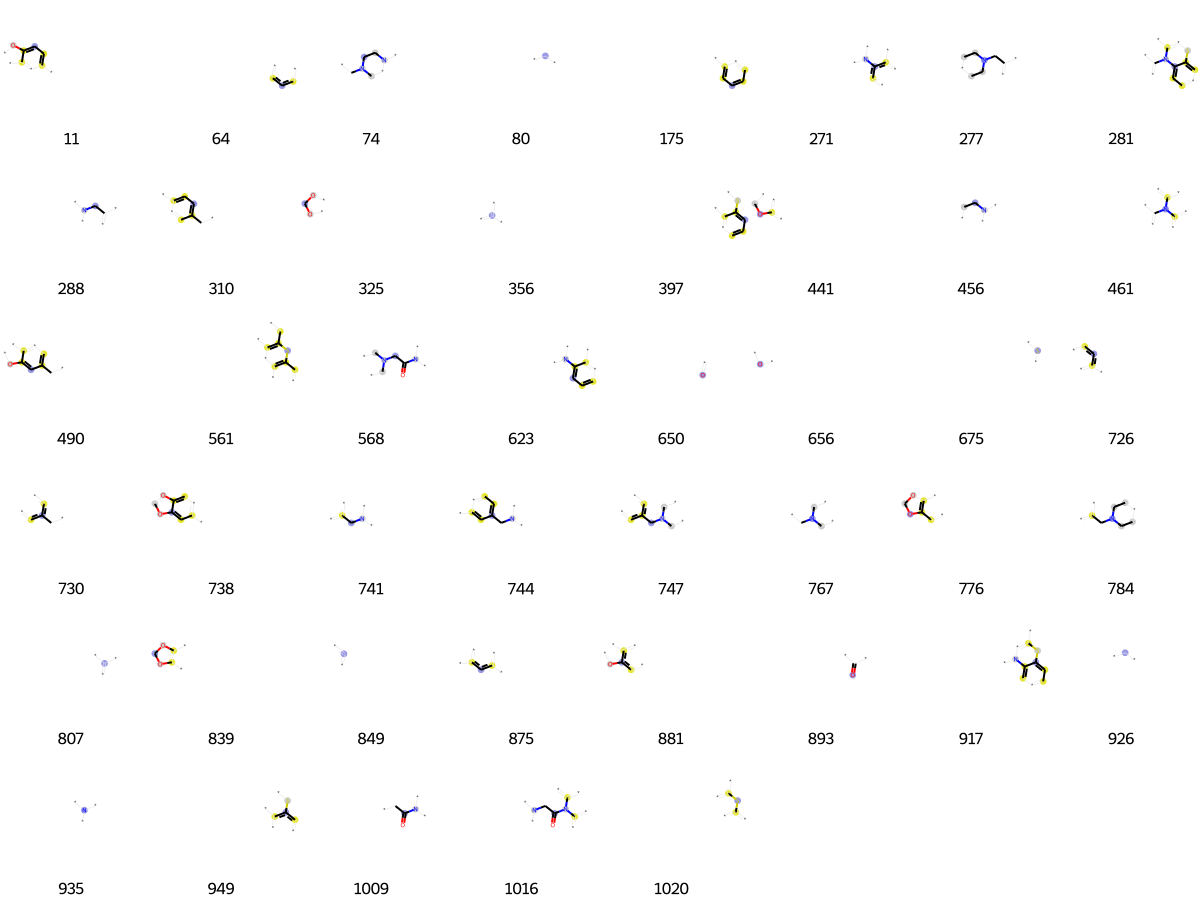

In [633]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [634]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[3,
 14,
 19,
 22,
 25,
 63,
 64,
 72,
 73,
 80,
 115,
 128,
 138,
 158,
 196,
 232,
 241,
 255,
 273,
 281,
 314,
 356,
 358,
 378,
 383,
 390,
 392,
 428,
 448,
 462,
 543,
 575,
 613,
 616,
 639,
 650,
 656,
 669,
 675,
 694,
 726,
 774,
 799,
 831,
 842,
 849,
 875,
 927,
 961,
 1009,
 1020]

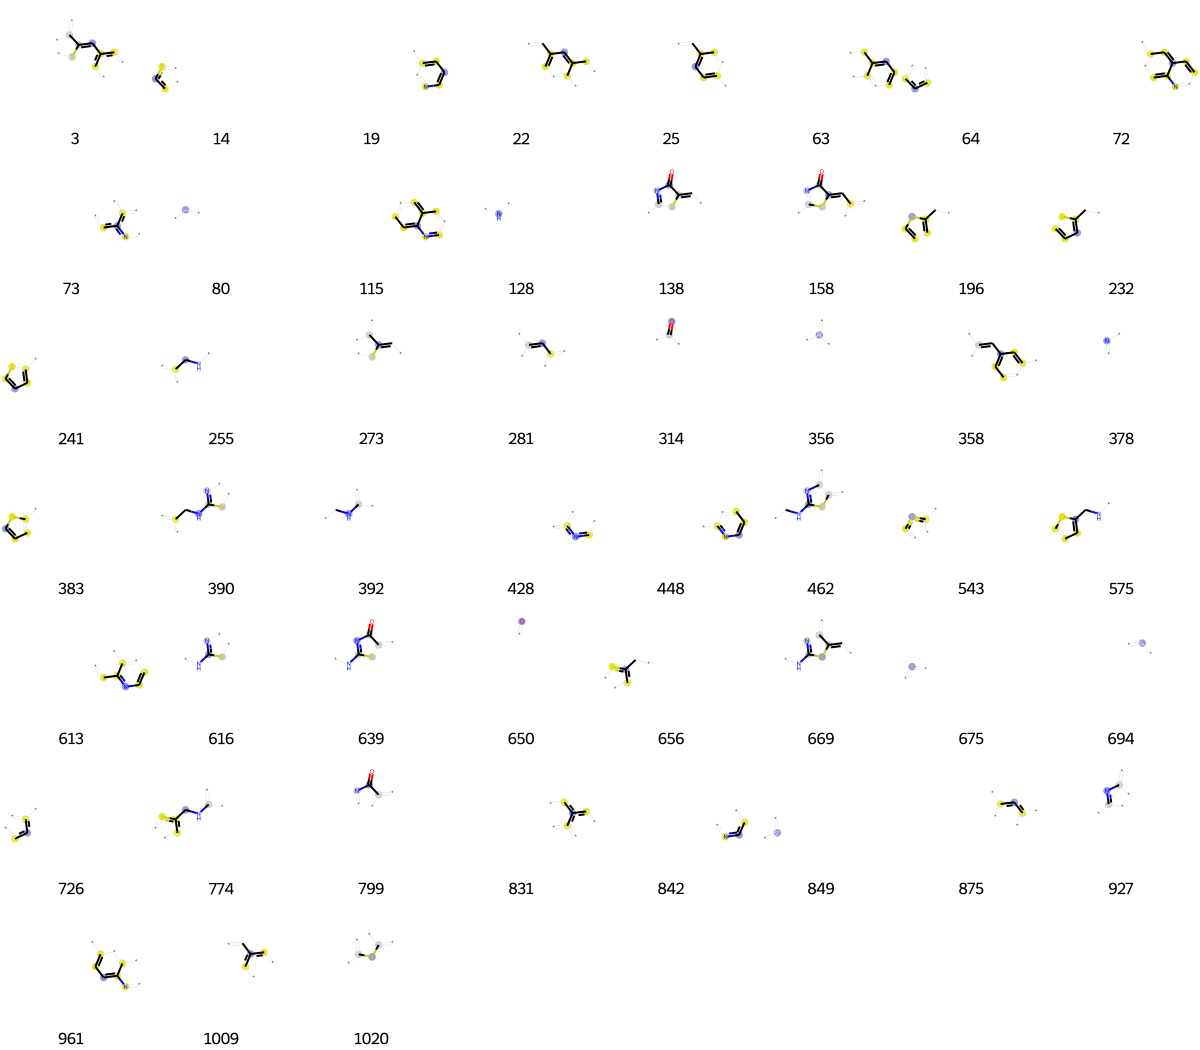

In [635]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [636]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[9,
 33,
 34,
 102,
 112,
 136,
 177,
 305,
 322,
 333,
 356,
 360,
 361,
 406,
 512,
 580,
 586,
 617,
 650,
 656,
 673,
 674,
 695,
 709,
 718,
 726,
 751,
 779,
 781,
 784,
 790,
 807,
 831,
 841,
 849,
 875,
 878,
 893,
 896,
 897,
 930,
 938,
 948,
 1004]

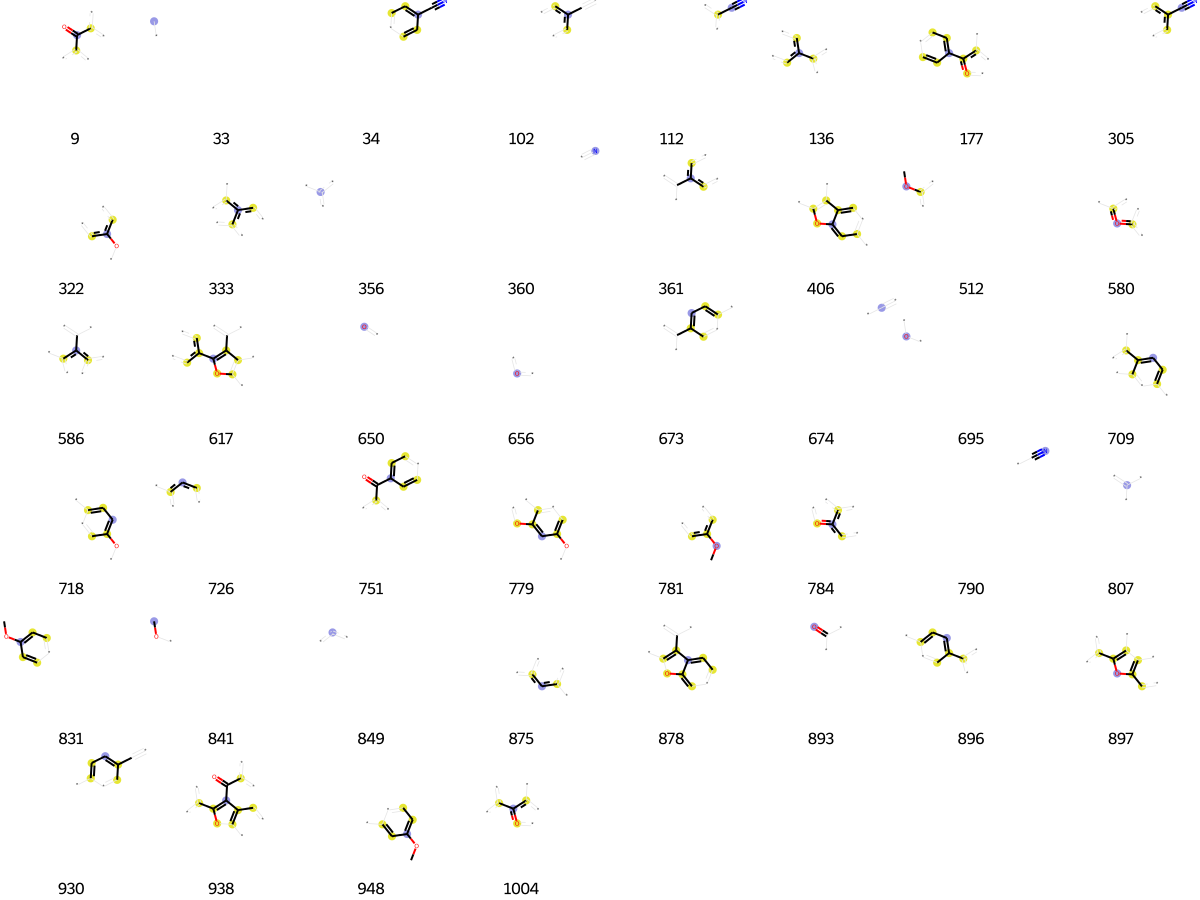

In [637]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [638]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[33,
 90,
 112,
 136,
 184,
 222,
 314,
 352,
 356,
 360,
 361,
 378,
 383,
 493,
 503,
 552,
 579,
 586,
 594,
 650,
 674,
 692,
 698,
 721,
 725,
 726,
 750,
 790,
 838,
 842,
 849,
 875,
 974]

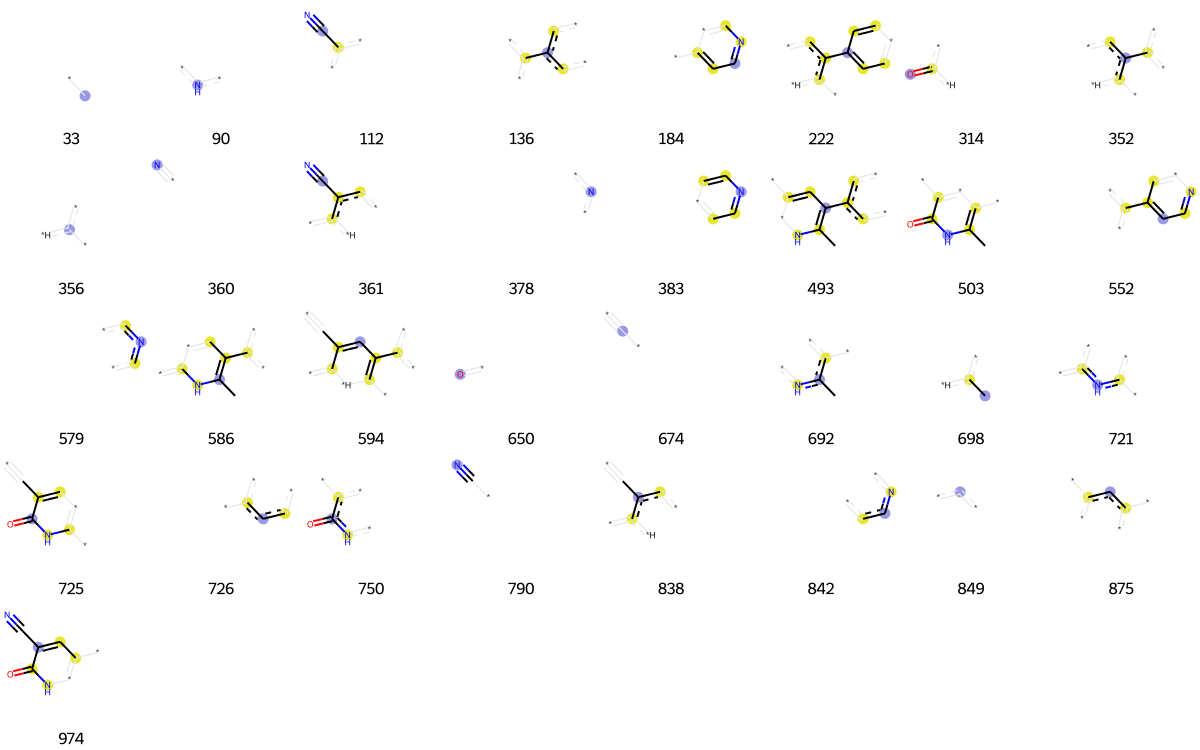

In [639]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [640]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[33,
 46,
 80,
 109,
 128,
 197,
 216,
 294,
 307,
 319,
 331,
 350,
 356,
 425,
 452,
 454,
 502,
 561,
 582,
 650,
 659,
 667,
 715,
 726,
 794,
 807,
 814,
 816,
 849,
 883,
 893,
 965]

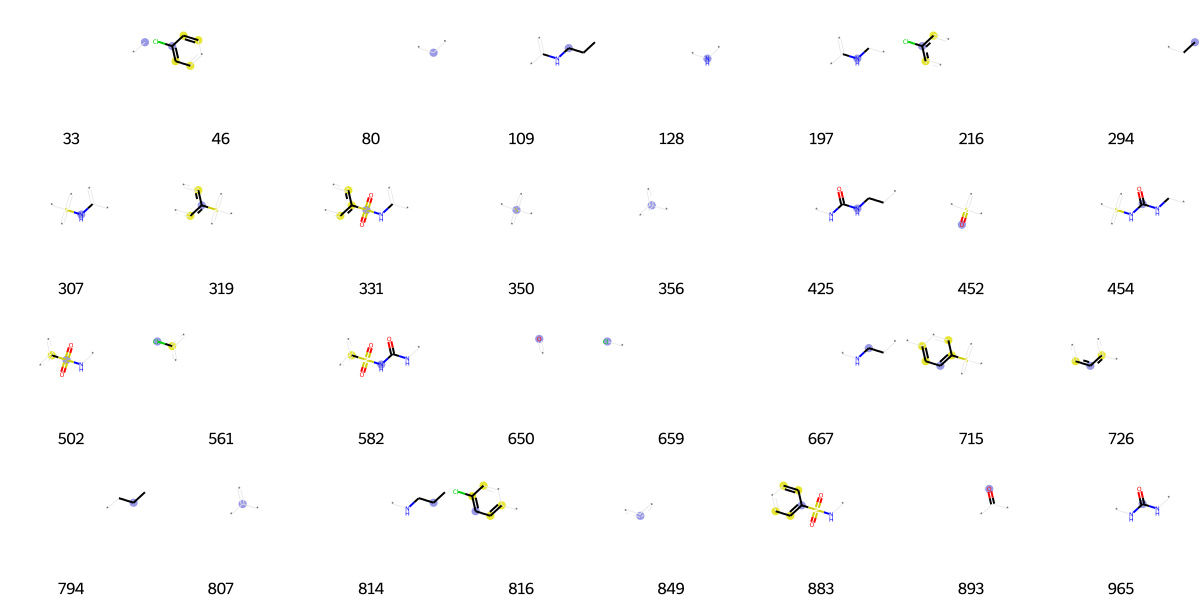

In [641]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])